In [1]:
import numpy as np # linear algebra
import os
import matplotlib
matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pandas import Series, DataFrame
from netCDF4 import Dataset
from math import log10
from scipy import interpolate
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import warnings
warnings.filterwarnings("ignore")

In [2]:
##### read various files and variables
## obs and reanalysis
forcing  = Dataset('../CSET_RF10_Tr6p0/Forcings_CSET_rf10_traj6p0_v1p2b_2021-01-14_MERRA2loglogMBL.nc')
ERA_data = Dataset('/home/disk/eos7/bloss/Runs/CSET/Data/RF10_Tr6p0/rf10_ERA_data_6.0.nc')
GOES_data= Dataset('/home/disk/eos7/bloss/Runs/CSET/Data/RF10_Tr6p0/GOES_rf10_rf11-6.0-2deg.nc')
goes_data= Dataset('/home/disk/eos3/erfani/Data/CSET/From_Hans_Choiko/GOES/rf10_rf11-6.0-4deg.nc')
RF_data  = Dataset('/home/disk/eos7/bloss/Runs/CSET/Data/RF10_Tr6p0/RF10_1325_1275_AvgProfile.nc')
RFin_data= Dataset('/home/disk/eos7/bloss/Runs/CSET/CheyenneOutput/SimulatingCSETArchive_v1/Data/L10_Tr6p0/rf10_traj_6.0_initprofile.nc')
RFrt_data= Dataset('/home/disk/eos7/bloss/Runs/CSET/CheyenneOutput/SimulatingCSETArchive_v1/Data/L10_Tr6p0/rf11_traj_6.0_returnprofile.nc')
MERRA_data =Dataset('/home/disk/eos3/erfani/Data/CSET/From_Hans_Choiko/All_but_GOES/rf10_72h_forward_6.0.nc')
MERRA_datab=Dataset('/home/disk/eos3/erfani/Data/CSET/From_Hans_Choiko/All_but_GOES/rf10_48h_backward_6.0.nc')
RFin_radar_df   = pd.read_csv('~/RF10_radar.csv')
RFrt_radar_df   = pd.read_csv('~/RF11_radar.csv')

## model runs
file = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D-ProgAer-RF10-Tr6p0/OUT_STAT/CSET_RF10_Tr6p0_256sqx432_100m_RF10_M2005PA_RRTM4PBL_UM5_ProgAer_250_60.nc')
file0 = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D-ProgAer-RF10-Tr6p0/OUT_STAT/CSET_RF10_Tr6p0_96x96x432_100m_M2005_RRTM4PBL_UM5_RF10_Tr6p0_va.nc')
file1 = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D-ProgAer-RF10-Tr6p0/OUT_STAT/CSET_RF10_Tr6p0_256sqx432_100m_RF10_M2005PA_RRTM4PBL_UM5_ProgAer_70_60.nc')
file2 = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D-ProgAer-RF10-Tr6p0/OUT_STAT/CSET_RF10_Tr6p0_96sqx432_100m_RF10_M2005PA_RRTM4PBL_UM5_ProgAer_70_60_NEW.nc')
file3 = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D-ProgAer-RF10-Tr6p0/OUT_STAT/CSET_RF10_Tr6p0_96x96x432_100m_M2005_RRTM4PBL_UM5_RF10_Tr6p0_vc_BL_70.nc')
file4 = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D-ProgAer-RF10-Tr6p0/OUT_STAT/CSET_RF10_Tr6p0_96x96x432_100m_M2005_RRTM4PBL_UM5_RF10_Tr6p0_vb_FTNA_200.nc')
file5 = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D3D3D-ProgAer-FTMERRA/OUT_STAT/CSET_RF10_Tr6p0_96sqx432_100m_RF10_Tr6p0_M2005PA_RRTM4PBL_UM5_ProgAer_MERRA2loglogMBL.nc')
file6 = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D3D3D-ProgAer-FTMERRA/OUT_STAT/CSET_RF10_Tr6p0_96sqx432_100m_Tr6p0_M2005PA_RRTM4PBL_UM5_MERRAlogBL_3t.nc')


myblue1 = (0.31560580108711567, 0.005345691264152297, 0.6167893813265289)
myblue2 = (0, 0.5, 1)
ls = ['-', '-', '-', '-', '-', '-', '-', '-']
fn = [file, file0, file1, file2, file3, file4, file5, file6]
NN = len(fn)
lb = [ '250-60-LD' , '250-60', '70-60-LD'   , '70-60'    , '110-60'     , '250-200', 'MERRA'     , 'MERRAX3' ]
cc = ['crimson'    , 'tomato', 'forestgreen', 'limegreen', 'deepskyblue', 'hotpink', 'darkviolet', 'darkgoldenrod']
lw = ['3', '2', '2', '2', '2', '2', '2', '2']
cases = [0, 1, 2, 3, 6, 7]

casename = 'CSET-RF10-Tr6.0-3D-Lx10-multi'
init_time = '2015-07-27 00Z' 
Obs_jump= 17
period   = ''
ylim = 4000
#xlim = 3.6

## SAM, ERA5, & aircraft days for plotting profiles:
pdo  = [.74, 1.74, 2.74, 3.71]
pde = [.75, 1.75, 2.75, 3.71]
pda = [.74, 2.74]
###
idx_calday = 1

## variables in the forcing file:
day   = forcing.variables['day'][:] 
calday= forcing.variables['calday'][:] 
lat   =  forcing.variables['lat'][:]             # Surface Latent Heat Flux:
CTH   = forcing.variables['CTH'][:] * 1000       # MODIS cloud top height: converted to m
qinit = forcing.variables['qinit'][:] * 1000     # Water Vapor Mass Mixing Ratio from Idealized Aircraft Sounding: converted to g/kg
Tinit = forcing.variables['Tinit'][:]            # Absolute Temperature from Idealized Aircraft Sounding: K
qref  = forcing.variables['qref'][:] * 1000      # Water Vapor Mass Mixing Ratio from from ERA-5: converted to g/kg
Tref  = forcing.variables['Tref'][:]             # Absolute Temperature          from from ERA-5: K
z_forc=  forcing.variables['z'][:]               # Geopotential height from ERA-5:
shflx =  forcing.variables['shflx'][:]           # Surface Sensible Heat Flux:
lhflx =  forcing.variables['lhflx'][:]           # Surface Latent Heat Flux:
Na_accm_MERRA= forcing.variables['Na_accum'][:]  # Accumulation mode aerosol number mixing ratio from MERRA2 (Corrected based on regression w/in situ CSET data)

fday = calday - int(calday[idx_calday])
dummy, fday_mg = np.meshgrid(z_forc[0,:,0,0], fday) # making meshgrid

## GOES variables:
GOES_time0= GOES_data.variables['time'][:] #
GOES_time = (GOES_time0 + Obs_jump) / 24 # 15.667
GOES_lwp_org = GOES_data.variables['cloud_lwp'][:] # 
GOES_lat = GOES_data.variables['latitude'][:] 
GOES_CTH = GOES_data.variables['cloud_top_height_median'][:]         #  median CTH: converted to m 
# GOES WLCF might use an optical depth threshold that is close to 0.3
GOES_LCC = GOES_data.variables['warm_low_cloud_fraction'][:] * 100    
GOES_CC  = GOES_data.variables['cloud_fraction'][:] * 100  
GOES_Nd  = GOES_data.variables['Nd_mean'][:]                         # mean cloud droplet number concentration: 1/cm3
goes_albd= goes_data.variables['broadband_shortwave_albedo'][:] / 100
goes_OLR = goes_data.variables['broadband_longwave_flux'][:] 
goes_LCC = goes_data.variables['warm_low_cloud_flag'][:] * 100  
goes_lwp = goes_data.variables['cloud_lwp_iwp'][:]                   # Liquid Water Path: g/m2
goes_Nd  = goes_data.variables['Nd'][:]                              # cloud droplet number concentration: 1/cm3
goes_re  = goes_data.variables['cloud_particle_size_median'][:]      # median effective particle radius: microns
goes_cod = goes_data.variables['cloud_visible_optical_depth_median'][:] # median cloud optical depth
goes_CTH = goes_data.variables['cloud_top_height'][:]                   #  median CTH: converted to m 

goes_CTH_25 = goes_data.variables['cloud_top_height_25th_percentile'][:] #  median CTH: converted to m 
goes_CTH_75 = goes_data.variables['cloud_top_height_75th_percentile'][:] #  median CTH: converted to m 
goes_lwp_med= goes_data.variables['cloud_lwp_iwp_median'][:]             # median Liquid or Ice Water Path": g/m2
goes_lwp_mean= goes_data.variables['cloud_lwp_iwp_mean'][:]              # mean Liquid or Ice Water Path": g/m2
goes_lwp_25 = goes_data.variables['cloud_lwp_iwp_25th_percentile'][:]    # Liquid Water Path: g/m2
goes_lwp_75 = goes_data.variables['cloud_lwp_iwp_75th_percentile'][:]    # Liquid Water Path: g/m2
goes_Nd_25  = goes_data.variables['Nd_25th_percentile'][:]          # 25th percentile cloud droplet number concentration: 1/cm3
goes_Nd_75  = goes_data.variables['Nd_75th_percentile'][:]          # 75th percentile cloud droplet number concentration: 1/cm3
GOES_Nd_med = GOES_data.variables['Nd_median'][:]                   # median cloud droplet number concentration: 1/cm3

goes_cod_25 = goes_data.variables['cloud_visible_optical_depth_25th_percentile'][:] # 25th percentile cloud optical depth
goes_cod_75 = goes_data.variables['cloud_visible_optical_depth_75th_percentile'][:] # 75th percentile cloud optical depth
goes_re_25  = goes_data.variables['cloud_particle_size_25th_percentile'][:]      # 25th percentile effective particle radius: microns
goes_re_75  = goes_data.variables['cloud_particle_size_75th_percentile'][:]      # 25th percentile effective particle radius: microns

goes_re_all  = goes_data.variables['cloud_particle_size'][:]      # effective particle radius: microns
goes_re_mean = goes_data.variables['cloud_particle_size_mean'][:]      # mean effective particle radius: microns
goes_cod_all = goes_data.variables['cloud_visible_optical_depth'][:] # cloud optical depth
goes_cod_mean= goes_data.variables['cloud_visible_optical_depth_mean'][:] # mean cloud optical depth

#### prepare GOES variables:

GOES_LCC[GOES_CTH > 4.5] = np.nan # exclude regions with high cloud
goes_LCC[goes_CTH > 4.5] = np.nan
goes_OLR[goes_CTH > 4.5] = np.nan
goes_lwp[goes_CTH > 4.5] = np.nan

GOES_lwp = np.nanmean(np.nanmean(goes_lwp,2),1) 
GOES_lwp_std = np.nanstd(np.nanstd(goes_lwp,2),1) 

goes_albd[goes_CTH > 4.5] = np.nan
goes_albd[goes_albd < 0] = np.nan # remove samples with missing data or spurious albedos
goes_albd[goes_albd > 1] = np.nan

goes_Nd[goes_CTH > 4.5] = np.nan
goes_Nd[goes_Nd < 0] = np.nan
goes_Nd[np.isnan(goes_LCC) == 1] = np.nan 
goes_Nd[goes_LCC <= 0] = np.nan

def clean_GOES_Nd(GOES_Nd):
    GOES_Nd[GOES_CTH > 4.5] = np.nan
    GOES_Nd[GOES_Nd < 0] = np.nan
    GOES_Nd[np.isnan(GOES_LCC) == 1] = np.nan 
    GOES_Nd[GOES_LCC <= 0] = np.nan
    return GOES_Nd
GOES_Nd    = clean_GOES_Nd(GOES_Nd)
GOES_Nd_med= clean_GOES_Nd(GOES_Nd_med)
goes_Nd_25 = clean_GOES_Nd(goes_Nd_25)
goes_Nd_75 = clean_GOES_Nd(goes_Nd_75)

goes_lwp_mean[GOES_CTH > 4.5] = np.nan
goes_lwp_med[GOES_CTH > 4.5] = np.nan
goes_lwp_25[GOES_CTH > 4.5] = np.nan
goes_lwp_75[GOES_CTH > 4.5] = np.nan

# sets CTH values in non-warm_low_cloud regions to NaN to get a distribution only of warm, low cloud heights:
def clean_GOES_CTH(GOES_CTH):
    GOES_CTH[np.isnan(GOES_LCC) == 1] = np.nan 
    GOES_CTH[GOES_CTH <= 0] = np.nan
    return GOES_CTH
GOES_CTH    = clean_GOES_CTH(GOES_CTH)
goes_CTH_25 = clean_GOES_CTH(goes_CTH_25)
goes_CTH_75 = clean_GOES_CTH(goes_CTH_75)

goes_CTH[np.isnan(goes_LCC) == 1] = np.nan 
goes_CTH[goes_LCC <= 0] = np.nan
goes_CTH_median = np.nanmedian(np.nanmedian(goes_CTH,2),1)

goes_LCC_25 = np.nanpercentile(np.nanpercentile(goes_LCC, 25, axis=2), 25, axis=1)
goes_LCC_75 = np.nanpercentile(np.nanpercentile(goes_LCC, 75, axis=2), 75, axis=1)
goes_albd_25= np.nanpercentile(np.nanpercentile(goes_albd, 25, axis=2), 25, axis=1)
goes_albd_75= np.nanpercentile(np.nanpercentile(goes_albd, 75, axis=2), 75, axis=1)
goes_OLR_25 = np.nanpercentile(np.nanpercentile(goes_OLR, 25, axis=2), 25, axis=1)
goes_OLR_75 = np.nanpercentile(np.nanpercentile(goes_OLR, 75, axis=2), 75, axis=1)
goes_lwp_25_test = np.nanpercentile(np.nanpercentile(GOES_lwp_org, 25, axis=2), 25, axis=1)
goes_lwp_75_test = np.nanpercentile(np.nanpercentile(GOES_lwp_org, 75, axis=2), 75, axis=1)

goes_LCC_std  = np.nanstd(np.nanstd(goes_LCC, 2), 1)
goes_LCC_mean = np.nanmean(np.nanmean(goes_LCC, 2), 1)
goes_LCC_med  = np.nanmedian(np.nanmedian(goes_LCC, 2), 1)

## aircraft variables:
RF_Z    = RF_data.variables['Z'][:]           # unit: m
RF_T    = RF_data.variables['T'][:] + 273.15  # converted to K
RF_RH   = RF_data.variables['RH'][:]          # %
RF_W    = RF_data.variables['W'][:]           # gram/kg
RF_ND   = RF_data.variables['ND'][:]          # #/cm^3
RF_CN   = RF_data.variables['CN'][:]          # #/cm^3
RF_UHSAS= RF_data.variables['UHSAS'][:]       # #/cm^3

In [3]:
###############################################################
## Define required functions for calculations of variables:

### Calculate inversion height (min of dtheta/dz * dRH/dz)

## find delta after calculating mid-point values
def delta(THETA):
    nz = THETA.shape[1]
    THETAi = np.arange(THETA.shape[0] * (nz+1)).reshape(THETA.shape[0], nz+1).astype(float)
    THETAi[:] = np.nan
    THETAi[:,0] = 0
    THETAi[:,1:nz] = 0.5 * (THETA[:,:nz-1] + THETA[:,1:nz])
    THETAi[:,nz] = 1.5 * THETA[:,nz-1] - 0.5 * THETA[:,nz-2]
    d_THETA = THETAi[:,1:] - THETAi[:,:-1]
    return d_THETA

def inv_h(THETA, RH, dzz, zz):        
#    d_THETA = delta(THETA)
#    d_RH = delta(RH)
    d_THETA = THETA[:,1:] - THETA[:,:-1]
    d_RH = RH[:,1:] - RH[:,:-1]

    ZINV = d_THETA[:,0].copy()
    ZINV[:] = np.nan
    for i in range(d_THETA.shape[0]):
        z  = zz[i,:]  if len(zz.shape) > 1 else zz
        dz = dzz[i,:] if len(zz.shape) > 1 else dzz
        dTHETA_dz = d_THETA[i,:] / dz[1:]
        dRH_dz = d_RH[i,:] / dz[1:]
        dTHETA_dz[dTHETA_dz < 0] = 0
        dRH_dz[dRH_dz > 0] = 0    
        func = dTHETA_dz * dRH_dz
        if len(zz.shape) > 1:
            indx = np.max(np.where(func == np.nanmin(func))[0])
        else:
            indx = np.min(np.where(func == np.nanmin(func))[0])                    
        # approximate func as a parabola around the minimum and find the height where that parabola is minimized. 
        # This will allow the inversion height to vary continuously as the input profiles change.
        # inversion_test is defined at midpoints of grid
        zavg = 0.5 * (z[:-1] + z[1:])
        rnge = range(indx-1, indx+2)
        # we define the parabola, converting from m to km.
        pp = np.polyfit(1e-3 * zavg[rnge], func[rnge], 2)
        # take the derivative of the parabola in coeffient space.
        pp_prime = np.array([2 * pp[0], pp[1]]) # this is its derivative
        # find the zero-crossing of the derivative. This is the inversion height in meters
        z_inv = -1e3 * pp_prime[1] / pp_prime[0]         
        ZINV[i] = z_inv
    return ZINV

# calc. Accumulated Precip.
def calc_acc_R(R):
    acc_R = R.copy()
    acc_R[:] = np.nan
    for i in range(len(acc_R)):
        acc_R[i] = np.nansum(R[:i+1]) / (time[-1] * 24) 
    return acc_R

# Calc. LTS
def calc_LTS(THETA, P):
    indx = np.where((P <= 701) & (P >= 699))[0]
    
    theta_700 = np.nanmean(THETA[:,indx], 1)
    theta_sfc = THETA[:, 0]
    LTS = theta_700 - theta_sfc
    return LTS

def mbl_ave_N(NA, RHO, dz, inv_idx):
#    integ_NA_BL = np.arange(NAd[:,0].size)
    integ_NA_BL = NA[:,0].copy()    
    integ_NA_BL[:] = np.nan
    for i in range(NA[:,0].size):
        dz2 = dz.copy()
        mmm = np.where(np.isnan(NA[i,:]) == 1)[0]
        if len(mmm) > 0:
            dz2[mmm] = np.nan
        mmm2 = np.where(NA[i,:] <= 1)[0]
        if (len(mmm2) > 0 and len(mmm2) != len(NA)):
            dz2[mmm2] = np.nan            
        integ_NA_BL[i] = np.nansum(RHO[i,:inv_idx[i]] * dz2[:inv_idx[i]] * NA[i,:inv_idx[i]]) / np.nansum(RHO[i,:inv_idx[i]] * dz2[:inv_idx[i]])
    return integ_NA_BL

def mbl_ave_flight(RFin_alt, RFin_N, RFin_RHO, iii, ZINV):
    if iii >= len(ZINV):
        jjj = np.where(abs(RFin_alt - ZINV[-1]) == np.nanmin(abs(RFin_alt - ZINV[-1])))[0][0]
    else:
        jjj = np.where(abs(RFin_alt - ZINV[iii]) == np.nanmin(abs(RFin_alt - ZINV[iii])))[0][0]
    RFin_alt_diff = RFin_alt[:-1] - RFin_alt[1:]
    RFin_alt_diff2= RFin_alt_diff.copy()
    mmm = np.where(np.isnan(RFin_N[1:]) == 1)[0]
    RFin_alt_diff2[mmm] = np.nan
    mmm2 = np.where(RFin_N[1:] <= .5)[0]
    RFin_alt_diff2[mmm2] = np.nan
    RFin_N_mean = np.nansum(RFin_RHO[jjj:] * RFin_N[jjj:] * RFin_alt_diff2[jjj-1:]) / np.nansum(RFin_alt_diff2[jjj-1:] * RFin_RHO[jjj:])
    return RFin_N_mean

def mbl_ave_MERRA(MERRA_Na, ZINV):
    MERRA_Na_mean2 = MERRA_Na[:,0].copy()
    MERRA_Na_mean2[:] = np.nan
    for i in range(MERRA_Na_mean2.size):
        MERRA_Na_mean2[i] = mbl_ave_flight(MERRA_H[i,:], MERRA_Na[i,:], MERRA_RHO[i,:], iii_MERRA[i], ZINV)
    return MERRA_Na_mean2

## MERRA2 Forcing
#def calc_Forcing_RHO(MERRA_H, MERRA_RHO, z_forc, iii):
#    Forcing_RHO = z_forc.copy()
#    Forcing_RHO[:] = np.nan    
#    for i in range(z_forc.shape[0]):
#        f_RHO = interpolate.interp1d(MERRA_H[iii[i],:], MERRA_RHO[iii[i],:])
#        indx2 = np.where(z_forc[i,:] > MERRA_H[iii[i],:].max())[0]
#        if len(indx2) > 0:
#            indx = indx2[-1]
#            Forcing_RHO[i, indx+1:] = f_RHO(np.array(z_forc[i, indx+1:]))
#            Forcing_RHO[i, :indx+1] = Forcing_RHO[i, indx+1]
#        else:
#            Forcing_RHO[i, :] = f_RHO(np.array(z_forc[i,:]))
#    return Forcing_RHO

def calc_Forcing_RHO(z, RHO, MERRA_H, iii):
    Forcing_RHO = MERRA_H.copy()
    Forcing_RHO[:] = np.nan    
    for i in range(MERRA_H.shape[0]):
        f_RHO = interpolate.interp1d(z[::-1], RHO[iii[0],:][::-1])
        indx2 = np.where(MERRA_H[i,:] > z.max())[0]
        if len(indx2) > 0:
            indx = indx2[-1]
            Forcing_RHO[i, indx+1:] = f_RHO(np.array(MERRA_H[i, indx+1:]))
            Forcing_RHO[i, :indx+1] = Forcing_RHO[i, indx+1]
        else:
            Forcing_RHO[i, :] = f_RHO(np.array(MERRA_H[i,:]))
    return Forcing_RHO


def mbl_ave_Forcing(MERRA_Na, ZINV):
    MERRA_Na_mean2 = MERRA_Na[:,0].copy()
    MERRA_Na_mean2[:] = np.nan
    for i in range(MERRA_Na_mean2.size):
        MERRA_Na_mean2[i] = mbl_ave_flight(z_forc[i,:,0,0], MERRA_Na[i,:], Forcing_RHO[i,:], iii_Forcing[i], ZINV)
    return MERRA_Na_mean2

def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

In [4]:
def read_model_vars(file):
    ## model variables:
    TIME = file.variables['time'][:]
    #lat_mg, lon_mg = np.meshgrid(lat, lon) # making meshgrid
    # 1-D variables
    z       = file.variables['z'][:]
    SST     = file.variables['SST'][:] - 273.15     # sea surface temperature converted from kelvin to celcius unit
    SSTOBS  = file.variables['SSTOBS'][:] - 273.15 
    PREC    = file.variables['PREC'][:]             # Surface Precipitation"  "mm/day" 
    LHF     = file.variables['LHF'][:]
    LHFOBS  = file.variables['LHFOBS'][:]
    SHF     = file.variables['SHF'][:]
    SHFOBS  = file.variables['SHFOBS'][:]
    Ps      = file.variables['Ps'][:]
    LWNS    = file.variables['LWNS'][:]
    SWNS    = file.variables['SWNS'][:]
    RWP     = file.variables['RWP'][:]       # Rain Water Path: g/m2
    CWP     = file.variables['CWP'][:]       # Cloud Water Path
    LWP     = file.variables['LWP'][:]       # GCSS Liquid Water Path
    MODISLWP= file.variables['MODISLWP'][:]
    CLDLOW  = file.variables['CLDLOW'][:]
    # SAM's CLDLOW variable uses a threshold for cloud fraction that is based on LWP (20 g/m2, when CEM=.true., as in these runs) 
    # which may not be consistent with an optical-depth-based threshold, as would be used in a satellite product.
    CLDMID  = file.variables['CLDMID'][:]
    CLDHI   = file.variables['CLDHI'][:]
    MODISREL= file.variables['MODISREL'][:]   # MODIS Effective Radius (Liquid): mkm
    ISCCPLOW= file.variables['ISCCPLOW'][:] 
    # The ISCCP simulator approximates the cloud fraction that would be observed by a satellite using an optical depth threshold
    # of 0.3. The model domain includes only the lower troposphere, so that the relevant ISCCPTOT and ISCCPLOW should be identical.  
    ISCCPTOT= file.variables['ISCCPTOT'][:] # 
    ZINV_org= file.variables['ZINV'][:]       # inversion height (km)
    WMAX    = file.variables['WMAX'][:]       # max updraft vel. (m/s)
    LWNTOA  = file.variables['LWNTOA'][:]     # Net LW flux at TOA (w/m2)
    SWNTOA  = file.variables['SWNTOA'][:]     # Net SW flux at TOA (w/m2)
    SOLIN   = file.variables['SOLIN'][:]      # Incoming SW flux at TOA (w/m2)
    ISCCPALB= file.variables['ISCCPALB'][:]   # ISCCP Cloud Albedo
    SWNTOAC = file.variables['SWNTOAC'][:]    # Net SW flux at TOA (Clear Sky)
    LWNTOAC = file.variables['LWNTOAC'][:]    # Net LW flux at TOA (Clear Sky)
    MODISTAU= file.variables['MODISTAU'][:]   # MODIS Cloud Optical Path
    ISCCPTAU= file.variables['ISCCPTAU'][:]   # ISCCP Optical Path
    TAUQCacc= file.variables['TAUQC'][:]      # Approx optical depth of cloud liquid water
    TAUQRacc= file.variables['TAUQR'][:]      # Approx optical depth of RAIN
    QCOEFFR = file.variables['QCOEFFR'][:]    # Mixing ratio of QC over effective radius, EFFR = QC/QCOEFFR: g/kg/micro

    time = TIME - int(TIME[0])
    SOLIN2 = SOLIN.copy()
    SOLIN2[SOLIN2 <= 100] = np.nan
    albedo = (SOLIN2 - SWNTOA) / SOLIN2
    albd_clear = (SOLIN2 - SWNTOAC) / SOLIN2
    SW_CRE = SWNTOA - SWNTOAC
    LW_CRE =-LWNTOA + LWNTOAC
    net_CRE = SW_CRE + LW_CRE

    #2-D variables:
    NAd    = file.variables['NAd'][:]      # dry aerosol number concentration (#/mg)
    NC     = file.variables['NCCLD'][:]    # cloud number concentration in cloud
    NCORIG = file.variables['NC'][:]       # cloud number concentration
    NR     = file.variables['NRCLD'][:]    # RAIN NUMBER CONCENTRATION in cloud
    NRORIG = file.variables['NR'][:]       # RAIN NUMBER CONCENTRATION
    RHO    = file.variables['RHO'][:]      # kg/m3
    CLD    = file.variables['CLD'][:]      # cloud Fraction
#    CLDCUMDN=file.variables['CLDCUMD1'][:] # Cumulative Shaded Cloud Fraction, Computed Downwards
    RWC    = file.variables['QPCLD'][:]    # rain water and snow content: g/kg
    CWC    = file.variables['QNCLD'][:]    # cloud water and cloud ice content in cloud: g/kg
    QCCLD  = file.variables['QCCLD'][:]    # Cloud liquid water mixing ratio in cloud
    QCOND  = file.variables['QCOND'][:]    # Total Condensate: g/kg
    WOBS   = file.variables['WOBS'][:]     # large scale W: m/s
    TABS   = file.variables['TABS'][:]     # Absolute temperature: K
    QT     = file.variables['QT'][:]       # Total water (no rain/snow included): g/kg
    QV     = file.variables['QV'][:]       # Water vapor: g/kg
    RH     = file.variables['RELH'][:]     # RH: %
    THETA  = file.variables['THETA'][:]    # THETA: K
    U      = file.variables['U'][:]        # x wind component: m/s
    V      = file.variables['V'][:]        # y wind component: m/s
    P      = file.variables['p'][:]        # pressure
    PRECIP = file.variables['PRECIP'][:]   # precipitation flux: mm/day
    W2     = file.variables['W2'][:]       # Variance of the z wind component: m2/s2
    THETAL = file.variables['THETAL'][:]    # Liquid water potential temperature: K

    QAd    = file.variables['QAd'][:] # DRY AEROSOL MASS: g/kg
    QAw    = file.variables['QAw'][:] # WET AEROSOL MASS
    QCORIG = file.variables['QC'][:] # Cloud liquid water mass mixing ratio: g/kg
    QRORIG = file.variables['QR'][:] # RAIN
    QAr    = file.variables['QAr'][:] # RAIN AEROSOL MASS
    QA     = QAd + QAw + QCORIG + QRORIG + QAr

    # Aerosol budget terms:
    # NAd:
    # NC:
    NCSTRG  = file.variables['NCSTRG'][:] # Storage of Cloud Water NUMBER CONCENTRATION: #/mg/day
    NCADV   = file.variables['NCADV'][:]  # Tendency of Cloud Water NUMBER CONCENTRATION due to resolved vertical advection: #/mg/day
    NCDIFF  = file.variables['NCDIFF'][:] # Tendency of Cloud Water NUMBER CONCENTRATION due to vertical SGS transport: #/mg/day
    NCLSADV = file.variables['NCLSADV'][:]# Tendency of Cloud Water NUMBER CONCENTRATION due to large-scale vertical advecti: #/mg/day
    NCSED   = file.variables['NCSED'][:]  # Tendency of Cloud Water NUMBER CONCENTRATION due to sedimentation: #/mg/day
    NCMPHY  = file.variables['NCMPHY'][:] # Tendency of CLOUD WATER NUMBER CONCENTRATION due to microphysical processes: #/mg/day
    NCFLXS  = file.variables['NCFLXS'][:] # Subgrid flux of CLOUD WATER NUMBER CONCENTRATION: #/mg/day
    # NAd:
    try:
        NAdSTRG = file.variables['NAcSTRG'][:] - NCSTRG  # Storage of DRY AEROSOL NUMBER CONCENTRATION: #/mg/day
        NAdADV  = file.variables['NAcADV'][:] - NCADV    # Tendency of DRY AEROSOL NUMBER CONCENTRATION due to resolved vertical advection: #/mg/day
        NAdDIFF = file.variables['NAcDIFF'][:] - NCDIFF  # Tendency of DRY AEROSOL NUMBER CONCENTRATION due to vertical SGS transport: #/mg/day
        NAdLSADV= file.variables['NAcLSADV'][:] - NCLSADV# Tendency of DRY AEROSOL NUMBER CONCENTRATION due to large-scale vertical advecti: #/mg/day
        NAdSED  = file.variables['NAcSED'][:] - NCSED    # Tendency of DRY AEROSOL NUMBER CONCENTRATION due to sedimentation: #/mg/day
        NAdMPHY = file.variables['NAcMPHY'][:] - NCMPHY  # Tendency of DRY AEROSOL NUMBER CONCENTRATION due to microphysical processes: #/mg/day
        NAdFLXS = file.variables['NAcFLXS'][:] - NCFLXS  # Subgrid flux of DRY AEROSOL NUMBER CONCENTRATION: #/m2/s
    except:
        NAdSTRG = file.variables['NAdSTRG'][:] # Storage of DRY AEROSOL NUMBER CONCENTRATION: #/mg/day
        NAdADV  = file.variables['NAdADV'][:] # Tendency of DRY AEROSOL NUMBER CONCENTRATION due to resolved vertical advection: #/mg/day
        NAdDIFF = file.variables['NAdDIFF'][:] # Tendency of DRY AEROSOL NUMBER CONCENTRATION due to vertical SGS transport: #/mg/day
        NAdLSADV= file.variables['NAdLSADV'][:] # Tendency of DRY AEROSOL NUMBER CONCENTRATION due to large-scale vertical advecti: #/mg/day
        NAdSED  = file.variables['NAdSED'][:] # Tendency of DRY AEROSOL NUMBER CONCENTRATION due to sedimentation: #/mg/day
        NAdMPHY = file.variables['NAdMPHY'][:] # Tendency of DRY AEROSOL NUMBER CONCENTRATION due to microphysical processes: #/mg/day
        NAdFLXS = file.variables['NAdFLXS'][:] # Subgrid flux of DRY AEROSOL NUMBER CONCENTRATION: #/m2/s
    SCVTNADC= file.variables['SCVTNADC'][:]          # Tendency of NAD due to interstitial scavenging by cloud: #/mg/day
    SCVTNADR= file.variables['SCVTNADR'][:]          # Tendency of NAD due to interstitial scavenging by rain: #/mg/day
    # NR:
    NRSTRG  = file.variables['NRSTRG'][:]    # Storage of Rain NUMBER CONCENTRATION: #/mg/day
    NRADV   = file.variables['NRADV'][:]     # Tendency of Rain NUMBER CONCENTRATION due to resolved vertical advection: #/mg/day
    NRDIFF  = file.variables['NRDIFF'][:]    # Tendency of Rain NUMBER CONCENTRATION due to vertical SGS transport: #/mg/day
    NRLSADV = file.variables['NRLSADV'][:]   # Tendency of Rain NUMBER CONCENTRATION due to large-scale vertical advecti: #/mg/day
    NRSED   = file.variables['NRSED'][:]     # Tendency of Rain NUMBER CONCENTRATION due to sedimentation: #/mg/day
    NRMPHY  = file.variables['NRMPHY'][:]    # Tendency of Rain NUMBER CONCENTRATION due to microphysical processes: #/mg/day
    NCSTEN  = file.variables['NCSTEN'][:]    # CHANGE IN CLOUD DROPLET NUMBER DUE TO SEDIMENTATION: #/mg/day
    NRSTEN  = file.variables['NRSTEN'][:]    # CHANGE IN RAIN NUMBER DUE TO SEDIMENTATION: #/mg/day
    NPRA_pos= file.variables['NPRA'][:]      # CHANGE IN RAIN NUMBER DUE TO ACCRETION OF CLOUD DROPLETS: #/mg/day
    NPRC    = file.variables['NPRC'][:]      # CHANGE NC AUTOCONVERSION DROPLETS: #/mg/day
    NPRC1   = file.variables['NPRC1'][:]     # CHANGE NR AUTOCONVERSION DROPLETS: #/mg/day
    NCPOSLIM= file.variables['NCPOSLIM'][:]  # CHANGE IN CLOUD DROPLET NUMBER DUE TO POSITIVE LIMITING: #/mg/day
    NCNEGLIM= file.variables['NCNEGLIM'][:]  # CHANGE IN CLOUD DROPLET NUMBER DUE TO NEGATIVE LIMITING: #/mg/day
    NRPOSLIM= file.variables['NRPOSLIM'][:]  # CHANGE IN RAIN DROPLET NUMBER DUE TO POSITIVE LIMITING: #/mg/day
    NRNEGLIM= file.variables['NRNEGLIM'][:]  # CHANGE IN RAIN DROPLET NUMBER DUE TO NEGATIVE LIMITING: #/mg/day

    LWC = RWC + CWC
    time_mg, z_mg = np.meshgrid(time, z) # making meshgrid

    cld = CLDLOW.copy()
    cld[:] = np.nan
    for i in range(len(CLDLOW)):
        cld[i] = np.max(CLDLOW[i] + CLDMID[i] + CLDHI[i])

    # calculate accumulated precipitation    
    acc_prec = PREC.copy()
    acc_prec[:] = np.nan
    for i in range(len(acc_prec)):
        acc_prec[i] = np.nansum(PREC[:i+1]) / (time[-1] * 24) 

    # calculate surface wind magnitude
    sfc_wnd = (U[:,0] ** 2 + V[:,0] ** 2) ** 0.5
        
    # SAM outputs only give the heights of cell centers.  
    # To compute a vertical integral, you need the cell interface heights (i.e., the w levels):
    nz = len(z)
    zi = np.arange(nz+1).astype(float)
    zi[:] = np.nan
    zi[0] = 0
    zi[1:nz] = 0.5 * (z[:nz-1] + z[1:nz])
    zi[nz] = 1.5 * z[nz-1] - 0.5 * z[nz-2] 
    dz = zi[1:] - zi[:-1] # Compute the cell thicknesses

    ## Calc. inversion height
    #ZINV = inv_h(THETAL, RH, dz, z)
    dz3  = z.copy()
    dz3[:] = np.nan
    dz3[1:] = z[1:] - z[:-1]
    ZINV = inv_h(THETAL, RH, dz3, z)
    d_THETA = THETA[:,1:] - THETA[:,:-1]

    #################################
    ### calculate modeled CTH
    # correct method
#    SAM_CTH = CWP.copy()
#    SAM_CTH[:] = np.nan
#    for i in range(len(CWP)):
#        if np.nanmax(CLDCUMDN[i,:]) > 0:
#            tmp = CLDCUMDN[i,:] / np.nanmax(CLDCUMDN[i,:]) # normalize cumulative cloud fraction by its maxmimum value
#            idx = np.nanmax(np.where(tmp > 0.5)[0]) # median CTH: height where normalized cumulative cloud fraction crosses 0.5
#            SAM_CTH[i] = z[idx]

    #Calculate the index of BL:
    #method1: find index where z is equal to ZINV
    inv_idx = np.arange(len(ZINV))
    inv_idx[:] = int(0)
    for i in range(len(ZINV)):
        diff = abs(z - ZINV[i])
        inv_idx[i] = np.where(diff == np.min(diff))[0][0]  
    #method2: find infrc where RH goes below 75%
    inv_idx2 = np.arange(len(ZINV))
    inv_idx2[:] = int(0)
    for i in range(len(ZINV)):
        j = 0
        while (RH[i,j] > 75):
            j += 1
        inv_idx2[i] = j
    # Not very helpful method!

    # Calc. entrainment:
    entrainment = [] # np.arange(len(ZINV)) #entrainment[:] = int(0)
    for i in range(len(ZINV)):
        entrainment.append(-WOBS[i, inv_idx[i]])
    entrainment = np.array(entrainment) * 1000 # convert to mm/s
    
    # Marshall-Palmer and other R-Z relations
#    Z = 10 ** (rad_refl_all[:,0] / 10)
#    R_MP = (Z / 200) ** (1/1.6) * 24
#    acc_R_MP = calc_acc_R(R_MP)

#    R_C2004 = (Z / 57) ** (1/1.1) * 24
#    acc_R_C2004 = calc_acc_R(R_C2004)

    LTS = calc_LTS(THETA, P)
    
    #### MBL integral of number concentrations
    NA  = NAd + NCORIG + NRORIG
    #NA  = NAd + NC + NR

    integ_NAd_BL = mbl_ave_N(NAd, RHO, dz, inv_idx)   
    integ_NA_BL  = mbl_ave_N(NA,  RHO, dz, inv_idx)   
    integ_NC_BL  = mbl_ave_N(NC,  RHO, dz, inv_idx)   
    #integ_NR_BL  = mbl_ave_N(NR,  RHO, dz, inv_idx)   
    #You have z(1:nz) which are the heights of the cell centers.
    #Compute the interface heights between cells: zi(1) = 0; zi(2:nz) = 0.5*(z(1:nz-1)+z(2:nz)); zi(nz+1) = 1.5*z(nz) - 0.5*z(nz-1)
    #Compute the cell thicknesses: dz(1:nz) = zi(2:nz+1) - zi(1:nz)

    ### Entrainment and W_lg
    w_ls_inv = -entrainment
    winw   = 2
    entr = ZINV.copy()
    entr[:] = np.nan
    for i in range(len(time)):
        t_entr = 1 / 3
        tind = np.where(abs(time - time[i]) < t_entr / 2)[0]
        #print(tind)
        p = np.polyfit(time[tind], ZINV[tind], 1)
        entr[i] = 1e3 * p[0] / 86400 - w_ls_inv[i]
    entr = smooth(entr, winw)
    mean_entr= '{:.2f}'.format(np.nanmean(entr))

    #### Calculate turbulence w'2
    W2_Zinv_200    = W2[:,0].copy()
    W2_Zinv_200[:] = np.nan
    for i in range(W2[:,0].size):
        ix_w2 = np.where(abs(ZINV[i] - 200 - z) == np.nanmin(abs(ZINV[i] - 200 - z)))[0]
        W2_Zinv_200[i] = W2[i,ix_w2]

    ### Calculate COD and Re
    def calc_OD(var):
        OD    = var[:,0].copy()
        OD[:] = np.nan
        for i in range(len(OD)):
            idx = np.where(QCCLD[i,:] > 0.01)[0]
            try:
                OD[i] = TAUQCacc[i,np.nanmax(idx)] - TAUQCacc[i,np.nanmin(idx)]
            except:
                pass
        return OD

    rho_idx = 65
    re_2D   = QCORIG / QCOEFFR
    COD = calc_OD(TAUQCacc)
    ROD = calc_OD(TAUQRacc)
    SAM_re = (3. / 2.) * (CWP / ISCCPTOT) / (COD * RHO[:,rho_idx] / ISCCPTOT)

    
    #### Calculate budget terms for aerosol number concentration
    NASTOR  = NAdSTRG + NCSTRG + NRSTRG
    NAEDDY  = NAdADV + NCADV + NRADV + NAdDIFF + NCDIFF + NRDIFF
    NALSADV = NAdLSADV + NCLSADV + NRLSADV
    NASED   = NCSTEN + NRSTEN # NAdSED + NCSED + NRSED 
    NAMPHY  = NAdMPHY + NCMPHY + NRMPHY - NASED
    NASCAV  = - SCVTNADC - SCVTNADR

    NARC = - NPRC - NPRC1
    NPRA = - NPRA_pos
    NALIM = NCPOSLIM - NCNEGLIM + NRPOSLIM - NRNEGLIM
    #d NA = Srf Ad - (ScvCld Ad + ScvRn Ad) - Accr C +  SlfC R - Fallout R + (NMT Ad + NMT C + NMT R)
    NASTOR[NASTOR > 1000] = np.nan
    NASTOR[NASTOR < -1000]  = np.nan
    NARESID = NASTOR - NAEDDY - NALSADV - NASED - NAMPHY - NASCAV
    NARESID[NARESID > 1000] = np.nan
    NARESID[NARESID < -1000]  = np.nan    

    ####
    mass_1500 = np.arange(NAd[:,0].size).astype(float)
    mass_1500[:] = np.nan
    for i in range(NAd[:,0].size):
        mass_1500[i] = np.nansum( RHO[i,:115] * dz[:115] )

    NASURF_test = 86400 * NAdFLXS[:,0] / (mass_1500 * 1e6) # convert from #/m2/s to #/mg/day


    #########
    def height_Ave(var):
        integ_var = np.arange(var[:,0].size).astype(float)
        integ_var[:] = np.nan
        for i in range(var[:,0].size):
            integ_var[i] = np.nansum(dz[:inv_idx[i]+5] * RHO[i,:inv_idx[i]+5] * var[i,:inv_idx[i]+5]) / np.nansum(dz[:inv_idx[i]+5] * RHO[i,:inv_idx[i]+5])        
        return integ_var

    height_NASTOR  = height_Ave(NASTOR)
    height_NAEDDY  = height_Ave(NAEDDY) 
    height_NALSADV = height_Ave(NALSADV)
    height_NASED   = height_Ave(NASED)
    height_NAMPHY  = height_Ave(NAMPHY)
    height_NASCAV  = height_Ave(NASCAV)
    height_NARESID = height_Ave(NARESID)
    height_NARC    = height_Ave(NARC)
    height_NALIM   = height_Ave(NALIM)
    height_NPRA    = height_Ave(NPRA)

    MBL_mass = np.arange(NAd[:,0].size).astype(float)
    MBL_mass[:] = np.nan
    for i in range(NAd[:,0].size):
        MBL_mass[i] = np.nansum( RHO[i,:inv_idx[i]+5] * dz[:inv_idx[i]+5] )

    height_NASURF = 86400 * NAdFLXS[:,0] / (MBL_mass * 1e6) # convert from #/m2/s to #/mg/day
    height_ENTRNMT = height_NALSADV + height_NAEDDY - height_NASURF

    
    #globals().update(locals())
    return time, z, dz, RHO, CWP, RWP, ISCCPTOT, ZINV, entr, LWNTOA, SWNS, P, TABS, inv_idx, W2_Zinv_200,\
            acc_prec, THETA, QT, integ_NA_BL, integ_NC_BL, COD, SAM_re, height_NARC, height_ENTRNMT, height_NASURF,\
            height_NPRA, height_NASED, height_NASCAV, sfc_wnd, albedo, NA, NC, PREC, RH, albd_clear,SOLIN2, SW_CRE, SWNTOAC, \
            LHF, SHF, CLD

In [5]:
time, z, dz, RHO, CWP, RWP, ISCCPTOT, ZINV, entr, LWNTOA, SWNS, P, TABS, inv_idx, W2_Zinv_200,\
            acc_prec, THETA, QT, integ_NA_BL, integ_NC_BL, COD, SAM_re, height_NARC, height_ENTRNMT, height_NASURF,\
            height_NPRA, height_NASED, height_NASCAV, sfc_wnd, albedo, NA, NC, PREC, RH, albd_clear,SOLIN2, SW_CRE, SWNTOAC, \
            LHF, SHF, CLD = read_model_vars(fn[1])


upbound = time.copy()
upbound[:] = ylim
upbound[SWNS > 0] = np.nan

xlim = time[-1]

In [6]:
### Read various satellite and reanalysis 

def read_var_1D(var_name):
    var = np.concatenate( ( MERRA_datab.variables[var_name][(-Obs_jump+1):], \
                              MERRA_data.variables[var_name][:]), axis=0)
    return var

def read_var_2D(var_name):
    var = np.concatenate( ( MERRA_datab.variables[var_name][(-Obs_jump+1):,:], \
                              MERRA_data.variables[var_name][:]), axis=0)
    return var

### CERES
CERES_lwp     = read_var_1D('CERES_lwp_low_1h')       # Liquid Water Path - Low clouds: g/m2
CERES_cld     = read_var_1D('CERES_cldarea_low_1h')   # Cloud Area Fraction - Low clouds: %
CERES_t_sw    = read_var_1D('CERES_toa_sw_all_1h')    # Observed TOA Shortwave Flux - All-sky: w/m2
CERES_t_lw    = read_var_1D('CERES_toa_lw_all_1h')    # Observed TOA Longwave  Flux - All-sky: w/m2
CERES_t_si    = read_var_1D('CERES_toa_solar_all_1h') # Observed TOA Solar Insolation Flux - All-sky: w/m2
CERES_s_lwu   = read_var_1D('CERES_adj_atmos_lw_up_all_surface_1h')   # Adjusted All-Sky Profile Fluxes Longwave Flux Up - Surface: w/m2
CERES_s_lwd   = read_var_1D('CERES_adj_atmos_lw_down_all_surface_1h') # Adjusted All-Sky Profile Fluxes Longwave Flux Down - Surface: w/m2
CERES_s_swu   = read_var_1D('CERES_adj_atmos_sw_up_all_surface_1h')   # Adjusted All-Sky Profile Fluxes Shortgwave Flux Up - Surface: w/m2
CERES_s_swd   = read_var_1D('CERES_adj_atmos_sw_down_all_surface_1h') # Adjusted All-Sky Profile Fluxes Shortwave Flux Down - Surface: w/m2
CERES_sw_cre  = read_var_1D('CERES_sw_cre')   # Shortwave Cloud Radiative Effect 
CERES_lw_cre  = read_var_1D('CERES_lw_cre')   # Longwave Cloud Radiative Effect 
CERES_net_cre = read_var_1D('CERES_net_cre')  # Net Cloud Radiative Effect 
CERES_tau     = read_var_1D('CERES_cldtau_low_1h')    # Cloud Visible Optical Depth - Low clouds
CERES_re      = read_var_1D('CERES_cldwatrad_low_1h') # 

CERES_s_lw    = CERES_s_lwu - CERES_s_lwd
CERES_s_sw    = CERES_s_swd - CERES_s_swu
CERES_t_si2   = CERES_t_si.copy()
CERES_t_si2[CERES_t_si2 <= 100] = np.nan
CERES_albd    = (CERES_t_si2 - CERES_t_sw) / CERES_t_si2
CERES_albd2   = CERES_t_sw / CERES_t_si2
##CERES_re = (3. / 2.) * (smooth(CERES_lwp, 10) ) / (smooth(CERES_tau, 10) * RHO[0,65])
#CERES_re = (3. / 2.) * (CERES_lwp) / (CERES_tau * RHO[0,rho_idx])

CERES_t_sw_std     = read_var_1D('CERES_toa_sw_all_1h_std')    # std of Observed TOA Shortwave Flux - All-sky: w/m2
CERES_t_sw_clr     = read_var_1D('CERES_toa_sw_clr_1h')        # Observed TOA Shortwave Flux - Clear-sky: w/m2
CERES_t_sw_clr_std = read_var_1D('CERES_toa_sw_clr_1h_std')    # std of Observed TOA Shortwave Flux - All-sky: w/m2

#CERES_sw_cre = CERES_t_sw - CERES_t_sw_clr
#CERES_sw_cre_std = abs(CERES_t_sw_std - CERES_t_sw_clr_std)
CERES_sw_cre_std = read_var_1D('CERES_sw_cre_std')   # Shortwave Cloud Radiative Effect, standard deviation over box 
CERES_cld_std     = read_var_1D('CERES_cldarea_low_1h_std')   # std of Cloud Area Fraction - Low clouds: %
CERES_t_lw_std    = read_var_1D('CERES_toa_lw_all_1h_std')    # Observed TOA Longwave Flux - All-sky, , standard deviation over box: w/m2
CERES_toa_alb     = read_var_1D('CERES_toa_alb_all_1h')    
CERES_toa_alb_std = read_var_1D('CERES_toa_alb_all_1h_std')    

### SSMI
SSMI_WVP   = read_var_1D('SSMI_WVP')   # Columnar Water Vapor: mm
SSMI_lwp   = read_var_1D('SSMI_LWP')   # Cloud Liquid Water: mm
SSMI_WSPD  = read_var_1D('SSMI_WSPD')  # 10m Surface Wind Speed
SSMI_lwp_std = read_var_1D('SSMI_LWP_std')  # Cloud Liquid Water standard deviation over box: mm
AMSR_lwp   = read_var_1D('AMSR_LWP')   # Cloud Liquid Water: mm
AMSR_lwp_std = read_var_1D('AMSR_LWP_std')  # Cloud Liquid Water standard deviation over box: mm

MERRA_time2 = np.concatenate( ( (MERRA_datab.variables['time'][(-Obs_jump+1):] - MERRA_datab.variables['time'][-Obs_jump+1]) / 24, \
                              (MERRA_data.variables['time'][:] + Obs_jump) / 24), axis=0)
                                #time of measurement: seconds since 2015-07-17T17:00:00+00:00

### MERRA
MERRA_RHO       = read_var_2D('MERRA_AIRDENS')    # air_density: kg/m3                     
MERRA_Na        = read_var_2D('MERRA_Na_tot') / MERRA_RHO      # total aerosol from MERRA
MERRA_Na_corr   = read_var_2D('MERRA_Na_tot_corr') / MERRA_RHO # total aerosol number concentration, >100 um, corrected to aircraft
MERRA_H         = read_var_2D('MERRA_H')    # mid_layer_heights
#MERRA_prs       = MERRA_data.variables['lev'][:]   #
#MERRA_prs       = MERRA_data.variables['MERRA_PL'][:] / 100   # mid_level_pressure: Pa
 
MERRA_H_mg, MERRA_time_mg = np.meshgrid(MERRA_H[0,:], MERRA_time2)    # making meshgrid

### AMSR
AMSR_prec     = read_var_1D('AMSR_prcp_mean') * 24 # AMSR Tb mean rain rate: converted to mm/day
AMSR_prec_std = read_var_1D('AMSR_prcp_std') * 24  # AMSR Tb rain rate standard deviation: : converted to mm/day

### ERA
CTH_std  = read_var_1D('MODIS_CTH_std') * 1000   # MODIS cloud top height: converted to m
#ERA_ishf = - read_var_1D('ERA_ishf')      # Instantaneous surface sensible heat flux: W/m2
ERA_lcc  = read_var_1D('ERA_lcc') * 100   # Low cloud cover: convert to %
ERA_lev  = ERA_data.variables['level'][:] # air_pressure: mb
ERA_z    = read_var_2D('ERA_z') / 10      # geopotential: converted from m**2 s**-2 to m
ERA_t    = read_var_2D('ERA_t')           # air_temperature: K
ERA_q    = read_var_2D('ERA_q') * 1000    # specific_humidity: converted to g/kg
ERA_r    = read_var_2D('ERA_r')           # relative_humidity: %
ERA_LTS  = read_var_1D('ERA_LTS')         # Lower Tropospheric Stability: K
ERA_cc   = read_var_2D('ERA_cc') * 100    # Fraction of cloud cover: converted to %
ERA_crwc = read_var_2D('ERA_crwc') * 1000 # Specific rain water content: converted to g kg**-1
ERA_clwc = read_var_2D('ERA_clwc') * 1000 # Specific cloud water content: converted to g kg**-1
ERA_wc   = ERA_crwc + ERA_clwc            # liquid water mixing ratio (rain water + liquid cloud water)
ERA_qt   = ERA_wc   + ERA_q

ERA_z_mg, ERA_time_mg = np.meshgrid(ERA_z[0,:], MERRA_time2) # making meshgrid
ERA_lev_mg, dummy = np.meshgrid(ERA_lev, MERRA_time2) # making meshgrid

# calculate ERA5 Theta:
Rd_cp = 0.286
ERA_THETA = ERA_t * (1000 / ERA_lev_mg) ** (Rd_cp)

## Calculate MERRA height from MERRA pressure
P0 = P[0]         # pressure at sea level [hPa]
T0 = TABS[0][0] # temperature at sea level [K]
LR = -0.0065      # standard temperature lapse rate [K/m]
z0 = z[0]         # height at the bottom of atmospheric layer [m]
R0 = 8.31432      # universal gas constant [N.m/mol.K]
g0 = 9.80665      # gravitational acceleration constant [m/s2]
M0 = 0.0289644    # molar mass of Earth’s air = 0.0289644 [kg/mol]
#MERRA_alt  = z0 + (T0 / (LR)) * ((MERRA_prs / P0) ** (-R0 * (LR) / (g0 * M0)) - 1)
MERRA_alt  = np.nanmean(MERRA_H, 0)

## Find the index of model time for MERRA time
def calc_model_index_MERRA(time, MERRA_time2):
    iii = []
    for i in range(len(MERRA_time2)): 
        time_m = MERRA_time2[i]   
        iii.append(np.where(abs(time - time_m) == np.nanmin(abs(time - time_m)))[0][0])
    return np.array(iii)
iii_MERRA = calc_model_index_MERRA(time, MERRA_time2)
    
def calc_MERRA_RHO(z, RHO, MERRA_H, iii):
    MERRA_RHO = MERRA_H.copy()
    MERRA_RHO[:] = np.nan    
    for i in range(len(MERRA_time2)):
        f_RHO = interpolate.interp1d(z[::-1], RHO[iii[i],:][::-1])
        indx2 = np.where(MERRA_H[i,:] > z.max())[0]
        if len(indx2) > 0:
            indx = indx2[-1]
            MERRA_RHO[i, indx+1:] = f_RHO(np.array(MERRA_H[i, indx+1:]))
            MERRA_RHO[i, :indx+1] = MERRA_RHO[i, indx+1]
        else:
            MERRA_RHO[i, :] = f_RHO(np.array(MERRA_H[i,:]))
    return MERRA_RHO    
MERRA_RHO_interp= calc_MERRA_RHO(z, RHO, MERRA_H, iii_MERRA)


## ERA5
Cp = 1005.7 # specific heat of dry air at constant pressure: J/kg/K
Lv = 2.5e6  # latent heat of vaporization: J/kg
ERA_THETAL = ERA_THETA - (ERA_THETA / ERA_t) * (Lv / Cp) * ERA_wc / 1000

## Calc. ERA inversion height
#dz_ERA  = delta(ERA_z)
dz_ERA  = ERA_z.copy()
dz_ERA[:] = np.nan
dz_ERA[:,1:] = ERA_z[:,1:] - ERA_z[:,:-1]
ERA_ZINV= inv_h(ERA_THETAL, ERA_r, dz_ERA, ERA_z)

#Calculate the index of BL: find index where z is equal to ZINV
MERRA_inv_idx = np.arange(len(ERA_ZINV))
MERRA_inv_idx[:] = int(0)
for i in range(len(ERA_ZINV)):
    diff = abs(MERRA_H[i,:] - ERA_ZINV[i])
    MERRA_inv_idx[i] = np.where(diff == np.min(diff))[0][0]  

##############################  
###### Calc. ERA5 Entrainment
TIME = fn[1].variables['time'][:]
time = TIME - int(TIME[0])
WOBS = fn[1].variables['WOBS'][:]     # large scale W: m/s
# Calc. vertical velocity at the inversion height:
entrainment = [] # np.arange(len(ZINV)) #entrainment[:] = int(0)
for i in range(len(ZINV)):
    entrainment.append(-WOBS[i, inv_idx[i]])
entrainment = np.array(entrainment) * 1000 # convert to mm/s

###
f_entr = interpolate.interp1d(time[2:-2], entrainment[2:-2])
ERA_entrainment = ERA_ZINV.copy()
ERA_entrainment[:] = np.nan
ERA_entrainment[2:-2] = f_entr(np.array(MERRA_time2[2:-2]))
    
###
w_ls_inv = -ERA_entrainment
winw   = 2
ERA_entr = ERA_ZINV.copy()
ERA_entr[:] = np.nan
for i in range(len(MERRA_time2)):
    t_entr = 1 / 3
    tind = np.where(abs(MERRA_time2 - MERRA_time2[i]) < t_entr / 2)[0]
    p = np.polyfit(MERRA_time2[tind], ERA_ZINV[tind], 1)
    ERA_entr[i] = 1e3 * p[0] / 86400 - w_ls_inv[i]
ERA_entr = smooth(ERA_entr, winw)


############################################
##### Calculate ERA5 water path
def ERA_LWP(var, ERA_z, z):
    delta_ERA_z = delta(ERA_z[:,::-1])[:,::-1]
    #delta_ERA_z = ERA_z[:,0:-1] - ERA_z[:,1:]
    ERA_lwp = var[:,0].copy()
    ERA_lwp[:] = np.nan
    ERA_RHO = var.copy()
    ERA_RHO[:] = np.nan
    for i in range(ERA_RHO.shape[0]):
        ERA_RHO[i,:] = np.interp(ERA_z[i,:], MERRA_H[i,:], MERRA_RHO[i,:])
    for i in range(delta_ERA_z.shape[0]):
        ERA_lwp[i] = np.nansum(var[i,:] * delta_ERA_z[i,:] * ERA_RHO[i,:]) # / np.nansum(delta_ERA_z2[i, :])
#        idx = np.where(var[i, 1:] > 0.005)[0]
#        ERA_lwp[i] = np.nansum(var[i, idx] * delta_ERA_z[i, idx] * ERA_RHO[i, idx]) # / np.nansum(delta_ERA_z2[i, :])        
    return ERA_lwp

ERA_clwp = ERA_LWP(ERA_clwc, ERA_z, z)
ERA_crwp = ERA_LWP(ERA_crwc, ERA_z, z)

#################################
## calculate RHO for GOES and correct its Nd
#dz_ERA  = delta(ERA_z)
dz_MERRA = delta(MERRA_H[:,::-1])[:,::-1]
RHO_MBL_mean    = MERRA_H[:,0].copy()
RHO_MBL_mean[:] = np.nan
for i in range(MERRA_H[:,0].size):
    RHO_MBL_mean[i] = np.nansum(MERRA_RHO[i,MERRA_inv_idx[i]:] * dz_MERRA[:,MERRA_inv_idx[i]:]) / \
    np.nansum(dz_MERRA[:,MERRA_inv_idx[i]:])

f_RHO_GOES        = interpolate.interp1d(MERRA_time2, RHO_MBL_mean)
indx2 = np.where(GOES_time > MERRA_time2[-1])[0]
RHO_MBL_mean_GOES    = GOES_time.copy()
RHO_MBL_mean_GOES[:] = np.nan
if len(indx2) > 0:
    indx = indx2[0]
    RHO_MBL_mean_GOES[:indx] = f_RHO_GOES(np.array(GOES_time[:indx]))
    RHO_MBL_mean_GOES[indx:] = RHO_MBL_mean_GOES[indx-1]
else:
    RHO_MBL_mean_GOES = f_RHO_GOES(np.array(GOES_time))
goes_Nd_final    = goes_Nd.copy()
goes_Nd_final[:] = np.nan
GOES_size = int((goes_Nd.size / GOES_time.size) ** 0.5)
for i in range(GOES_size):
    for j in range(GOES_size):
        goes_Nd_final[:,i,j] = goes_Nd[:,i,j] / RHO_MBL_mean_GOES

GOES_Nd    = GOES_Nd / RHO_MBL_mean_GOES
GOES_Nd_med= GOES_Nd_med / RHO_MBL_mean_GOES
goes_Nd_25 = goes_Nd_25 / RHO_MBL_mean_GOES
goes_Nd_75 = goes_Nd_75 / RHO_MBL_mean_GOES

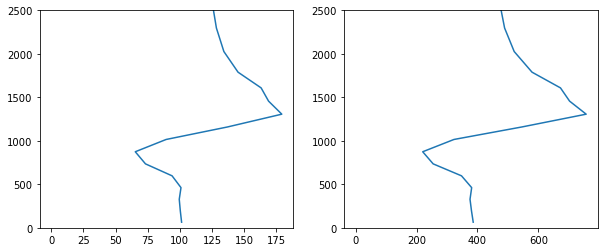

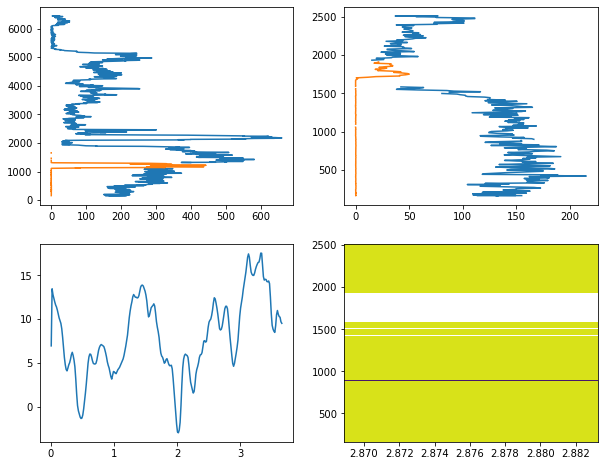

In [7]:
##### aircraft data
## initial profile
RFin_alt  = RFin_data.variables['GGALT'][:]  #Reference GPS Altitude (MSL)
RFin_time = RFin_data.variables['time'][:]   #time of measurement: seconds since 2015-07-17T00:00:00+00:00
RFin_time2= RFin_time / (3600 * 24)

## Find the index of model time when aircraft passes
def model_index(time, RFin_time2):
    RFin_time_m = np.nanmean(RFin_time2)
    iii = np.where(abs(time - RFin_time_m) == np.nanmin(abs(time - RFin_time_m)))[0][0]
    return iii

iii = model_index(time, RFin_time2)
RFin_time_mean = time[iii]

iii_M = model_index(MERRA_time2, RFin_time2)

## interpolate model RHO to aircraft levels
def aircraft_RHO(MERRA_H, MERRA_RHO, RFin_alt, iii_M):
    f_RHO    = interpolate.interp1d(MERRA_H[iii_M,:], MERRA_RHO[iii_M,:])
    RFin_RHO = RFin_alt.copy()
    RFin_RHO[:] = np.nan
    indx2 = np.where(RFin_alt > MERRA_H[iii_M,:].max())[0]
    if len(indx2) > 0:
        indx = indx2[-1]
        RFin_RHO[indx+1:] = f_RHO(np.array(RFin_alt[indx+1:]))
        RFin_RHO[:indx+1] = RFin_RHO[indx+1]
    else:
        RFin_RHO = f_RHO(np.array(RFin_alt))
    return RFin_RHO

RFin_RHO = aircraft_RHO(MERRA_H, MERRA_RHO, RFin_alt, iii_M)
RFin_Np1 = RFin_data.variables['CONCU100_RWOOU'][:] / RFin_RHO   #UHSAS Concentration, .1 micron and bigger: converted to #/mg 
RFin_Np5 = RFin_data.variables['CONCU500_RWOOU'][:] / RFin_RHO   #UHSAS Concentration, .5 micron and bigger: converted to #/mg 
RFin_N   = RFin_data.variables['CONCD_LWOI'][:] / RFin_RHO       #CDP Concentration (all cells):  converted to #/mg 
RFin_MR  = RFin_data.variables['MR'][:]     #humidity_mixing_ratio: g/kg
RFin_TH  = RFin_data.variables['THETA'][:]  #Potential Temperature: K
RFin_RH  = RFin_data.variables['RHUM'][:]   #Relative Temperature: %
RFin_P   = RFin_data.variables['PSXC'][:]   #Corrected Static Pressure, Reference: hPa
RFin_Ndrz= RFin_data.variables['CONC2DCR_LWOO'][:]   #Total Fast 2DC Concentration, Round Particles:  #/L
RFin_LWC = RFin_data.variables['PLWCD_LWOI'][:]      #CDP Water/Ice Content: g/m3

## Calculations of aircraft variables
Rd_cp = 0.286
RFin_T   = RFin_TH * (RFin_P / 1000) ** (Rd_cp)
idx1 = np.where(RFin_LWC < 0.01)[0]
idx2 = np.where(RFin_LWC > 1e-3)[0] # 1e-3
RFin_LWC[idx1] = np.nan      # Set points where LWC<0.01 g/m3 to NaN
RFin_N[RFin_N <= 0] = np.nan # remove data with negative cloud droplet number
idx3 = np.where(RFin_Ndrz > .1)[0] # 0.1
RFin_Np1[idx2] = np.nan   # remove aerosol data where LWC>0.01 g/m3
RFin_Np1[idx3] = np.nan   # remove aerosol data where drizzle number > 1/liter

RFin_time2[len(RFin_time2)//2:] = RFin_time2[len(RFin_time2)//2:] + .25 / (24)
RFin_time2_mg, RFin_alt_mg = np.meshgrid(RFin_time2, RFin_alt) # making meshgrid
RFin_Np1_mg, RFin_alt_mg2  = np.meshgrid(RFin_Np1, RFin_alt) # making meshgrid
RFin_RH_mg, RFin_alt_mg2   = np.meshgrid(RFin_RH, RFin_alt) # making meshgrid
RFin_T_mg, RFin_alt_mg2    = np.meshgrid(RFin_T, RFin_alt) # making meshgrid
#RFin_Np1 = smooth(RFin_Np1,20)
RFin_N_mg, RFin_alt_mg2    = np.meshgrid(RFin_N, RFin_alt) # making meshgrid
RFin_N_mg2 = RFin_N_mg.copy()

## return profile
RFrt_time = RFrt_data.variables['time'][:] #time of measurement: seconds since 2015-07-17T00:00:00+00:00
RFrt_time2= 2 + RFrt_time / (3600 * 24)
RFrt_alt  = RFrt_data.variables['GGALT'][:] #Reference GPS Altitude (MSL)

## interpolate model RHO to aircraft level
iii = model_index(time, RFrt_time2)
RFrt_time_mean = time[iii]

iii_M = model_index(MERRA_time2, RFrt_time2)
RFrt_RHO = aircraft_RHO(MERRA_H, MERRA_RHO, RFrt_alt, iii_M)

RFrt_Np1  = RFrt_data.variables['CONCU100_RWOOU'][:] / RFrt_RHO   #UHSAS Concentration, .1 micron and bigger: converted to #/mg  
RFrt_Np5  = RFrt_data.variables['CONCU500_RWOOU'][:] / RFrt_RHO   #UHSAS Concentration, .5 micron and bigger: converted to #/mg 
RFrt_N    = RFrt_data.variables['CONCD_LWOI'][:] / RFrt_RHO       #CDP Concentration (all cells): converted to #/mg 
RFrt_MR   = RFrt_data.variables['MR'][:]     #humidity_mixing_ratio: g/kg
RFrt_TH   = RFrt_data.variables['THETA'][:]  #Potential Temperature: K
RFrt_RH   = RFrt_data.variables['RHUM'][:]   #Relative Temperature: %
RFrt_P    = RFrt_data.variables['PSXC'][:]   #Corrected Static Pressure, Reference: hPa
RFrt_Ndrz = RFrt_data.variables['CONC2DCR_LWOO'][:]   #Total Fast 2DC Concentration, Round Particles:  #/L
RFrt_LWC  = RFrt_data.variables['PLWCD_LWOI'][:]      #CDP Water/Ice Content: g/m3

RFrt_T   = RFrt_TH * (RFrt_P / 1000) ** (Rd_cp)
idx1 = np.where(RFrt_LWC < 0.01)[0]
idx2 = np.where(RFrt_LWC > 1e-3)[0] # 1e-3
RFrt_LWC[idx1] = np.nan      # Set points where LWC<0.01 g/m3 to NaN
RFrt_N[RFrt_N <= 0] = np.nan # remove data with negative cloud droplet number
idx3 = np.where(RFrt_Ndrz > .1)[0] # 0.1
RFrt_Np1[idx2] = np.nan   # remove aerosol data where LWC>0.01 g/m3
RFrt_Np1[idx3] = np.nan   # remove aerosol data where drizzle number > 1/liter

RFrt_time2[len(RFrt_time2)//2:] = RFrt_time2[len(RFrt_time2)//2:] + .25 / (24)
RFrt_time2_mg, RFrt_alt_mg = np.meshgrid(RFrt_time2, RFrt_alt) # making meshgrid
RFrt_Np1_mg, RFrt_alt_mg2  = np.meshgrid(RFrt_Np1, RFrt_alt) # making meshgrid
RFrt_RH_mg, RFrt_alt_mg2   = np.meshgrid(RFrt_RH, RFrt_alt) # making meshgrid
RFrt_T_mg, RFrt_alt_mg2    = np.meshgrid(RFrt_T, RFrt_alt) # making meshgrid
RFrt_N_mg, RFrt_alt_mg2    = np.meshgrid(RFrt_N, RFrt_alt) # making meshgrid
RFrt_N_mg2 = RFrt_N_mg.copy()

## find out the MBL-mean time and MBL-mean number concentration 
# initial flight
iii = model_index(MERRA_time2, RFin_time2)
RFin_Np1_mean = mbl_ave_flight(RFin_alt, RFin_Np1, RFin_RHO, iii, ERA_ZINV)
RFin_N_mean   = mbl_ave_flight(RFin_alt, RFin_N,   RFin_RHO, iii, ERA_ZINV)


# return flight
iii = model_index(MERRA_time2, RFrt_time2)
RFrt_Np1_mean = mbl_ave_flight(RFrt_alt, RFrt_Np1, RFrt_RHO, iii, ERA_ZINV)
RFrt_N_mean   = mbl_ave_flight(RFrt_alt, RFrt_N,   RFrt_RHO, iii, ERA_ZINV)


## MERRA:
iii_MERRA = calc_model_index_MERRA(time, MERRA_time2)

MERRA_Na_mean      = mbl_ave_MERRA(MERRA_Na, ERA_ZINV)
MERRA_Na_corr_mean = mbl_ave_MERRA(MERRA_Na_corr, ERA_ZINV)


iii_Forcing = calc_model_index_MERRA(MERRA_time2, fday)
Forcing_RHO = calc_Forcing_RHO(z, RHO, z_forc[:,:,0,0], iii_Forcing)

Na_accm_MERRA_mean = mbl_ave_Forcing(Na_accm_MERRA[:,:,0,0], ERA_ZINV)


####
fig, axis = plt.subplots(1, 2,figsize=(10,4))
axis[0].plot(MERRA_Na[2,:], MERRA_H[2,:])
axis[1].plot(MERRA_Na_corr[2,:], MERRA_H[2,:])
axis[0].set_ylim([0, 2500])
axis[1].set_ylim([0, 2500])
plt.show()

i_init = np.where(fday * 24 == 16.999878)[0][0]

######
fig, axis = plt.subplots(2, 2,figsize=(10,8))
axis[0,0].plot(RFin_Np1, RFin_alt)
axis[0,0].plot(RFin_N, RFin_alt)
axis[0,1].plot(RFrt_Np1, RFrt_alt)
axis[0,1].plot(RFrt_N, RFrt_alt)
axis[1,0].plot(time, entr)
axis[1,1].contourf(RFrt_time2_mg, RFrt_alt_mg, np.transpose(RFrt_Np1_mg))
plt.show()


## Maps of Meteorological variables

In [27]:
d1  = 27
dn = 4

### ERA5 data:
for i in range(dn):
    ERA_files = Dataset('/home/disk/eos4/jkcm/Data/CSET/ERA5/old/ERA5.sfc.NEP.2015-07-'+str(d1+i)+'.nc')
    if i == 0:
        ERA_lsm   = ERA_files.variables['lsm'][:]    # latitude
        ERA_lat   = ERA_files.variables['latitude'][:]    # latitude
        ERA_lon   = ERA_files.variables['longitude'][:]   # longitude
        ERA_time  = ERA_files.variables['time'][:]        # time
        ERA_SST_all  = ERA_files.variables['sst'][:]         # Sea surface temperature: K
        ERA_SP_all   = ERA_files.variables['sp'][:]          # surface_air_pressure: Pa
    else:
        ERA_SST_all  = np.concatenate((ERA_SST_all, ERA_files.variables['sst'][:]), axis=0)      
        ERA_SP_all   = np.concatenate((ERA_SP_all,  ERA_files.variables['sp'][:]), axis=0)      
    
ERA_SST_mn = np.nanmean(ERA_SST_all,0) - 273.15

ERA_SP_mn  = np.nanmean(ERA_SP_all,0) / 100
ERA_SP_mn[ERA_lsm[0,:,:] == 1] = np.nan
idy = np.where(ERA_lat < 22)[0][0]
idx = np.where(ERA_lon < 205)[0][-1]
ERA_SP_mn[ERA_SP_mn > 1040] = 1040
ERA_SP_mn[ERA_SP_mn < 1005] = 1005
ERA_SP_mn[idy:, :idx] = np.nan# ERA_SP_mn[30,65]

for i in range(dn):
    ERA_files = Dataset('/home/disk/eos4/jkcm/Data/CSET/ERA5/old/ERA5.pres.NEP.2015-07-'+str(d1+i)+'.nc')
    if i == 0:
        ERA_lev   = ERA_files.variables['level'][:] 
        ERA_u_all = ERA_files.variables['u'][:,-1,:,:] 
        ERA_v_all = ERA_files.variables['v'][:,-1,:,:] 
        ERA_gh_all= ERA_files.variables['z'][:,-1,:,:] 
    else:
        ERA_u_all  = np.concatenate((ERA_u_all, ERA_files.variables['u'][:,-1,:,:]), axis=0)      
        ERA_v_all  = np.concatenate((ERA_v_all, ERA_files.variables['v'][:,-1,:,:]), axis=0)      
        ERA_gh_all = np.concatenate((ERA_gh_all, ERA_files.variables['z'][:,-1,:,:]), axis=0)      
        
        
def log_layer_wind_corr(u_z1, z1, z2=10, z0=None):
    if z0 is None:  # assume it's 10**-4 (Bretherton, pers. comm.)
        z0 = 10.**-4
    corr = np.log(z2/z0)/np.log(z1/z0)
    u_z2 = u_z1*corr
    return u_z2

ERA_u10 = log_layer_wind_corr(ERA_u_all, ERA_gh_all, z2=10, z0=None)
ERA_v10 = log_layer_wind_corr(ERA_v_all, ERA_gh_all, z2=10, z0=None)

ERA_u_mn   = np.nanmean(ERA_u_all,0)
ERA_v_mn   = np.nanmean(ERA_v_all,0)        
ERA_gh_mn  = np.nanmean(ERA_gh_all,0)   
ERA_u10_mn = np.nanmean(ERA_u10,0)
ERA_v10_mn = np.nanmean(ERA_v10,0)        

ERA_u10_mn[ERA_lsm[0,:,:] == 1] = np.nan
ERA_v10_mn[ERA_lsm[0,:,:] == 1] = np.nan


### GOES geo data:
#GOES_lat = GOES_data.variables['latitude'][:] 
#GOES_lon = GOES_data.variables['longitude'][:] 
#GOES_lat_mn = np.nanmean(np.nanmean(GOES_lat,2),1)
CERES_lat = read_var_1D('lat')
CERES_lon = read_var_1D('lon')

### Flight paths:
RFin_files = Dataset('/home/disk/eos4/jkcm/Data/CSET/flight_data/RF10.20150727.145900_221100.PNI.nc')
RFin_lat   = RFin_files.variables['GGLAT'][:]    # Reference GPS Latitude
RFin_lon   = RFin_files.variables['GGLON'][:]   #

RFrt_files = Dataset('/home/disk/eos4/jkcm/Data/CSET/flight_data/RF11.20150729.163000_000800.PNI.nc')
RFrt_lat   = RFrt_files.variables['GGLAT'][:]    # Reference GPS Latitude
RFrt_lon   = RFrt_files.variables['GGLON'][:]   #

ERA_wind = (ERA_u_mn ** 2 + ERA_v_mn ** 2) ** .5
ERA_wind10 = (ERA_u10_mn ** 2 + ERA_v10_mn ** 2) ** .5

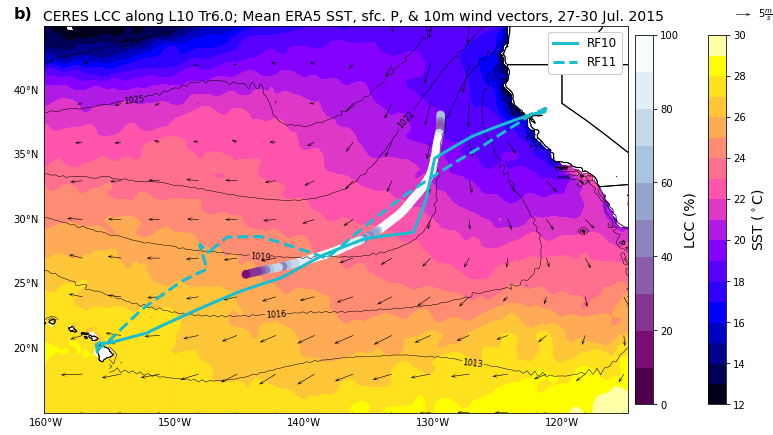

In [28]:
v = 10

##"""Create an N-bin discrete colormap from the specified input map"""
def discrete_cmap(N, base_cmap=None):
    # Note that if base_cmap is a string or None, you can simply do
    #    return plt.cm.get_cmap(base_cmap, N)
    # The following works for string, None, or a colormap instance:

    base = plt.cm.get_cmap(base_cmap)
    color_list = base(np.linspace(0, 1, N))
    cmap_name = base.name + str(N)
    return base.from_list(cmap_name, color_list, N)

#####
#proj = ccrs.LambertConformal(central_longitude=-95.0, central_latitude=25.0, false_easting=0.0, false_northing=0.0)#, secant_latitudes=None, standard_parallels=None, globe=None, cutoff=-30)
proj = ccrs.PlateCarree()
clevs = np.arange(12, 31, 1)
ticks = np.arange(12, 31, 2)
clevs2= np.arange(0, 100.1, 10)
ticks2= np.arange(0, 100.1, 20)
clevs10 = np.arange(1010, 1045, 3)
cmap=plt.cm.BuPu_r
norm = matplotlib.colors.BoundaryNorm(clevs2, cmap.N)

fig   = plt.figure(figsize=(14,8))
ax    = plt.axes(projection = proj)
# magma, gnuplot2, CMRmap, plasma, jet, nipy_spectral, cubehelix, copper, YlGnBu_r, BuPu_r
csf   = ax.contourf(ERA_lon, ERA_lat, ERA_SST_mn, clevs, cmap = 'gnuplot2', transform = ccrs.PlateCarree())
csf15 = ax.quiver(ERA_lon[::v], ERA_lat[::v], ERA_u10_mn[::v, ::v], ERA_v10_mn[::v, ::v], width=0.001, scale=200,\
                  headwidth=7, headlength=10)#, label='10m wind vectors')#, units='width')
qk    = ax.quiverkey(csf15, 1.21, 1.03, 5, r'$5  \frac{m}{s}$', labelpos='E', transform = ccrs.PlateCarree(), color='k')#, coordinates='figure')
csf10 = ax.contour(ERA_lon, ERA_lat, ERA_SP_mn, clevs10, colors='k', linewidths=.5, transform = ccrs.PlateCarree(), labels='sfc. P')
ax.clabel(csf10, fontsize=8, inline=1, fmt='%1.0f')
csf0  = ax.plot(RFin_lon, RFin_lat, '-', color='tab:cyan', linewidth=3, label='RF10', transform = ccrs.PlateCarree())
csf00 = ax.plot(RFrt_lon, RFrt_lat, '--', color='tab:cyan', linewidth=3, label='RF11', transform = ccrs.PlateCarree()) 
csf1  = ax.scatter(CERES_lon, CERES_lat, c=CERES_cld, s=60, cmap=cmap, norm=norm, transform = ccrs.PlateCarree())#csf1 = ax.contour(ERA_lon,  ERA_lat, ERA_SP_mn, transform = ccrs.PlateCarree())
ax.coastlines(linewidth=.8)
#ax.set_extent([-126, -66, 19, 50])
ax.add_feature(cfeature.BORDERS, linewidth=1)
ax.add_feature(cfeature.STATES, linewidth=1)
gridlines = ax.gridlines(draw_labels=True, linewidth=.01)#, color='gray', alpha=0.5, linestyle='--'
gridlines.ylabels_right = None
gridlines.xlabels_top = None
plt.title('        CERES LCC along L10 Tr6.0; Mean ERA5 SST, sfc. P, & 10m wind vectors, 27-30 Jul. 2015', fontsize = 14)
ax.text(-0.02, 1.05, 'b)', transform=ax.transAxes, fontsize=16, fontweight='bold', va='top', ha='right')
cb = plt.colorbar(csf, shrink=.85, pad=-0.04, ticks=ticks)#, orientation='horizontal')
cb.set_label('SST ($^\circ$C)', fontsize=14)#, rotation=270)
cb1= plt.colorbar(csf1, shrink=.85, pad=0.01, ticks=ticks2)#, orientation='horizontal')
cb1.set_label('LCC (%)', fontsize=14)#, rotation=270)
legend = ax.legend(fontsize=12)
legend.get_frame().set_alpha(None)
#plt.savefig(outfile + 'low' + name[iter] + '.' + str(yyyymmddhh) + '_' + str_t + ':00:00' + '.png')
plt.show()

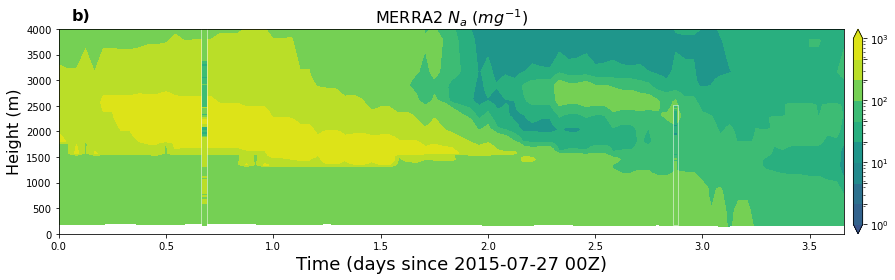

In [8]:
from matplotlib.patches import Rectangle

cmap = matplotlib.cm.viridis(np.linspace(0,1,20))
cmap = matplotlib.colors.ListedColormap(cmap[5:-1,:-1])

clevs = [1, 3, 6, 10, 30, 60, 100, 300, 600, 1000]
ticks = [1, 3, 6, 10, 30, 60, 100, 300, 600, 1000]


#######
fig, axis = plt.subplots(1, 1,figsize=(14,4))

cc1 = axis.contourf(fday_mg, z_forc[:,:,0,0], Na_accm_MERRA[:,:,0,0]*1e-6, clevs, \
                   norm=matplotlib.colors.LogNorm(), extend='both', cmap = cmap)
#cc1 = axis.contourf(MERRA_time_mg, MERRA_H_mg, MERRA_Na_corr, clevs, \
#                   norm=matplotlib.colors.LogNorm(), extend='both', cmap = cmap)
axis.contourf(RFin_time2_mg, RFin_alt_mg, np.transpose(RFin_Np1_mg), clevs, extend='both', cmap = cmap, norm=matplotlib.colors.LogNorm())
axis.contourf(RFrt_time2_mg, RFrt_alt_mg, np.transpose(RFrt_Np1_mg), clevs, extend='both', cmap = cmap, norm=matplotlib.colors.LogNorm())

currentAxis = plt.gca()
currentAxis.add_patch(Rectangle((RFin_time2[0]-0.005, RFin_alt[-1]), RFin_time2[-1] - RFin_time2[0] + 0.007, RFin_alt[0] - RFin_alt[-1],\
                                facecolor="none", ec='w', lw=.5))

currentAxis.add_patch(Rectangle((RFrt_time2[0]-0.005, RFrt_alt[-1]), RFrt_time2[-1] - RFrt_time2[0] + 0.007, RFrt_alt[0] - RFrt_alt[-1],\
                                facecolor="none", ec='w', lw=.5))

axis.set_ylabel('Height (m)', fontsize = '16')
axis.set_xlabel('Time (days since '+init_time+')', fontsize = '18')
axis.set_title('MERRA2 $N_a$ ($mg^{-1}$)', fontsize = '16')# , (MBL: MERRA2-UHSAS log-log fit; FT: MERRA2 corrected)
axis.text(0.04, 1.1, 'b)', transform=axis.transAxes, fontsize=16, fontweight='bold', va='top', ha='right')
axis.set_xlim([0, xlim])
axis.set_ylim([0, ylim])
cb = plt.colorbar(cc1, ax = axis, pad = 0.01, ticks=ticks)#, boundaries=[])

plt.tight_layout(w_pad=1)
#plt.savefig('CSET-RF06-Tr2p3' + '_N_MERRA2loglog_forcing'+period+'.png' , format='png', dpi=200)
plt.show()

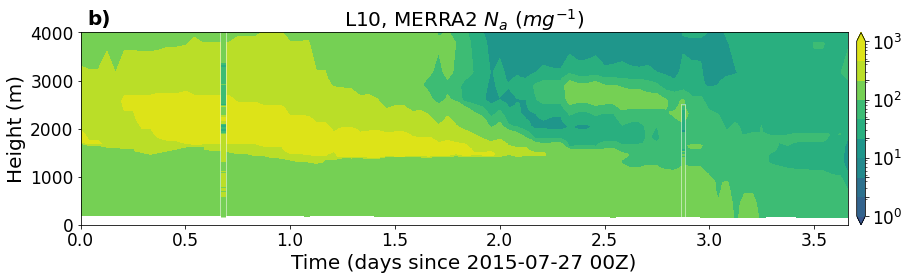

In [9]:
from matplotlib.patches import Rectangle

cmap = matplotlib.cm.viridis(np.linspace(0,1,20))
cmap = matplotlib.colors.ListedColormap(cmap[5:-1,:-1])

def calc_inv_indx_merra(ERA_ZINV, z_forc):
    MERRA2_INV_indx = ERA_ZINV[:-1].copy().astype(int)
    MERRA2_INV_indx[:] = np.nan
    for i in range(len(MERRA2_INV_indx)):
        MERRA2_INV_indx[i] = np.where(abs(z_forc[i,:,0,0] - ERA_ZINV[i]) == min(abs(z_forc[i,:,0,0] - ERA_ZINV[i])))[0][0]
    return MERRA2_INV_indx

def calc_Forcing_RHO(z, RHO, MERRA_H, iii):
    Forcing_RHO = MERRA_H.copy()
    Forcing_RHO[:] = np.nan    
    for i in range(MERRA_H.shape[0]):
        f_RHO = interpolate.interp1d(z[::-1], RHO[iii[i],:][::-1])
        indx2 = np.where(MERRA_H[i,:] > z.max())[0]
        if len(indx2) > 0:
            indx = indx2[-1]
            Forcing_RHO[i, indx+1:] = f_RHO(np.array(MERRA_H[i, indx+1:]))
            Forcing_RHO[i, :indx+1] = Forcing_RHO[i, indx+1]
        else:
            Forcing_RHO[i, :] = f_RHO(np.array(MERRA_H[i,:]))
    return Forcing_RHO

iii_Forcing = calc_model_index_MERRA(MERRA_time2, fday)
Forcing_RHO = calc_Forcing_RHO(z, RHO, z_forc[:,:,0,0], iii_Forcing)

#for i in range(len(MERRA2_INV_indx)):
#    Na_accm_MBL_MERRA2_UHSAS_loglog[i,MERRA2_INV_indx[i]:,0,0] = 1e6*np.exp(0.63 * np.log(Na_accm_MERRA[i,MERRA2_INV_indx[i]: \
#                             ,0,0] * 1e-6 * Forcing_RHO[i,MERRA2_INV_indx[i]:]) + 2.42) / Forcing_RHO[i,MERRA2_INV_indx[i]:]

def calc_MERRA_Na(z, MERRA_Na, z_forc, iii):
    MERRA_var = z_forc.copy()
    MERRA_var[:] = np.nan    
    for i in range(z_forc.shape[0]):
        f_MERRA_Na = interpolate.interp1d(z[iii[i],:], MERRA_Na[iii[i],:])
#        indx2 = np.where(z_forc[i,:] > z[iii[i],:].max())[0]
#        if len(indx2) > 0:
#            indx = indx2[-1]
#            MERRA_var[i, indx+1:] = f_MERRA_Na(np.array(z_forc[i, indx+1:]))
#            MERRA_var[i, :indx+1] = MERRA_var[i, indx+1]
#        else:
        MERRA_var[i, :] = f_MERRA_Na(np.array(z_forc[i,:]))
    return MERRA_var  

MERRA_Na_intrp = calc_MERRA_Na(MERRA_H, MERRA_Na, z_forc[:,:,0,0], iii_Forcing)
MERRA_Na_corr_intrp = calc_MERRA_Na(MERRA_H, MERRA_Na_corr, z_forc[:,:,0,0], iii_Forcing)

def calc_inv_indx_merra2(ERA_ZINV, MERRA_H):
    MERRA2_INV_indx = ERA_ZINV.copy().astype(int)
    MERRA2_INV_indx[:] = np.nan
    for i in range(len(MERRA2_INV_indx)):
        MERRA2_INV_indx[i] = np.where(abs(MERRA_H[i,:] - ERA_ZINV[i]) == min(abs(MERRA_H[i,:] - ERA_ZINV[i])))[0][0]
    return MERRA2_INV_indx

### Smoothing function
def smt(ZINV, jump):
    ZINV2 = ZINV.copy()
    for i in range(1, len(ZINV2)):
        if (abs(ZINV2[i] - ZINV2[i-1]) > jump):
            ZINV2[i] = ZINV2[i-1]
    return ZINV2
ZINV2 = smt(ZINV, 200)
ERA_ZINV2 = smt(ERA_ZINV, 300)


#MERRA2_INV_indx2 = calc_inv_indx_merra2(ERA_ZINV2, MERRA_H)
MERRA2_INV_indx  = calc_inv_indx_merra(ERA_ZINV2, z_forc)

#####
forcing_BLNA_MERRA2loglog       = Dataset('../CSET_RF06_Tr2p3/Forcings_CSET_rf06_traj2p3_v1p2_2021-01-08.nc')#_MERRA2loglogMBL.nc')#, mode='r+')
Na_accm_MBL_MERRA2_UHSAS_loglog = forcing_BLNA_MERRA2loglog.variables['Na_accum'][:]  # Accumulation mode aerosol number mixing ratio from MERRA2 (Corrected based on regression w/in situ CSET data)
Na_accm_MBL_MERRA2_UHSAS_loglog[:,:,0,0] = MERRA_Na_corr_intrp * 1e6

for i in range(len(MERRA2_INV_indx)):
    Na_accm_MBL_MERRA2_UHSAS_loglog[i,MERRA2_INV_indx[i]:,0,0] = 1e6*np.exp(0.63 * np.log(MERRA_Na_intrp[i,MERRA2_INV_indx[i]:\
                                    ] * Forcing_RHO[i,MERRA2_INV_indx[i]:]) + 2.42) / Forcing_RHO[i,MERRA2_INV_indx[i]:]
    
#forcing_BLNA_MERRA2loglog.variables['Na_accum'][:]= Na_accm_MBL_MERRA2_UHSAS_loglog
#forcing_BLNA_MERRA2loglog.close()

#forcing_BLNA_MERRA2loglog2       = Dataset('../CSET_RF06_Tr2p3/Forcings_CSET_rf06_traj2p3_v1p2_2021-01-08_MERRA2loglogMBL.nc')
#Na_accm_MBL_MERRA2_UHSAS_loglog2 = forcing_BLNA_MERRA2loglog2.variables['Na_accum'][:]  # Accumulation mode aerosol number mixing ratio from MERRA2 (Corrected based on regression w/in situ CSET data)

  
#####
clevs = [1, 3, 6, 10, 30, 60, 100, 300, 600, 1000]
ticks = [1, 3, 6, 10, 30, 60, 100, 300, 600, 1000]


fig, axis = plt.subplots(1, 1,figsize=(14,4))

cc1 = axis.contourf(fday_mg, z_forc[:,:,0,0], Na_accm_MBL_MERRA2_UHSAS_loglog[:,:,0,0]*1e-6, clevs, \
                   norm=matplotlib.colors.LogNorm(), extend='both', cmap = cmap)
axis.contourf(RFin_time2_mg, RFin_alt_mg, np.transpose(RFin_Np1_mg), clevs, extend='both', cmap = cmap, norm=matplotlib.colors.LogNorm())
axis.contourf(RFrt_time2_mg, RFrt_alt_mg, np.transpose(RFrt_Np1_mg), clevs, extend='both', cmap = cmap, norm=matplotlib.colors.LogNorm())

currentAxis = plt.gca()
currentAxis.add_patch(Rectangle((RFin_time2[0]-0.005, RFin_alt[-1]), RFin_time2[-1] - RFin_time2[0] + 0.007, RFin_alt[0] - RFin_alt[-1],\
                                facecolor="none", ec='w', lw=.5))

currentAxis.add_patch(Rectangle((RFrt_time2[0]-0.005, RFrt_alt[-1]), RFrt_time2[-1] - RFrt_time2[0] + 0.007, RFrt_alt[0] - RFrt_alt[-1],\
                                facecolor="none", ec='w', lw=.5))

axis.set_ylabel('Height (m)', fontsize=20)
axis.set_xlabel('Time (days since '+init_time+')', fontsize=20)
axis.set_title('L10, MERRA2 $N_a$ ($mg^{-1}$)', fontsize=20)# , (MBL: MERRA2-UHSAS log-log fit; FT: MERRA2 corrected)
axis.text(0.04, 1.12, 'b)', transform=axis.transAxes, fontsize=20, fontweight='bold', va='top', ha='right')
axis.set_xlim([0, xlim])
axis.set_ylim([0, ylim])
axis.tick_params(axis='both', which='major', labelsize=17)
cbar = plt.colorbar(cc1, ax = axis, pad = 0.01, ticks=ticks)#, boundaries=[])
cbar.ax.tick_params(labelsize=17)

plt.tight_layout(w_pad=1)
plt.savefig('CSET-RF10-Tr6p0' + '_N_MERRA2_forcing'+period+'.pdf' , format='pdf', dpi=500)

## Time series and vertical profiles, all cases

### New plots for paper

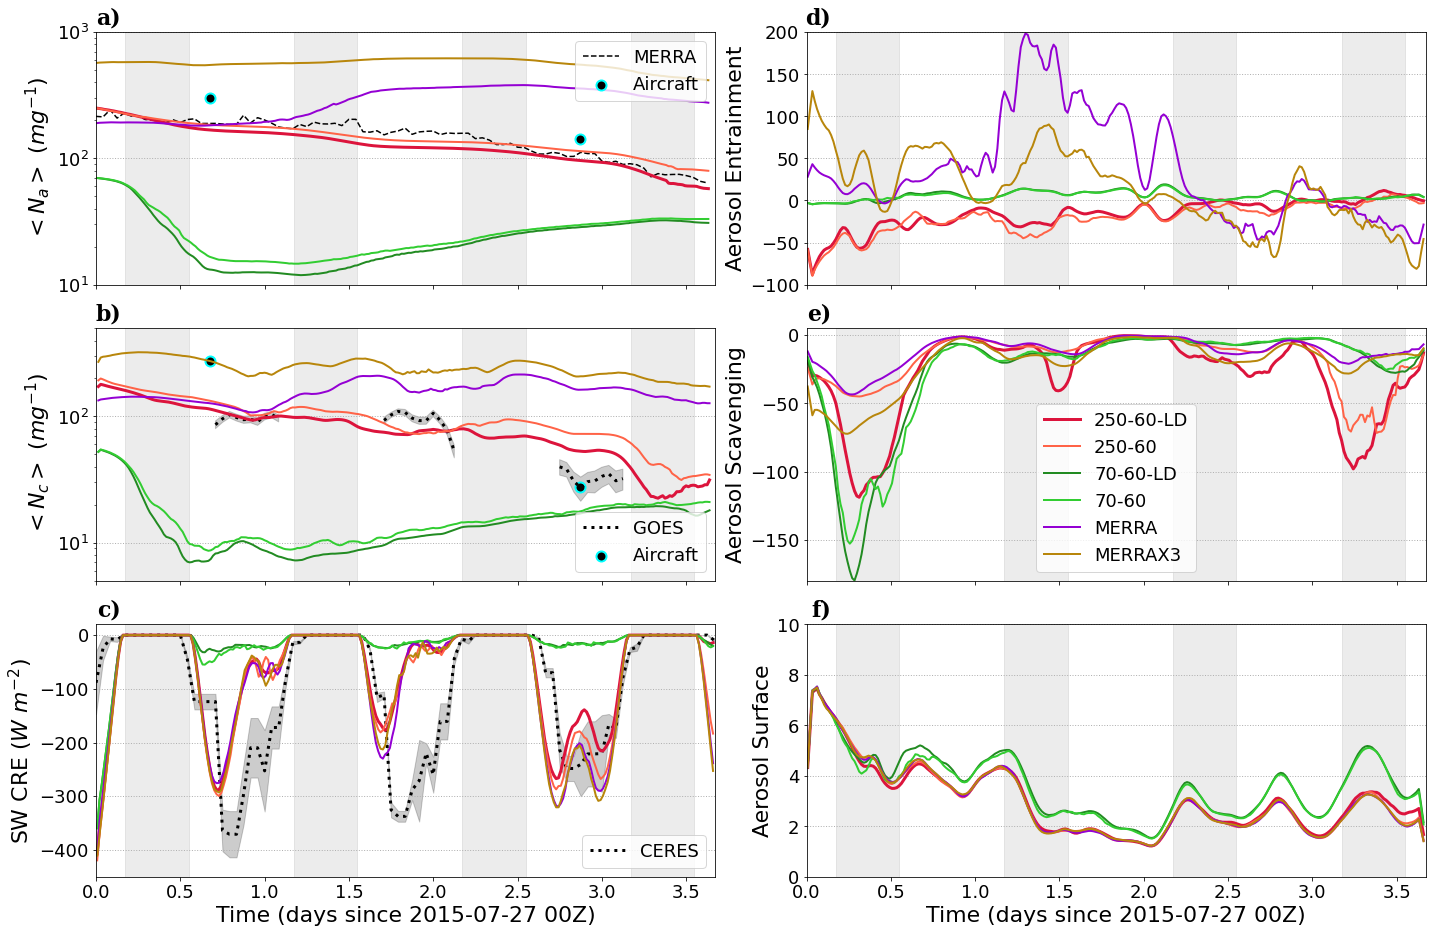

In [35]:
file2d  = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D-ProgAer-RF10-Tr6p0/OUT_2D/CSET_RF10_Tr6p0_256sqx432_100m_RF10_M2005PA_RRTM4PBL_UM5_ProgAer_250_60_128.2Dbin_1.nc')
file2d0 = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D-ProgAer-RF10-Tr6p0/OUT_2D/CSET_RF10_Tr6p0_96x96x432_100m_M2005_RRTM4PBL_UM5_RF10_Tr6p0_va_96.2Dbin_1.nc')
file2d1 = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D-ProgAer-RF10-Tr6p0/OUT_2D/CSET_RF10_Tr6p0_256sqx432_100m_RF10_M2005PA_RRTM4PBL_UM5_ProgAer_70_60_128.2Dbin_1.nc')
file2d2 = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D-ProgAer-RF10-Tr6p0/OUT_2D/CSET_RF10_Tr6p0_96sqx432_100m_RF10_M2005PA_RRTM4PBL_UM5_ProgAer_70_60_NEW_96.2Dbin_1.nc')
file2d3 = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D-ProgAer-RF10-Tr6p0/OUT_2D/CSET_RF10_Tr6p0_96x96x432_100m_M2005_RRTM4PBL_UM5_RF10_Tr6p0_vc_BL_70_96.2Dbin_1.nc')
file2d4 = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D-ProgAer-RF10-Tr6p0/OUT_2D/CSET_RF10_Tr6p0_96x96x432_100m_M2005_RRTM4PBL_UM5_RF10_Tr6p0_vb_FTNA_200_96.2Dbin_1.nc')
file2d5 = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D3D3D-ProgAer-FTMERRA/OUT_2D/CSET_RF10_Tr6p0_96sqx432_100m_RF10_Tr6p0_M2005PA_RRTM4PBL_UM5_ProgAer_MERRA2loglogMBL_96.2Dbin_1.nc')
file2d6 = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D3D3D-ProgAer-FTMERRA/OUT_2D/CSET_RF10_Tr6p0_96sqx432_100m_Tr6p0_M2005PA_RRTM4PBL_UM5_MERRAlogBL_3t_96.2Dbin_1.nc')

fn2d    = [file2d, file2d0, file2d1, file2d2, file2d3, file2d4, file2d5, file2d6]
cases2d = [0, 1, 2, 3, 6, 7]
PANELS1 = ['a)', 'b)', 'c)', 'd)']


#######
time, z, dz, RHO, CWP, RWP, ISCCPTOT, ZINV, entr, LWNTOA, SWNS, P, TABS, inv_idx, W2_Zinv_200,\
            acc_prec, THETA, QT, integ_NA_BL, integ_NC_BL, COD, SAM_re, height_NARC, height_ENTRNMT, height_NASURF,\
            height_NPRA, height_NASED, height_NASCAV, sfc_wnd, albedo, NA, NC, PREC, RH, albd_clear, SOLIN2, SW_CRE, SWNTOAC, \
            LHF, SHF, CLD = read_model_vars(fn[0])

idx_end_MER = model_index(MERRA_time2, time[-1]) + 1
idx_end_GOS = model_index(GOES_time, time[-1]) + 1

if np.isnan(RFrt_N_mean) == 1:
    ii1 = model_index(GOES_time, RFrt_time2)
    RFrt_N_mean = GOES_Nd_med[ii1] + 5

idx_end_FOC = model_index(fday, time[-1])

lngh = 300
box = 5

goes_Nd_final_mean = np.nanmean(np.nanmean(goes_Nd_final,2),1)
goes_Nd_final_std  = np.nanstd(np.nanstd(goes_Nd_final,2),1)
goes_Nd_final_std[goes_Nd_final_std > 6.1] = 6.1

goes_re_all_mean = np.nanmean(np.nanmean(goes_re_all,2),1)
goes_re_all_std  = np.nanstd(np.nanstd(goes_re_all,2),1)

goes_cod_all_mean = np.nanmean(np.nanmean(goes_cod_all,2),1)
goes_cod_all_std  = np.nanstd(np.nanstd(goes_cod_all,2),1)
goes_cod_all_std[goes_cod_all_std > 3.3] = 3.3


PANELS1 = ['a)', 'b)', 'c)', 'd)', 'e)', 'f)', 'g)', 'h)']

#####
fig, axis = plt.subplots(3, 2,figsize=(20,13))

j = 0

i = 0
axis[i,j].fill_between(time, -upbound, upbound, color='k', alpha=.075)
obs1, = axis[i,j].plot(fday[:idx_end_FOC], Na_accm_MERRA_mean[:idx_end_FOC] * 1e-6, '--', color='k')#, label='MERRA')
#obs1, = axis[i,j].plot(MERRA_time2, MERRA_Na_corr_mean, '--', color='k')#, label='MERRA')
obs2  = axis[i,j].scatter(RFin_time_mean, RFin_Np1_mean, marker='o',  color='k', s=100, edgecolors='cyan', linewidths=2)#, label='Aircraft')
axis[i,j].scatter(RFrt_time_mean, RFrt_Np1_mean, marker='o', color='k', s=100, edgecolors='cyan', linewidths=2)
#axis[i,j].plot(MERRA_time2, CERES_Nd * 1.5, '-.', color='r', label='CERES_Nd * 1.5')
axis[i,j].set_ylabel('$<N_a>$ ($mg^{-1}$)', fontsize = '22')
#axis[i,j].set_ylim([0, 350])
axis[i,j].set_ylim([1e1, 1e3])
axis[i,j].set_xlim([0, xlim + xlim/lngh])
axis[i,j].tick_params(axis='both', which='major', labelsize=18)
axis[i,j].grid(linestyle=':', axis='y', linewidth=1)
axis[i,j].axes.get_xaxis().set_ticklabels([])
axis[i,j].set_yscale('log')
axis[i,j].text(0.04, 1.1, PANELS1[i], transform=axis[i,j].transAxes, fontsize=22, fontweight='bold', va='top', fontfamily='serif', ha='right')

####
i = 1
axis[i,j].fill_between(time, -upbound, upbound, color='k', alpha=.075)
axis[i,j].fill_between(GOES_time[:idx_end_GOS], GOES_Nd[:idx_end_GOS] - goes_Nd_final_std[:idx_end_GOS]\
                     , GOES_Nd[:idx_end_GOS] + goes_Nd_final_std[:idx_end_GOS], color='k', alpha=0.2)
axis[i,j].scatter(RFin_time_mean, RFin_N_mean, marker='o', color='k', s=100, edgecolors='cyan', linewidths=2, label='Aircraft')
#axis[i,j].plot(GOES_time[:idx_end_GOS], goes_Nd_final_mean[:idx_end_GOS], ':',  color='k', linewidth= 3, label='GOES')
axis[i,j].plot(GOES_time[:idx_end_GOS], GOES_Nd[:idx_end_GOS], ':',  color='k', linewidth= 3, label='GOES')
#axis[i,j].plot(GOES_time[:idx_end_GOS], GOES_Nd_med[:idx_end_GOS],  color='r', linewidth= 0.5, label='GOES med')
axis[i,j].scatter(RFrt_time_mean, RFrt_N_mean, marker='o', color='k', s=100, edgecolors='cyan', linewidths=2)
axis[i,j].set_ylabel('$<N_c>$ ($mg^{-1}$)', fontsize = '22')
#axis[i,j].set_title(' MBL Column-averaged Cloud Number Concentration', fontsize = '18')
#axis[i,j].set_ylim([0, 210])
axis[i,j].set_ylim([5e0, 5.0e2])
axis[i,j].set_xlim([0, xlim + xlim/lngh])
axis[i,j].tick_params(axis='both', which='major', labelsize=18)
axis[i,j].grid(linestyle=':', axis='y', linewidth=1)
axis[i,j].axes.get_xaxis().set_ticklabels([])
axis[i,j].legend(fontsize = '18')
axis[i,j].set_yscale('log')
axis[i,j].text(0.04, 1.1, PANELS1[i], transform=axis[i,j].transAxes, fontsize=22, fontweight='bold', va='top', fontfamily='serif', ha='right')

####
i = 2
axis[i,j].fill_between(time, -upbound, upbound, color='k', alpha=.075)
axis[i,j].fill_between(MERRA_time2[:idx_end_MER], CERES_sw_cre[:idx_end_MER] - CERES_sw_cre_std[:idx_end_MER], \
                 CERES_sw_cre[:idx_end_MER] + CERES_sw_cre_std[:idx_end_MER], color='k', alpha=0.2)
axis[i,j].plot(MERRA_time2[:idx_end_MER], CERES_sw_cre[:idx_end_MER], ':', linewidth= 3, color='k', label='CERES')

axis[i,j].set_ylabel('SW CRE ($W$ $m^{-2}$)', fontsize = '22')
axis[i,j].set_xlabel('Time (days since '+init_time+')', fontsize = '22')
axis[i,j].set_ylim([-450, 20])
axis[i,j].set_yticks([-400, -300, -200, -100, 0])
axis[i,j].set_xlim([0, xlim + xlim/lngh])
axis[i,j].tick_params(axis='both', which='major', labelsize=18)
axis[i,j].grid(linestyle=':', axis='y', linewidth=1)
axis[i,j].legend(fontsize = '18', loc='lower right')
axis[i,j].text(0.04, 1.1, PANELS1[i], transform=axis[i,j].transAxes, fontsize=22, fontweight='bold', va='top', fontfamily='serif', ha='right')


###########
for jj in cases:# range(NN):
    time, z, dz, RHO, CWP, RWP, ISCCPTOT, ZINV, entr, LWNTOA, SWNS, P, TABS, inv_idx, W2_Zinv_200,\
            acc_prec, THETA, QT, integ_NA_BL, integ_NC_BL, COD, SAM_re, height_NARC, height_ENTRNMT, height_NASURF,\
            height_NPRA, height_NASED, height_NASCAV, sfc_wnd, albedo, NA, NC, PREC, RH, albd_clear, SOLIN2, SW_CRE, SWNTOAC, \
            LHF, SHF, CLD = read_model_vars(fn[jj])
    
    i = 0
    if jj in [0, 1]:
        b_f = 20
        axis[i,j].plot(time[:-2], np.concatenate( [integ_NA_BL[:b_f], smooth(integ_NA_BL, b_f)[b_f:-b_f], integ_NA_BL[-b_f:]] )[:-2], ls[jj], linewidth= lw[jj], color=cc[jj], label=lb[jj])
    else:
        axis[i,j].plot(time[:-2], integ_NA_BL[:-2], ls[jj], linewidth= lw[jj], color=cc[jj], label=lb[jj])
#    leg1 = axis[i,j].legend(fontsize = '18', loc='lower right')

    i = 1
 #   axis[i,j].plot(time[:-2], np.concatenate( [integ_NC_BL[:3], smooth(integ_NC_BL, box)[3:]] )[:-2], ls[jj], linewidth= lw[jj], color=cc[jj], label=lb[jj])
    T3D      = fn2d[jj].variables['time'][:]       # time: day
    QCPATH   = fn2d[jj].variables['QCPATH'][:] # * 1000    # Column cloud liquid mass (vertically integrated), before conversion to unit: g/m2
    NCQCPATH = fn2d[jj].variables['NCQCPATH'][:]  # Column integral of QC*NC (useful for computing mass-weighted NC): kg/kg/m2
    CDNC     = 1e-6 * NCQCPATH / QCPATH     # #/mg
    t3d   = T3D - int(T3D[0])

    CDNC_m = CDNC[:,0,0].copy()
    CDNC_m[:] = np.nan
    for ii in range(len(CDNC_m)):
        CDNC_m[ii] = np.nanmean(CDNC[ii,:,:])

    axis[i,j].plot(t3d[:-2], np.concatenate( [CDNC_m[:3], smooth(CDNC_m, box)[3:]] )[:-2], ls[jj], linewidth= lw[jj], color=cc[jj], label=lb[jj])
    
    i = 2
    COD_fin = COD / ISCCPTOT
    axis[i,j].plot(time, SW_CRE, ls[jj], linewidth= lw[jj], color=cc[jj], label=lb[jj])


leg2 = axis[0,0].legend([obs1, obs2],['MERRA', 'Aircraft'], fontsize = '18', loc='upper right')
#axis[0].add_artist(leg1) # Manually add the first legend back


#########
j = 1

zero = time.copy()
zero[:] = 0

PANELS2 = ['d)', 'e)', 'f)', 'g)', 'h)']


for i in range(3):
    if i == 2:
        axis[i,j].set_xlabel('Time (days since '+init_time+')', fontsize = '22')
    else:
        axis[i,j].axes.get_xaxis().set_ticklabels([])

    upbound = time.copy()
    upbound[:] = ylim
    upbound[SWNS > 0] = np.nan
    zero = time.copy()
    zero[:] = 0

    axis[i,j].fill_between(time, -upbound, upbound, color='k', alpha=.075)
#    axis[i,j].plot(time, zero, '--', c='k', linewidth=.5)       
    axis[i,j].set_xlim([0, xlim + xlim/lngh])
    axis[i,j].tick_params(axis='both', which='major', labelsize=18)
    axis[i,j].grid(linestyle=':', axis='y', linewidth=1)
    axis[i,j].set_ylim([None, None])
    axis[i,j].text(0.04, 1.1, PANELS2[i], transform=axis[i,j].transAxes, fontsize=22, fontweight='bold', va='top', fontfamily='serif', ha='right')

    for jj in cases:# range(NN):
        time, z, dz, RHO, CWP, RWP, ISCCPTOT, ZINV, entr, LWNTOA, SWNS, P, TABS, inv_idx, W2_Zinv_200,\
        acc_prec, THETA, QT, integ_NA_BL, integ_NC_BL, COD, SAM_re, height_NARC, height_ENTRNMT, height_NASURF,\
        height_NPRA, height_NASED, height_NASCAV, sfc_wnd, albedo, NA, NC, PREC, RH, albd_clear, SOLIN2, SW_CRE, SWNTOAC, \
        LHF, SHF, CLD = read_model_vars(fn[jj])
        if i==0:
            axis[i,j].plot(time, smooth(height_ENTRNMT, box), ls[jj], color=cc[jj], linewidth= lw[jj], label=lb[jj])
            axis[i,j].set_ylabel('Aerosol Entrainment', fontsize = '22') # ($mg^{-1}$ $day^{-1}$)
            axis[i,j].set_ylim([-100, 200])
        if i ==1:
            axis[i,j].plot(time, smooth(height_NASCAV, box) + smooth(height_NPRA, box*2) + smooth(height_NARC, box)\
                         , ls[jj], color=cc[jj], linewidth= lw[jj], label=lb[jj])
            axis[i,j].set_ylabel('Aerosol Scavenging', fontsize = '22')
            axis[i,j].set_ylim([-180, 5])
        if i ==2:
            axis[i,j].plot(time, smooth(height_NASURF, box), ls[jj], color=cc[jj], linewidth= lw[jj], label=lb[jj])
            axis[i,j].set_ylabel('Aerosol Surface', fontsize = '22')
            axis[i,j].set_ylim([0, 10])
axis[1,1].legend(fontsize = '18')#, loc='upper right')

plt.tight_layout() #w_pad=0
#plt.show()
plt.savefig(casename + '_micro_'+period+'.pdf' , format='pdf', dpi=500)

In [27]:
##Calculate the index of BL: find index where z is equal to ZINV
forcing_inv_idx = np.arange(len(ERA_ZINV))
forcing_inv_idx[:] = int(0)
for i in range(len(ERA_ZINV)):
    diff = abs(z_forc[i,:,0,0] - ERA_ZINV[i])
    forcing_inv_idx[i] = np.where(diff == np.nanmin(diff))[0][0] 
    
t_mean_MERRA_Na = np.nanmean([Na_accm_MERRA[i,forcing_inv_idx[i],0,0] * 1e-6 for i in range(z_forc.shape[0])])

print('Initial MBL-averaged Na from MERRA: ', Na_accm_MERRA_mean[0] * 1e-6)
print('time-mean FT value right above the inversion from MERRA: ', t_mean_MERRA_Na)

Initial MBL-averaged Na from MERRA:  215.31006399999998
time-mean FT value right above the inversion from MERRA:  269.97510125842695


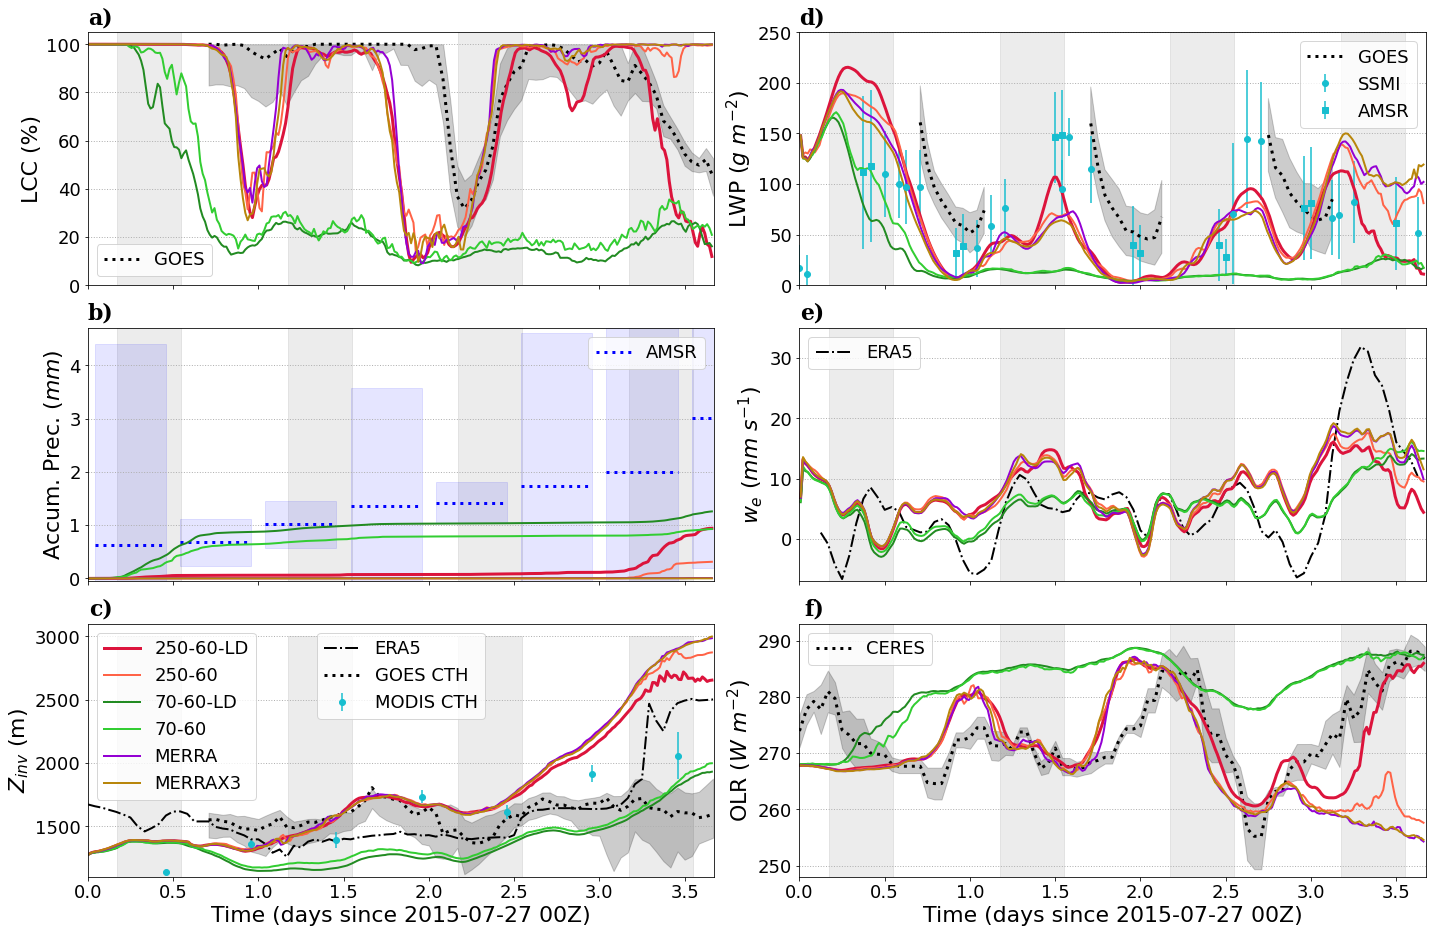

In [32]:
time, z, dz, RHO, CWP, RWP, ISCCPTOT, ZINV, entr, LWNTOA, SWNS, P, TABS, inv_idx, W2_Zinv_200,\
            acc_prec, THETA, QT, integ_NA_BL, integ_NC_BL, COD, SAM_re, height_NARC, height_ENTRNMT, height_NASURF,\
            height_NPRA, height_NASED, height_NASCAV, sfc_wnd, albedo, NA, NC, PREC, RH, albd_clear, SOLIN2, SW_CRE, SWNTOAC, \
            LHF, SHF, CLD = read_model_vars(fn[0])

idx_end_MER = model_index(MERRA_time2, time[-1]) + 1
idx_end_GOS = model_index(GOES_time, time[-1]) + 1

lngh = 300
box = 5
ERA_c = 'k'
GOES_time2 = (GOES_time0 + 16) / 24

GOES_lwp_std[GOES_lwp_std > 36] = 36

goes_LCC_up = GOES_LCC + goes_LCC_std
goes_LCC_up[goes_LCC_up > 100] = 100

PANELS1 = ['a)', 'b)', 'c)', 'd)', 'e)', 'f)', 'g)', 'h)']

##### Calculate accumulated AMSR prec
delta_d  = 0.5
accm     = 0
accm_std = 0
AMSR_prec_accm        = AMSR_prec.copy()
AMSR_prec_accm[:]     = np.nan
AMSR_prec_accm_std    = AMSR_prec.copy()
AMSR_prec_accm_std[:] = np.nan

cints = np.arange(0,int(MERRA_time2[-1])+1.5, delta_d)
for i in range(len(cints)-1):
    i_d = np.where((MERRA_time2 > cints[i]) & (MERRA_time2 < cints[i] + delta_d))[0]
    if np.isnan( np.nanmean(AMSR_prec[i_d]) ) != 1: 
        accm    += np.nanmean(AMSR_prec[i_d]) * delta_d
        accm_std = np.nanmean(AMSR_prec_std[i_d])
    else:
        accm    += accm * delta_d
        accm_std = accm_std
    AMSR_prec_accm[i_d]     = accm
    AMSR_prec_accm_std[i_d] = accm_std


########
fig, axis = plt.subplots(3, 2,figsize=(20,13))

j = 0
i = 0
axis[i,j].fill_between(time, -upbound, upbound, color='k', alpha=.075)
#obs1, = axis[i,j].plot(MERRA_time2[:idx_end_MER], ERA_lcc[:idx_end_MER], '-.', linewidth= 2, color=ERA_c)#, label='ERA5')
axis[i,j].fill_between(GOES_time[:idx_end_GOS], GOES_LCC[:idx_end_GOS] - goes_LCC_std[:idx_end_GOS], goes_LCC_up[:idx_end_GOS], color='k', alpha=0.2)
obs2, = axis[i,j].plot(GOES_time[:idx_end_GOS], GOES_LCC[:idx_end_GOS], ':', linewidth= 3, color='k', label='GOES')
#axis[i,j].plot(GOES_time, goes_LCC_mean, linewidth= 1, color='b', label='GOES mean')
#axis[i,j].plot(GOES_time, goes_LCC_med, linewidth= 1, color='r', label='GOES med')
#axis[i,j].fill_between(MERRA_time2, CERES_cld - CERES_cld_std, CERES_cld + CERES_cld_std, color='b', alpha=0.2)
#axis[i,j].plot(MERRA_time2[:idx_end_MER], CERES_cld[:idx_end_MER], '-.',linewidth= 1.5, color='b', label='CERES')
axis[i,j].set_ylabel('LCC (%)', fontsize=22)
axis[i,j].set_ylim([0, 105])
axis[i,j].set_xlim([0, xlim + xlim / lngh])
axis[i,j].axes.get_xaxis().set_ticklabels([])
axis[i,j].tick_params(axis='both', which='major', labelsize=18)
axis[i,j].grid(linestyle=':', axis='y', linewidth=1)
axis[i,j].text(0.04, 1.1, PANELS1[i], transform=axis[i,j].transAxes, fontsize=22, fontweight='bold', va='top', fontfamily='serif', ha='right')
axis[i,j].legend(fontsize=18)#, loc='upper left')

i = 1
axis[i,j].fill_between(time, -upbound, upbound, color='k', alpha=.075)
#axis[i,j].errorbar(MERRA_time2[:idx_end_MER], AMSR_prec[:idx_end_MER], yerr=AMSR_prcp_std[:idx_end_MER], color='tab:blue', fmt='o', label='AMSR')
#axis[i,j].scatter(MERRA_time2[:idx_end_MER], AMSR_prec[:idx_end_MER], color='tab:blue', marker='o', label='AMSR')
axis[i,j].fill_between(MERRA_time2, AMSR_prec_accm - AMSR_prec_accm_std\
                     , AMSR_prec_accm + AMSR_prec_accm_std, color='b', alpha=0.1)
axis[i,j].plot(MERRA_time2, AMSR_prec_accm, ':', color='b', linewidth= 3, label='AMSR')

axis[i,j].set_ylabel('Accum. Prec. ($mm$)', fontsize=22)
axis[i,j].set_xlim([0, xlim + xlim / lngh])
axis[i,j].set_ylim([-0.05, 4.7])
axis[i,j].tick_params(axis='both', which='major', labelsize=18)
axis[i,j].grid(linestyle=':', axis='y', linewidth=1)
axis[i,j].axes.get_xaxis().set_ticklabels([])
axis[i,j].legend(fontsize=18)#, loc='upper left')
axis[i,j].text(0.04, 1.1, PANELS1[i], transform=axis[i,j].transAxes, fontsize=22, fontweight='bold', va='top', fontfamily='serif', ha='right')

i = 2
axis[i,j].fill_between(time, -upbound, upbound, color='k', alpha=.075)
obs11, = axis[i,j].plot(MERRA_time2[:idx_end_MER], ERA_ZINV[:idx_end_MER], '-.', color=ERA_c, linewidth= 2)#, label='ERA5')
axis[i,j].fill_between(GOES_time[:idx_end_GOS], goes_CTH_25[:idx_end_GOS] * 1000, goes_CTH_75[:idx_end_GOS] * 1000, color='k', alpha=0.2)
obs12, = axis[i,j].plot(GOES_time[:idx_end_GOS], GOES_CTH[:idx_end_GOS]  * 1000, ':', linewidth= 3, color='k')#, label='GOES CTH')
if (CTH.shape[0] == CTH_std.shape[0]):
    obs13 = axis[i,j].errorbar(fday[:idx_end_MER], CTH[:,0,0][:idx_end_MER], yerr=CTH_std[:idx_end_MER], color='tab:cyan', fmt='o', markersize='6')#, label='MODIS CTH')
else:
    obs13 = axis[i,j].errorbar(fday[:idx_end_MER], CTH[:,0,0][:idx_end_MER], yerr=CTH_std[1:][:idx_end_MER], color='tab:cyan', fmt='o', markersize='6')#, label='MODIS CTH')

axis[i,j].set_ylabel('$Z_{inv}$ (m)', fontsize=22)
axis[i,j].set_xlim([0, xlim + xlim / lngh])
axis[i,j].set_ylim([1100, 3100])
axis[i,j].set_xlabel('Time (days since '+init_time+')', fontsize=22)
axis[i,j].tick_params(axis='both', which='major', labelsize=18)
axis[i,j].grid(linestyle=':', axis='y', linewidth=1)
axis[i,j].text(0.04, 1.1, PANELS1[i], transform=axis[i,j].transAxes, fontsize=22, fontweight='bold', va='top', fontfamily='serif', ha='right')

###
for jj in cases:# range(NN):
    
    time, z, dz, RHO, CWP, RWP, ISCCPTOT, ZINV, entr, LWNTOA, SWNS, P, TABS, inv_idx, W2_Zinv_200,\
            acc_prec, THETA, QT, integ_NA_BL, integ_NC_BL, COD, SAM_re, height_NARC, height_ENTRNMT, height_NASURF,\
            height_NPRA, height_NASED, height_NASCAV, sfc_wnd, albedo, NA, NC, PREC, RH, albd_clear, SOLIN2, SW_CRE, SWNTOAC, \
            LHF, SHF, CLD = read_model_vars(fn[jj])
    i = 0
    axis[i,j].plot(time, ISCCPTOT * 100, ls[jj], linewidth= lw[jj], color=cc[jj], label=lb[jj]) # CLDLOW will not be used.
    i = 1
    axis[i,j].plot(time, acc_prec, ls[jj], linewidth= lw[jj], color=cc[jj], label=lb[jj])
#    axis[i,j].legend(fontsize=18, loc='upper right')
    i = 2
    axis[i,j].plot(time, ZINV, ls[jj], linewidth= lw[jj], color=cc[jj], label=lb[jj])
    leg1 = axis[i,j].legend(fontsize=18, loc='upper left')
    
leg2 = axis[2,0].legend([obs11, obs12, obs13],['ERA5', 'GOES CTH', 'MODIS CTH'], fontsize=18, loc='upper center')
axis[2,0].add_artist(leg1) # Manually add the first legend back    

#############
j = 1


time, z, dz, RHO, CWP, RWP, ISCCPTOT, ZINV, entr, LWNTOA, SWNS, P, TABS, inv_idx, W2_Zinv_200,\
            acc_prec, THETA, QT, integ_NA_BL, integ_NC_BL, COD, SAM_re, height_NARC, height_ENTRNMT, height_NASURF,\
            height_NPRA, height_NASED, height_NASCAV, sfc_wnd, albedo, NA, NC, PREC, RH, albd_clear, SOLIN2, SW_CRE, SWNTOAC, \
            LHF, SHF, CLD = read_model_vars(fn[0])

idx_end_MER = model_index(MERRA_time2, time[-1]) + 1
idx_end_GOS = model_index(GOES_time, time[-1]) + 1

box = 5
ERA_c = 'k'

PANELS2 = ['d)', 'e)', 'f)', 'g)', 'h)']

####

i = 0
axis[i,j].fill_between(time, -upbound, upbound, color='k', alpha=.075)
#axis[i,j].plot(MERRA_time2[:idx_end_MER], ERA_clwp[:idx_end_MER] + ERA_crwp[:idx_end_MER], '-.', linewidth= 2, color=ERA_c, label='ERA5')
axis[i,j].fill_between(GOES_time[:idx_end_GOS], goes_lwp_mean[:idx_end_GOS] - GOES_lwp_std[:idx_end_GOS], \
                     goes_lwp_mean[:idx_end_GOS] + GOES_lwp_std[:idx_end_GOS], color='k', alpha=0.2)
obs2, = axis[i,j].plot(GOES_time[:idx_end_GOS], goes_lwp_mean[:idx_end_GOS], ':', linewidth= 3, color='k', label='GOES')
#axis[i,j].plot(GOES_time[:idx_end_GOS], GOES_lwp[:idx_end_GOS], linewidth= 1, color='b', label='GOES mean')
#axis[i,j].plot(GOES_time[:idx_end_GOS], goes_lwp_med[:idx_end_GOS], linewidth= 1, color='r', label='GOES med')
#axis[i,j].plot(MERRA_time2, smooth(CERES_lwp, box), '-.',linewidth= 1.5, color='mediumblue', label='CERES')
obs3 = axis[i,j].errorbar(MERRA_time2[:idx_end_MER], SSMI_lwp[:idx_end_MER] * 1000, yerr=SSMI_lwp_std[:idx_end_MER] * 1000, color='tab:cyan', fmt='o', label='SSMI')
obs4 = axis[i,j].errorbar(MERRA_time2[:idx_end_MER], AMSR_lwp[:idx_end_MER] * 1000, yerr=AMSR_lwp_std[:idx_end_MER] * 1000, color='tab:cyan', fmt='s', label='AMSR')
axis[i,j].set_ylabel('LWP ($g$ $m^{-2}$)', fontsize=22)
axis[i,j].set_ylim([0, 250])
axis[i,j].set_xlim([0, xlim + xlim / lngh])
axis[i,j].axes.get_xaxis().set_ticklabels([])
axis[i,j].tick_params(axis='both', which='major', labelsize=18)
axis[i,j].grid(linestyle=':', axis='y', linewidth=1)
axis[i,j].text(0.04, 1.1, PANELS2[i], transform=axis[i,j].transAxes, fontsize=22, fontweight='bold', va='top', fontfamily='serif', ha='right')
#axis[i,j].plot(time, MODISLOW * 100, '--', linewidth= 2, color='deepskyblue', label='MODIS CLDLOW (%)')
#axis[i,j].fill_between(GOES_time, goes_lwp_25_test, goes_lwp_75_test, color='k', alpha=0.2)
#axis[i,j].plot(time, CWP / ISCCPTOT, linewidth= 2, color='purple', label='SAM CWP')
#axis[i,j].scatter(MERRA_time2, SSMI_lwp * 1000 * 100 / CERES_cld , color='tab:blue', label='SSMI CWP')
axis[i,j].legend(fontsize=18, loc='upper right')


i = 1
axis[i,j].fill_between(time, -upbound, upbound, color='k', alpha=.075)
axis[i,j].set_ylabel('$w_e$ ($mm$ $s^{-1}$)', fontsize=22)
axis[i,j].set_xlim([0, xlim + xlim / lngh])
axis[i,j].set_ylim([-7, 35])
axis[i,j].axes.get_xaxis().set_ticklabels([])
axis[i,j].tick_params(axis='both', which='major', labelsize=18)
axis[i,j].grid(linestyle=':', axis='y', linewidth=1)
obs10, = axis[i,j].plot(MERRA_time2[:idx_end_MER], ERA_entr[:idx_end_MER], '-.', linewidth= 2, color=ERA_c, label='ERA5')
axis[i,j].text(0.04, 1.1, PANELS2[i], transform=axis[i,j].transAxes, fontsize=22, fontweight='bold', va='top', fontfamily='serif', ha='right')
axis[i,j].legend(fontsize=18, loc='upper left')

# i = 2
# axis[i,j].fill_between(time, -upbound, upbound, color='k', alpha=.075)
# axis[i,j].set_ylabel('$W^{{\prime}^2}(z=Z_{inv}-200m)$', fontsize=22)
# axis[i,j].set_xlim([0, xlim + xlim / lngh])
# axis[i,j].set_ylim([0, .6])
# axis[i,j].axes.get_xaxis().set_ticklabels([])
# axis[i,j].tick_params(axis='both', which='major', labelsize=18)
# axis[i,j].grid(linestyle=':', axis='y', linewidth=1)

i = 2
axis[i,j].fill_between(time, -upbound, upbound, color='k', alpha=.075)
#axis[i,j].fill_between(GOES_time[:idx_end_GOS], goes_OLR_25[:idx_end_GOS], goes_OLR_75[:idx_end_GOS], color='k', alpha=0.2)
#axis[i,j].plot(GOES_time[:idx_end_GOS], np.nanmean(np.nanmean(goes_OLR[:idx_end_GOS],2),1), ':', linewidth= 3, color='darkslategray', label='GOES')
axis[i,j].fill_between(MERRA_time2[:idx_end_MER], CERES_t_lw[:idx_end_MER] - CERES_t_lw_std[:idx_end_MER], CERES_t_lw[:idx_end_MER] + CERES_t_lw_std[:idx_end_MER], color='k', alpha=0.2)
axis[i,j].plot(MERRA_time2[:idx_end_MER], CERES_t_lw[:idx_end_MER], ':',linewidth= 3, color='k', label='CERES')
axis[i,j].set_ylabel('OLR ($W$ $m^{-2}$)', fontsize=22)
axis[i,j].set_xlim([0, xlim + xlim / lngh])
axis[i,j].set_ylim([248, 293])
axis[i,j].set_xlabel('Time (days since '+init_time+')', fontsize=22)
axis[i,j].tick_params(axis='both', which='major', labelsize=18)
axis[i,j].grid(linestyle=':', axis='y', linewidth=1)
axis[i,j].text(0.04, 1.1, PANELS2[i], transform=axis[i,j].transAxes, fontsize=22, fontweight='bold', va='top', fontfamily='serif', ha='right')
axis[i,j].set_yticks([250, 260, 270, 280, 290])
axis[i,j].legend(fontsize=18, loc='upper left')


###
for jj in cases:# range(NN):
    time, z, dz, RHO, CWP, RWP, ISCCPTOT, ZINV, entr, LWNTOA, SWNS, P, TABS, inv_idx, W2_Zinv_200,\
            acc_prec, THETA, QT, integ_NA_BL, integ_NC_BL, COD, SAM_re, height_NARC, height_ENTRNMT, height_NASURF,\
            height_NPRA, height_NASED, height_NASCAV, sfc_wnd, albedo, NA, NC, PREC, RH, albd_clear, SOLIN2, SW_CRE, SWNTOAC, \
            LHF, SHF, CLD = read_model_vars(fn[jj])
    
    i = 0
    S_LWP = CWP# + RWP
#    axis[i,j].plot(time, np.concatenate([S_LWP[:10], smooth(S_LWP, box)[10:-5], S_LWP[-5:]]), ls[jj], linewidth= lw[jj], color=cc[jj], label=lb[jj])
    axis[i,j].plot(time, np.concatenate([S_LWP[:10], smooth(S_LWP, box)[10:-5], S_LWP[-5:]]), ls[jj], linewidth= lw[jj], color=cc[jj], label=lb[jj])
    i = 1
    axis[i,j].plot(time, entr, ls[jj], linewidth= lw[jj], color=cc[jj], label=lb[jj])
#     i = 2
#     axis[i,j].plot(time, np.concatenate([smooth(W2_Zinv_200, 7)[:5], smooth(W2_Zinv_200, box)[5:-3], smooth(W2_Zinv_200, 2)[-3:]]), ls[jj], linewidth= lw[jj], color=cc[jj], label=lb[jj])
    i = 2
    axis[i,j].plot(time, LWNTOA, ls[jj], linewidth= lw[jj], color=cc[jj], label=lb[jj])


#leg2 = axis[0,1].legend([obs2, obs3, obs4],['GOES', 'SSMI', 'AMSR'], fontsize=18)#, loc='upper right')
#axis[0,1].add_artist(leg1) # Manually add the first legend back    

plt.tight_layout()
#plt.show()
plt.savefig(casename + '_meteo_'+period+'.pdf' , format='pdf', dpi=500)

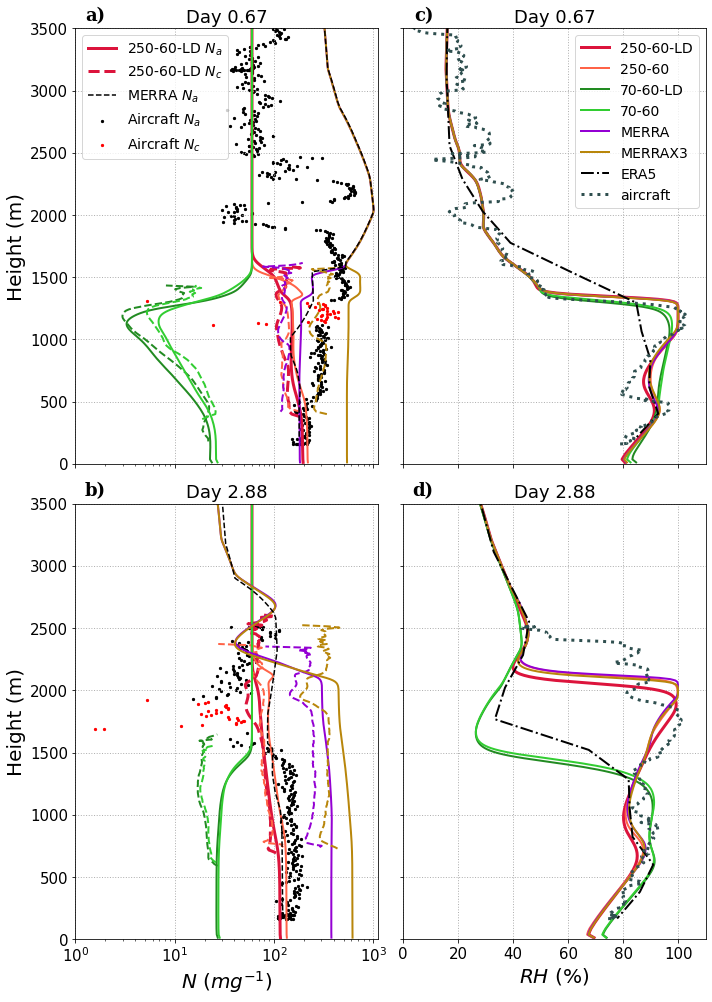

In [10]:
time, z, dz, RHO, CWP, RWP, ISCCPTOT, ZINV, entr, LWNTOA, SWNS, P, TABS, inv_idx, W2_Zinv_200,\
            acc_prec, THETA, QT, integ_NA_BL, integ_NC_BL, COD, SAM_re, height_NARC, height_ENTRNMT, height_NASURF,\
            height_NPRA, height_NASED, height_NASCAV, sfc_wnd, albedo, NA, NC, PREC, RH, albd_clear, SOLIN2, SW_CRE, SWNTOAC, \
            LHF, SHF, CLD = read_model_vars(fn[0])

tt = [model_index(time, RFin_time2), model_index(time, RFrt_time2)]

PANELS1 = ['a)', 'b)', 'c)', 'd)', 'e)', 'f)', 'g)', 'h)']

####
fig, axis = plt.subplots(2, 2,figsize=(10,14))

for i in range(2):
    for j in range(2):
        
        for jj in cases:# range(NN):
            time, z, dz, RHO, CWP, RWP, ISCCPTOT, ZINV, entr, LWNTOA, SWNS, P, TABS, inv_idx, W2_Zinv_200,\
            acc_prec, THETA, QT, integ_NA_BL, integ_NC_BL, COD, SAM_re, height_NARC, height_ENTRNMT, height_NASURF,\
            height_NPRA, height_NASED, height_NASCAV, sfc_wnd, albedo, NA, NC, PREC, RH, albd_clear, SOLIN2, SW_CRE, SWNTOAC, \
            LHF, SHF, CLD = read_model_vars(fn[jj])
            
            if j == 0:
                
                if jj == 0:
                    axis[i,j].plot(NA[tt[i],:],  z, ls[jj], color=cc[jj], linewidth= lw[jj], label=lb[jj]+' $N_a$')
                    axis[i,j].plot(NC[tt[i],:],  z, '--'  , color=cc[jj], linewidth= lw[jj], label=lb[jj]+' $N_c$')
                else:
                    axis[i,j].plot(NA[tt[i],:],  z, ls[jj], color=cc[jj], linewidth= lw[jj])
                    axis[i,j].plot(NC[tt[i],:],  z, '--'  , color=cc[jj], linewidth= lw[jj])    
            elif j == 1:
                cc5 = axis[i,j].plot(RH[tt[i],:], z, ls[jj], c=cc[jj], label=lb[jj], linewidth= lw[jj])
                
        #######        
        i_ERA = np.where( abs(time[tt[i]] - MERRA_time2) == np.nanmin(abs(time[tt[i]] - MERRA_time2)) )[0][0]

            
        if j == 0:
            if i == 1:
                axis[i,j].set_xlabel('$N$ ($mg^{-1}$)', fontsize = '20')
            axis[i,j].set_xlim([1, 1100])
            axis[i,j].set_xscale('log')


            cc60= axis[i,j].plot(Na_accm_MERRA[i_ERA+1,:,0,0]*1e-6, z_forc[i_ERA+1,:,0,0], '--', color='k', label='MERRA $N_a$')
            if i == 0:
                axis[i,j].scatter(RFin_Np1,RFin_alt, marker='o', color='k', s=5, label='Aircraft $N_a$')
                axis[i,j].scatter(RFin_N,  RFin_alt, marker='o', color='r', s=5, label='Aircraft $N_c$')        
            else:
                axis[i,j].scatter(RFrt_Np1,RFrt_alt, marker='o', color='k', s=5, label='Aircraft $N_a$')
                axis[i,j].scatter(RFrt_N,  RFrt_alt, marker='o', color='r', s=5, label='Aircraft $N_c$')
            
                        
        elif j == 1:
            if i == 1:
                axis[i,j].set_xlabel('$RH$ (%)', fontsize = '20')
            else:
                axis[i,j].axes.get_xaxis().set_ticklabels([])
            axis[i,j].set_xlim([0, 110])
            axis[i,j].set_xticks(range(0,120,20)) 
            
            cc50 = axis[i,j].plot(ERA_r[i_ERA,:], ERA_z[i_ERA,:], '-.', c='k', label='ERA5', linewidth= 2)
            if i == 0:
                axis[i,j].plot(RFin_RH, RFin_alt, ':', c= 'darkslategray', label='aircraft', linewidth= 3)
            else:
                axis[i,j].plot(RFrt_RH, RFrt_alt, ':', c= 'darkslategray', label='aircraft', linewidth= 3)        
                
            
        if j == 0:
            axis[i,j].set_ylabel('Height (m)', fontsize = '20')
        else:
            axis[i,j].axes.get_yaxis().set_ticklabels([])
        if i == 0:
            axis[i,j].axes.get_xaxis().set_ticklabels([])
        axis[i,j].set_title('Day {:.2f}'.format(time[tt[i]]), fontsize = '18')        
        axis[i,j].set_ylim([0, 3500])
        axis[i,j].tick_params(axis='both', which='major', labelsize=15)
        axis[i,j].grid(linestyle=':', linewidth=1)                 
        axis[i,j].text(0.1, 1.05, PANELS1[i + j * 2], transform=axis[i,j].transAxes, fontsize=18, fontweight='bold', va='top', fontfamily='serif', ha='right')

axis[0,0].legend(fontsize = '14', loc='upper left')
axis[0,1].legend(fontsize = '14', loc='upper right')
plt.tight_layout()  # w_pad=1
plt.savefig(casename + '_profiles_'+period+'.pdf' , format='pdf', dpi=500, bbox_inches='tight')

### Compare with Peter's run

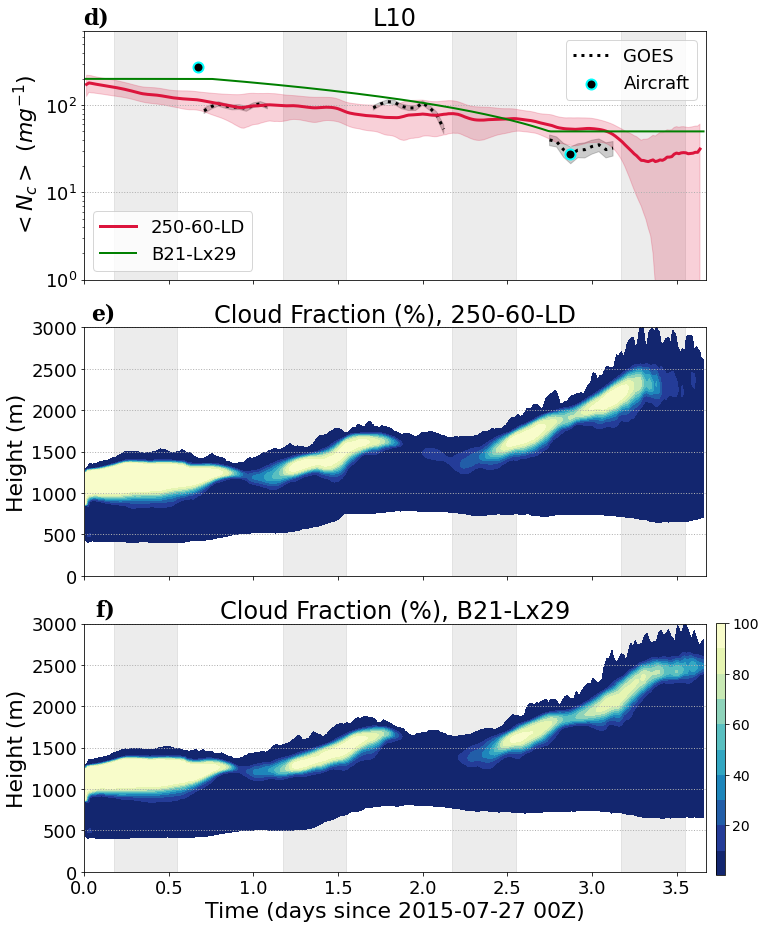

In [11]:
file2d  = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D-ProgAer-RF10-Tr6p0/OUT_2D/CSET_RF10_Tr6p0_256sqx432_100m_RF10_M2005PA_RRTM4PBL_UM5_ProgAer_250_60_128.2Dbin_1.nc')
# file2d0 = Dataset('../../SAMUWgh-CSET-3D-ProgAer-RF10-Tr6p0/OUT_2D/CSET_RF10_Tr6p0_96x96x432_100m_M2005_RRTM4PBL_UM5_RF10_Tr6p0_va_96.2Dbin_1.nc')
# file2d1 = Dataset('../../SAMUWgh-CSET-3D-ProgAer-RF10-Tr6p0/OUT_2D/CSET_RF10_Tr6p0_256sqx432_100m_RF10_M2005PA_RRTM4PBL_UM5_ProgAer_70_60_128.2Dbin_1.nc')
# file2d2 = Dataset('../../SAMUWgh-CSET-3D-ProgAer-RF10-Tr6p0/OUT_2D/CSET_RF10_Tr6p0_96sqx432_100m_RF10_M2005PA_RRTM4PBL_UM5_ProgAer_70_60_NEW_96.2Dbin_1.nc')
# file2d3 = Dataset('../../SAMUWgh-CSET-3D-ProgAer-RF10-Tr6p0/OUT_2D/CSET_RF10_Tr6p0_96x96x432_100m_M2005_RRTM4PBL_UM5_RF10_Tr6p0_vc_BL_70_96.2Dbin_1.nc')
# file2d4 = Dataset('../../SAMUWgh-CSET-3D-ProgAer-RF10-Tr6p0/OUT_2D/CSET_RF10_Tr6p0_96x96x432_100m_M2005_RRTM4PBL_UM5_RF10_Tr6p0_vb_FTNA_200_96.2Dbin_1.nc')
# file2d5 = Dataset('../OUT_2D/CSET_RF10_Tr6p0_96sqx432_100m_RF10_Tr6p0_M2005PA_RRTM4PBL_UM5_ProgAer_MERRA2loglogMBL_96.2Dbin_1.nc')
# file2d6 = Dataset('../OUT_2D/CSET_RF10_Tr6p0_96sqx432_100m_Tr6p0_M2005PA_RRTM4PBL_UM5_MERRAlogBL_3t_96.2Dbin_1.nc')

fn2d    = [file2d]#, file2d1, file2d2, file2d3, file2d4, file2d5, file2d6,  file2d7]
cases2d = [0, 1, 5, 6, 7]
PANELS1 = ['a)', 'b)', 'c)', 'd)']
ylim    = 3000
##########
Peter =   Dataset('/home/disk/eos1/bloss/Runs/CSET/CheyenneOutput/OUT_STAT/CSET_RF10_Tr6p0_288sqx432_100m_M2005_RRTM4PBL_UM5_Nd200to50_wtgStrong_ua.nc')
CDNC_peter = Peter.variables['CDNC'][:]
time_peter = Peter.variables['time'][:]
day_peter  = time_peter - int(time_peter[0])
CLD_peter  = Peter.variables['CLD'][:]      # cloud Fraction
z_peter    = Peter.variables['z'][:]      # cloud Fraction

time_mg_peter, z_mg_peter = np.meshgrid(day_peter, z_peter) # making meshgrid

#######
time, z, dz, RHO, CWP, RWP, ISCCPTOT, ZINV, entr, LWNTOA, SWNS, P, TABS, inv_idx, W2_Zinv_200,\
            acc_prec, THETA, QT, integ_NA_BL, integ_NC_BL, COD, SAM_re, height_NARC, height_ENTRNMT, height_NASURF,\
            height_NPRA, height_NASED, height_NASCAV, sfc_wnd, albedo, NA, NC, PREC, RH, albd_clear, SOLIN2, SW_CRE, SWNTOAC, \
            LHF, SHF, CLD = read_model_vars(fn[0])

time_mg, z_mg = np.meshgrid(time, z) # making meshgrid

idx_end_MER = model_index(MERRA_time2, time[-1]) + 1
idx_end_GOS = model_index(GOES_time, time[-1]) + 1

if np.isnan(RFrt_N_mean) == 1:
    ii1 = model_index(GOES_time, RFrt_time2)
    RFrt_N_mean = GOES_Nd_med[ii1] + 5

idx_end_FOC = model_index(fday, time[-1])

lngh = 300
box = 5

goes_Nd_final_mean = np.nanmean(np.nanmean(goes_Nd_final,2),1)
goes_Nd_final_std  = np.nanstd(np.nanstd(goes_Nd_final,2),1)
goes_Nd_final_std[goes_Nd_final_std > 6.1] = 6.1

goes_re_all_mean = np.nanmean(np.nanmean(goes_re_all,2),1)
goes_re_all_std  = np.nanstd(np.nanstd(goes_re_all,2),1)

goes_cod_all_mean = np.nanmean(np.nanmean(goes_cod_all,2),1)
goes_cod_all_std  = np.nanstd(np.nanstd(goes_cod_all,2),1)
goes_cod_all_std[goes_cod_all_std > 3.3] = 3.3


PANELS1 = ['d)', 'e)', 'f)', 'g)', 'h)']

#####
fig, axis = plt.subplots(3, 1,figsize=(10,13))

i = 0
axis[i].fill_between(time, -upbound, upbound, color='k', alpha=.075)
axis[i].fill_between(GOES_time[:idx_end_GOS], GOES_Nd[:idx_end_GOS] - goes_Nd_final_std[:idx_end_GOS]\
                     , GOES_Nd[:idx_end_GOS] + goes_Nd_final_std[:idx_end_GOS], color='k', alpha=0.2)
obs2  = axis[i].scatter(RFin_time_mean, RFin_N_mean, marker='o', color='k', s=100, edgecolors='cyan', linewidths=2)#, label='Aircraft')
#axis[i].plot(GOES_time[:idx_end_GOS], goes_Nd_final_mean[:idx_end_GOS], ':',  color='k', linewidth= 3, label='GOES')
obs1, = axis[i].plot(GOES_time[:idx_end_GOS], GOES_Nd[:idx_end_GOS], ':',  color='k', linewidth= 3)#, label='GOES')
#axis[i].plot(GOES_time[:idx_end_GOS], GOES_Nd_med[:idx_end_GOS],  color='r', linewidth= 0.5, label='GOES med')
axis[i].scatter(RFrt_time_mean, RFrt_N_mean, marker='o', color='k', s=100, edgecolors='cyan', linewidths=2)
axis[i].set_ylabel('$<N_c>$ ($mg^{-1}$)', fontsize=22)
axis[i].set_title('L10', fontsize=24)
#axis[i].set_title(' MBL Column-averaged Cloud Number Concentration', fontsize=22)
#axis[i].set_ylim([0, 210])
axis[i].set_ylim([1e0, 7.0e2])
axis[i].set_xlim([0, xlim + xlim/lngh])
axis[i].tick_params(axis='both', which='major', labelsize=18)
axis[i].grid(linestyle=':', axis='y', linewidth=1)
axis[i].axes.get_xaxis().set_ticklabels([])
#axis[i].legend(fontsize=18)
axis[i].set_yscale('log')
axis[i].text(0.04, 1.1, PANELS1[i], transform=axis[i].transAxes, fontsize=22, fontweight='bold', va='top', fontfamily='serif', ha='right')

####
i = 1
axis[i].fill_between(time, -upbound, upbound, color='k', alpha=.075)
axis[i].set_ylabel('Height (m)', fontsize=22)
axis[i].set_title('Cloud Fraction (%), ' + lb[0], fontsize=24)
axis[i].set_ylim([0, ylim])
axis[i].set_xlim([0, xlim + xlim/lngh])
axis[i].tick_params(axis='both', which='major', labelsize=18)
axis[i].grid(linestyle=':', axis='y', linewidth=1)
axis[i].axes.get_xaxis().set_ticklabels([])
axis[i].text(0.05, 1.1, PANELS1[i], transform=axis[i].transAxes, fontsize=22, fontweight='bold', va='top', fontfamily='serif', ha='right')


####
i = 2
axis[i].fill_between(time, -upbound, upbound, color='k', alpha=.075)
axis[i].set_ylabel('Height (m)', fontsize=22)
axis[i].set_xlabel('Time (days since '+init_time+')', fontsize=22)
axis[i].set_title('Cloud Fraction (%), ' + 'B21-Lx29', fontsize=24)
axis[i].set_ylim([0, ylim])
axis[i].set_xlim([0, xlim + xlim/lngh])
axis[i].tick_params(axis='both', which='major', labelsize=18)
axis[i].grid(linestyle=':', axis='y', linewidth=1)
axis[i].text(0.05, 1.1, PANELS1[i], transform=axis[i].transAxes, fontsize=22, fontweight='bold', va='top', fontfamily='serif', ha='right')


###########
for jj in [0]: #cases:# range(NN):
    time, z, dz, RHO, CWP, RWP, ISCCPTOT, ZINV, entr, LWNTOA, SWNS, P, TABS, inv_idx, W2_Zinv_200,\
            acc_prec, THETA, QT, integ_NA_BL, integ_NC_BL, COD, SAM_re, height_NARC, height_ENTRNMT, height_NASURF,\
            height_NPRA, height_NASED, height_NASCAV, sfc_wnd, albedo, NA, NC, PREC, RH, albd_clear, SOLIN2, SW_CRE, SWNTOAC, \
            LHF, SHF, CLD = read_model_vars(fn[jj])

    i = 0
 #   axis[i].plot(time[:-2], np.concatenate( [integ_NC_BL[:3], smooth(integ_NC_BL, box)[3:]] )[:-2], ls[jj], linewidth= lw[jj], color=cc[jj], label=lb[jj])
    T3D      = fn2d[jj].variables['time'][:]       # time: day
    QCPATH   = fn2d[jj].variables['QCPATH'][:] # * 1000    # Column cloud liquid mass (vertically integrated), before conversion to unit: g/m2
    NCQCPATH = fn2d[jj].variables['NCQCPATH'][:]  # Column integral of QC*NC (useful for computing mass-weighted NC): kg/kg/m2
    CDNC     = 1e-6 * NCQCPATH / QCPATH     # #/mg
    t3d   = T3D - int(T3D[0])
    
    QCPATH_c = QCPATH[QCPATH < 0.05] = np.nan
    CDNC_c   = 1e-6 * NCQCPATH / QCPATH_c     # #/mg

    CDNC_m = CDNC[:,0,0].copy()
    CDNC_m[:] = np.nan
    CDNC_95 = CDNC[:,0,0].copy()
    CDNC_95[:] = np.nan
    CDNC_05 = CDNC[:,0,0].copy()
    CDNC_05[:] = np.nan 
    CDNC_std = CDNC[:,0,0].copy()
    CDNC_std[:] = np.nan 
    for ii in range(len(CDNC_m)):
        CDNC_m[ii] = np.nanmean(CDNC[ii,:,:])
        CDNC_95[ii] = np.nanquantile(CDNC_c[ii,:,:], 0.95)
        CDNC_05[ii] = np.nanquantile(CDNC_c[ii,:,:], 0.05)
        CDNC_std[ii]= np.nanstd(CDNC[ii,:,:])
    CDNC_dn = CDNC_m - CDNC_std
    CDNC_up = CDNC_m + CDNC_std

#    axis[i].fill_between(t3d[:-2], np.concatenate( [CDNC_05[:3], smooth(CDNC_05, box)[3:]] )[:-2]\
#                     , np.concatenate( [CDNC_95[:3], smooth(CDNC_95, box)[3:]] )[:-2], color=cc[jj], alpha=0.2)
    axis[i].fill_between(t3d[:-2], np.concatenate( [CDNC_dn[:3], smooth(CDNC_dn, box)[3:]] )[:-2]\
                     , np.concatenate( [CDNC_up[:3], smooth(CDNC_up, box)[3:]] )[:-2], color=cc[jj], alpha=0.2)

    axis[i].plot(t3d[:-2], np.concatenate( [CDNC_m[:3], smooth(CDNC_m, box)[3:]] )[:-2], ls[jj], linewidth= lw[jj], color=cc[jj], label=lb[jj])
    axis[i].plot(day_peter, CDNC_peter[:,0], '-', linewidth= '2', color='green', label='B21-Lx29')
    leg1 = axis[i].legend(fontsize=18, loc='lower left')


    i = 1
    clevs  = np.arange(.1, 110, 10)
    ticks  = np.arange(0, 110, 20)
    cc1 = axis[i].contourf(time_mg, z_mg, np.transpose(CLD) * 100, clevs, extend='neither', cmap='YlGnBu_r')# 'cividis')

    i = 2
    cc1 = axis[i].contourf(time_mg_peter, z_mg_peter, np.transpose(CLD_peter) * 100, clevs, extend='neither', cmap='YlGnBu_r')# 'cividis')
#    cb = plt.colorbar(cc1, ax = axis[i], pad = 0.01, ticks=ticks, orientation='horizontal', shrink=0.5) # , norm=matplotlib.colors.LogNorm()
#    cb.ax.tick_params(labelsize=14)


leg2 = axis[0].legend([obs1, obs2],['GOES', 'Aircraft'], fontsize=18, loc='upper right')
axis[0].add_artist(leg1) # Manually add the first legend back

fig.subplots_adjust(right=1.5)
cbar_ax = fig.add_axes([1., 0.06, 0.012, 0.27])
cbar = fig.colorbar(cc1, cax=cbar_ax, pad = 0.0, ticks=ticks)
cbar.ax.tick_params(labelsize=14)

plt.tight_layout() #w_pad=0
plt.savefig(casename + '_compare_peter'+period+'.pdf' , format='pdf', dpi=500, bbox_inches='tight')

## Additional tests
## Turbulence

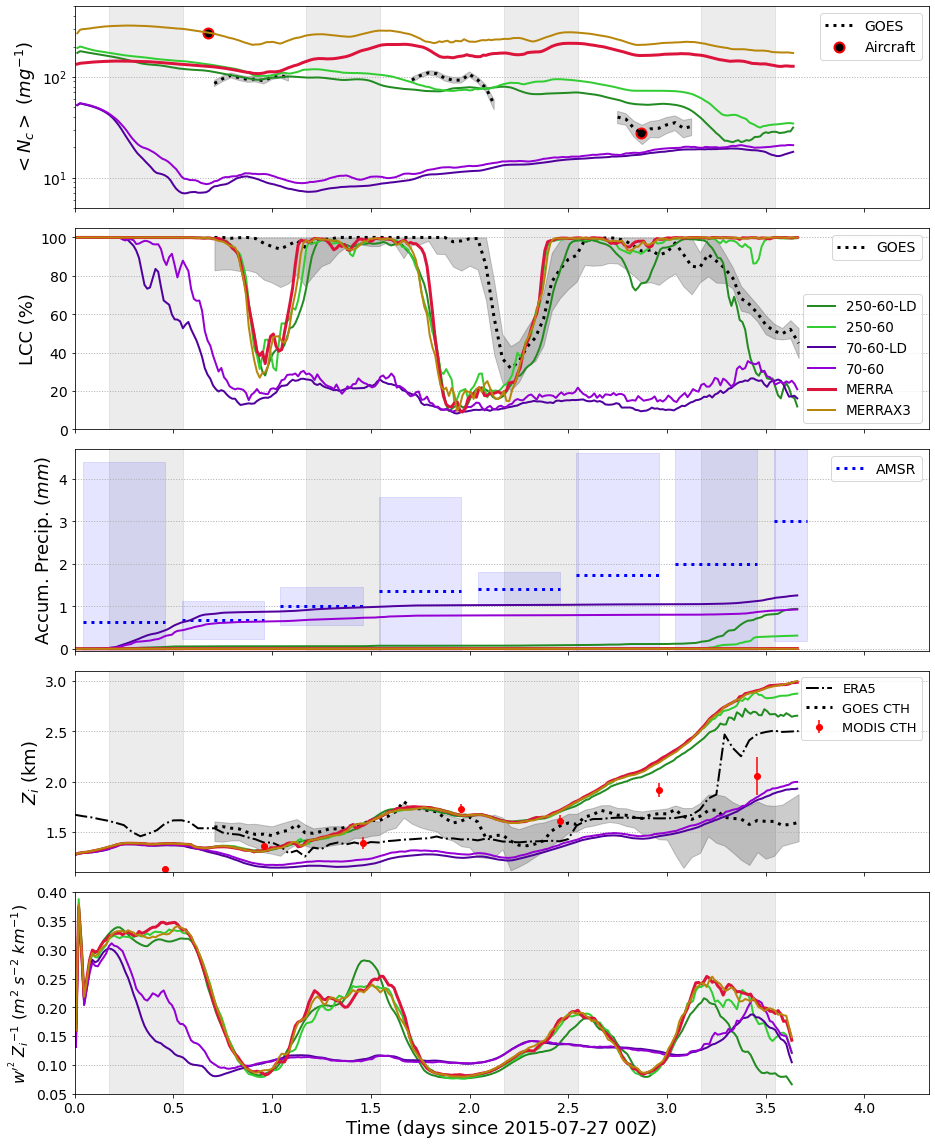

In [54]:
file2d  = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D-ProgAer-RF10-Tr6p0/OUT_2D/CSET_RF10_Tr6p0_256sqx432_100m_RF10_M2005PA_RRTM4PBL_UM5_ProgAer_250_60_128.2Dbin_1.nc')
file2d0 = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D-ProgAer-RF10-Tr6p0/OUT_2D/CSET_RF10_Tr6p0_96x96x432_100m_M2005_RRTM4PBL_UM5_RF10_Tr6p0_va_96.2Dbin_1.nc')
file2d1 = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D-ProgAer-RF10-Tr6p0/OUT_2D/CSET_RF10_Tr6p0_256sqx432_100m_RF10_M2005PA_RRTM4PBL_UM5_ProgAer_70_60_128.2Dbin_1.nc')
file2d2 = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D-ProgAer-RF10-Tr6p0/OUT_2D/CSET_RF10_Tr6p0_96sqx432_100m_RF10_M2005PA_RRTM4PBL_UM5_ProgAer_70_60_NEW_96.2Dbin_1.nc')
file2d3 = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D-ProgAer-RF10-Tr6p0/OUT_2D/CSET_RF10_Tr6p0_96x96x432_100m_M2005_RRTM4PBL_UM5_RF10_Tr6p0_vc_BL_70_96.2Dbin_1.nc')
file2d4 = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D-ProgAer-RF10-Tr6p0/OUT_2D/CSET_RF10_Tr6p0_96x96x432_100m_M2005_RRTM4PBL_UM5_RF10_Tr6p0_vb_FTNA_200_96.2Dbin_1.nc')
file2d5 = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D3D3D-ProgAer-FTMERRA/OUT_2D/CSET_RF10_Tr6p0_96sqx432_100m_RF10_Tr6p0_M2005PA_RRTM4PBL_UM5_ProgAer_MERRA2loglogMBL_96.2Dbin_1.nc')
file2d6 = Dataset('/home/disk/eos3/erfani/SAM/CSET/SAMUWgh-CSET-3D3D3D-ProgAer-FTMERRA/OUT_2D/CSET_RF10_Tr6p0_96sqx432_100m_Tr6p0_M2005PA_RRTM4PBL_UM5_MERRAlogBL_3t_96.2Dbin_1.nc')

fn2d    = [file2d, file2d0, file2d1, file2d2, file2d3, file2d4, file2d5, file2d6]
cases2d = [0, 1, 2, 3, 6, 7]


time, z, dz, RHO, CWP, RWP, ISCCPTOT, ZINV, entr, LWNTOA, SWNS, P, TABS, inv_idx, W2_Zinv_200,\
            acc_prec, THETA, QT, integ_NA_BL, integ_NC_BL, COD, SAM_re, height_NARC, height_ENTRNMT, height_NASURF,\
            height_NPRA, height_NASED, height_NASCAV, sfc_wnd, albedo, NA, NC, PREC, RH, albd_clear, SOLIN2, SW_CRE, SWNTOAC, \
            LHF, SHF, CLD = read_model_vars(fn[0])

idx_end_MER = model_index(MERRA_time2, time[-1]) + 1
idx_end_GOS = model_index(GOES_time, time[-1]) + 1

lngh = 5.5
box = 5
ERA_c = 'k'
GOES_time2 = (GOES_time0 + 16) / 24

GOES_lwp_std[GOES_lwp_std > 36] = 36

goes_LCC_up = GOES_LCC + goes_LCC_std
goes_LCC_up[goes_LCC_up > 100] = 100

PANELS1 = ['a)', 'b)', 'c)', 'd)', 'e)', 'f)', 'g)', 'h)']

##### Calculate accumulated AMSR prec
delta_d  = 0.5
accm     = 0
accm_std = 0
AMSR_prec_accm        = AMSR_prec.copy()
AMSR_prec_accm[:]     = np.nan
AMSR_prec_accm_std    = AMSR_prec.copy()
AMSR_prec_accm_std[:] = np.nan

cints = np.arange(0,int(MERRA_time2[-1])+1.5, delta_d)
for i in range(len(cints)-1):
    i_d = np.where((MERRA_time2 > cints[i]) & (MERRA_time2 < cints[i] + delta_d))[0]
    if np.isnan( np.nanmean(AMSR_prec[i_d]) ) != 1: 
        accm    += np.nanmean(AMSR_prec[i_d]) * delta_d
        accm_std = np.nanmean(AMSR_prec_std[i_d])
    else:
        accm    += accm * delta_d
        accm_std = accm_std
    AMSR_prec_accm[i_d]     = accm
    AMSR_prec_accm_std[i_d] = accm_std


########
fig, axis = plt.subplots(5, 1,figsize=(13,16))

i = 0
axis[i].fill_between(time, -upbound, upbound, color='k', alpha=.075)
axis[i].fill_between(GOES_time[:idx_end_GOS], GOES_Nd[:idx_end_GOS] - goes_Nd_final_std[:idx_end_GOS]\
                     , GOES_Nd[:idx_end_GOS] + goes_Nd_final_std[:idx_end_GOS], color='k', alpha=0.2)
axis[i].scatter(RFin_time_mean, RFin_N_mean, marker='o', color='k', s=100, edgecolors='r', linewidths=2, label='Aircraft')
axis[i].plot(GOES_time[:idx_end_GOS], GOES_Nd[:idx_end_GOS], ':',  color='k', linewidth= 3, label='GOES')
axis[i].scatter(RFrt_time_mean, RFrt_N_mean, marker='o', color='k', s=100, edgecolors='r', linewidths=2)
axis[i].set_ylabel('$<N_c>$ ($mg^{-1}$)', fontsize = '18')
axis[i].set_ylim([5e0, 5.0e2])
axis[i].set_xlim([0, xlim + xlim/lngh])
axis[i].tick_params(axis='both', which='major', labelsize=14)
axis[i].grid(linestyle=':', axis='y', linewidth=1)
axis[i].axes.get_xaxis().set_ticklabels([])
axis[i].legend(fontsize = '14')
axis[i].set_yscale('log')
#axis[i].text(0.04, 1.08, PANELS1[i], transform=axis[i].transAxes, fontsize=18, fontweight='bold', va='top', fontfamily='serif', ha='right')

i = 1
axis[i].fill_between(time, -upbound, upbound, color='k', alpha=.075)
axis[i].fill_between(GOES_time[:idx_end_GOS], GOES_LCC[:idx_end_GOS] - goes_LCC_std[:idx_end_GOS], goes_LCC_up[:idx_end_GOS], color='k', alpha=0.2)
obs2, = axis[i].plot(GOES_time[:idx_end_GOS], GOES_LCC[:idx_end_GOS], ':', linewidth= 3, color='k')#, label='GOES')
axis[i].set_ylabel('LCC (%)', fontsize = '18')
axis[i].set_ylim([0, 105])
axis[i].set_xlim([0, xlim + xlim / lngh])
axis[i].axes.get_xaxis().set_ticklabels([])
axis[i].tick_params(axis='both', which='major', labelsize=14)
axis[i].grid(linestyle=':', axis='y', linewidth=1)

i = 2
axis[i].fill_between(time, -upbound, upbound, color='k', alpha=.075)
axis[i].fill_between(MERRA_time2, AMSR_prec_accm - AMSR_prec_accm_std\
                     , AMSR_prec_accm + AMSR_prec_accm_std, color='b', alpha=0.1)
axis[i].plot(MERRA_time2, AMSR_prec_accm, ':', color='b', linewidth= 3, label='AMSR')

axis[i].set_ylabel('Accum. Precip. ($mm$)', fontsize = '18')
axis[i].set_xlim([0, xlim + xlim / lngh])
axis[i].set_ylim([-0.05, 4.7])
axis[i].tick_params(axis='both', which='major', labelsize=14)
axis[i].grid(linestyle=':', axis='y', linewidth=1)
axis[i].axes.get_xaxis().set_ticklabels([])
axis[i].legend(fontsize = '14', loc='upper right')

i = 3
axis[i].fill_between(time, -upbound, upbound, color='k', alpha=.075)
axis[i].plot(MERRA_time2[:idx_end_MER], ERA_ZINV[:idx_end_MER]/1000, '-.', color=ERA_c, linewidth= 2, label='ERA5')
axis[i].fill_between(GOES_time[:idx_end_GOS], goes_CTH_25[:idx_end_GOS], goes_CTH_75[:idx_end_GOS], color='k', alpha=0.2)
axis[i].plot(GOES_time[:idx_end_GOS], GOES_CTH[:idx_end_GOS], ':', linewidth= 3, color='k', label='GOES CTH')
if (CTH.shape[0] == CTH_std.shape[0]):
    axis[i].errorbar(fday[:idx_end_MER], CTH[:,0,0][:idx_end_MER]/1000, yerr=CTH_std[:idx_end_MER]/1000, color='r', fmt='o', markersize='6', label='MODIS CTH')
else:
    axis[i].errorbar(fday[:idx_end_MER], CTH[:,0,0][:idx_end_MER]/1000, yerr=CTH_std[1:][:idx_end_MER]/1000, color='r', fmt='o', markersize='6', label='MODIS CTH')

axis[i].set_ylabel('$Z_{i}$ (km)', fontsize = '18')
axis[i].set_xlim([0, xlim + xlim / lngh])
axis[i].set_ylim([1.1, 3.1])
axis[i].axes.get_xaxis().set_ticklabels([])
axis[i].tick_params(axis='both', which='major', labelsize=14)
axis[i].grid(linestyle=':', axis='y', linewidth=1)
axis[i].legend(fontsize = '13', loc='upper right')

i = 4
axis[i].fill_between(time, -upbound, upbound, color='k', alpha=.075)
axis[i].set_ylabel('$w^{{\prime}^2}$ ${Z_{i}}^{-1}$ ($m^2$ $s^{-2}$ $km^{-1}$)', fontsize = '16')
axis[i].set_xlabel('Time (days since '+init_time+')', fontsize = '18')
axis[i].set_xlim([0, xlim + xlim / lngh])
axis[i].set_ylim([0.05, .4])
axis[i].tick_params(axis='both', which='major', labelsize=14)
axis[i].grid(linestyle=':', axis='y', linewidth=1)


###
for jj in cases:# range(NN):
    
    time, z, dz, RHO, CWP, RWP, ISCCPTOT, ZINV, entr, LWNTOA, SWNS, P, TABS, inv_idx, W2_Zinv_200,\
            acc_prec, THETA, QT, integ_NA_BL, integ_NC_BL, COD, SAM_re, height_NARC, height_ENTRNMT, height_NASURF,\
            height_NPRA, height_NASED, height_NASCAV, sfc_wnd, albedo, NA, NC, PREC, RH, albd_clear, SOLIN2, SW_CRE, SWNTOAC, \
            LHF, SHF, CLD = read_model_vars(fn[jj])
    
    i = 0
 #   axis[i].plot(time[:-2], np.concatenate( [integ_NC_BL[:3], smooth(integ_NC_BL, box)[3:]] )[:-2], ls[jj], linewidth= lw[jj], color=cc[jj], label=lb[jj])
    T3D      = fn2d[jj].variables['time'][:]       # time: day
    QCPATH   = fn2d[jj].variables['QCPATH'][:] # * 1000    # Column cloud liquid mass (vertically integrated), before conversion to unit: g/m2
    NCQCPATH = fn2d[jj].variables['NCQCPATH'][:]  # Column integral of QC*NC (useful for computing mass-weighted NC): kg/kg/m2
    CDNC     = 1e-6 * NCQCPATH / QCPATH     # #/mg
    t3d   = T3D - int(T3D[0])
    CDNC_m = CDNC[:,0,0].copy()
    CDNC_m[:] = np.nan
    for ii in range(len(CDNC_m)):
        CDNC_m[ii] = np.nanmean(CDNC[ii,:,:])
    axis[i].plot(t3d[:-2], np.concatenate( [CDNC_m[:3], smooth(CDNC_m, box)[3:]] )[:-2], ls[jj], linewidth= lw[jj], color=cc[jj], label=lb[jj])
    
    i = 1
    axis[i].plot(time, ISCCPTOT * 100, ls[jj], linewidth= lw[jj], color=cc[jj], label=lb[jj]) # CLDLOW will not be used.
    leg1 = axis[i].legend(fontsize = '13.5', loc='lower right')
    
    i = 2
    axis[i].plot(time, acc_prec, ls[jj], linewidth= lw[jj], color=cc[jj], label=lb[jj])
#    axis[i].legend(fontsize = '14', loc='upper right')

    i = 3
    axis[i].plot(time, ZINV / 1000, ls[jj], linewidth= lw[jj], color=cc[jj], label=lb[jj])
    
    i = 4
    W2  = fn[jj].variables['W2'][:]       # Variance of the z wind component: m2/s2
    W2_max = np.nanmax(W2,1)    
    var_W = W2_max * 1000 / ZINV
    axis[i].plot(time[:-2], np.concatenate( [var_W[:3], smooth(var_W, box*2)[3:]] )[:-2], ls[jj], linewidth= lw[jj], color=cc[jj], label=lb[jj])

        
leg2 = axis[1].legend([obs2],['GOES'], fontsize = '14', loc='upper right')
axis[1].add_artist(leg1) # Manually add the first legend back    

plt.tight_layout()
plt.show()

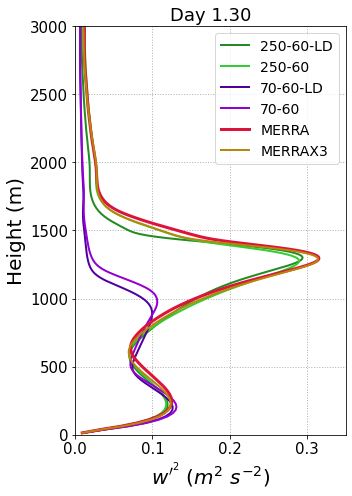

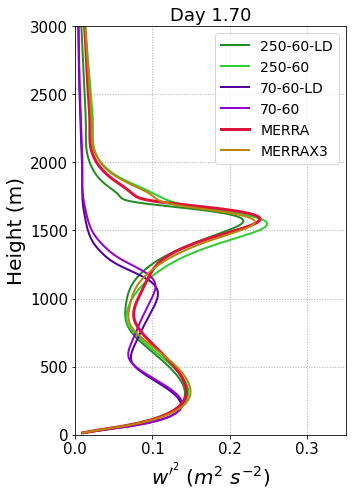

In [36]:
date_p = 1.3

####
fig, axis = plt.subplots(1, 1,figsize=(5,7))

for jj in cases:# range(NN):

    W2  = fn[jj].variables['W2'][:]       # Variance of the z wind component: m2/s2
    z    = fn[jj].variables['z'][:]
    TIME = fn[jj].variables['time'][:]
    time = TIME - int(TIME[0])

    indx_p = np.where( abs(time - date_p) == np.nanmin( abs(time - date_p) ) )[0][0]

    axis.plot( np.nanmean(W2[indx_p-5:indx_p+6,:], 0),  z, ls[jj], color=cc[jj], linewidth= lw[jj], label=lb[jj])
    
axis.set_ylabel('Height (m)', fontsize = '20')
axis.set_xlabel('$w^{{\prime}^2}$ ($m^2$ $s^{-2}$)', fontsize = '20')
axis.set_title('Day {:.2f}'.format(time[indx_p]), fontsize = '18')        
axis.set_ylim([0, 3000])
axis.set_xlim([0, .35])
axis.tick_params(axis='both', which='major', labelsize=15)
axis.grid(linestyle=':', linewidth=1)                 
#axis.text(0.1, 1.05, PANELS1[i + j * 2], transform=axis.transAxes, fontsize=18, fontweight='bold', va='top', fontfamily='serif', ha='right')


axis.legend(fontsize = '14')#, loc='upper left')
plt.tight_layout()  # w_pad=1

plt.show()


#######
date_p = 1.7

####
fig, axis = plt.subplots(1, 1,figsize=(5,7))

for jj in cases:# range(NN):

    W2  = fn[jj].variables['W2'][:]       # Variance of the z wind component: m2/s2
    z    = fn[jj].variables['z'][:]
    TIME = fn[jj].variables['time'][:]
    time = TIME - int(TIME[0])

    indx_p = np.where( abs(time - date_p) == np.nanmin( abs(time - date_p) ) )[0][0]

    axis.plot( np.nanmean(W2[indx_p-5:indx_p+6,:], 0),  z, ls[jj], color=cc[jj], linewidth= lw[jj], label=lb[jj])
    
axis.set_ylabel('Height (m)', fontsize = '20')
axis.set_xlabel('$w^{{\prime}^2}$ ($m^2$ $s^{-2}$)', fontsize = '20')
axis.set_title('Day {:.2f}'.format(time[indx_p]), fontsize = '18')        
axis.set_ylim([0, 3000])
axis.set_xlim([0, .35])
axis.tick_params(axis='both', which='major', labelsize=15)
axis.grid(linestyle=':', linewidth=1)                 
#axis.text(0.1, 1.05, PANELS1[i + j * 2], transform=axis.transAxes, fontsize=18, fontweight='bold', va='top', fontfamily='serif', ha='right')


axis.legend(fontsize = '14')#, loc='upper left')
plt.tight_layout()  # w_pad=1

plt.show()

#### Various methods of calculating Nc

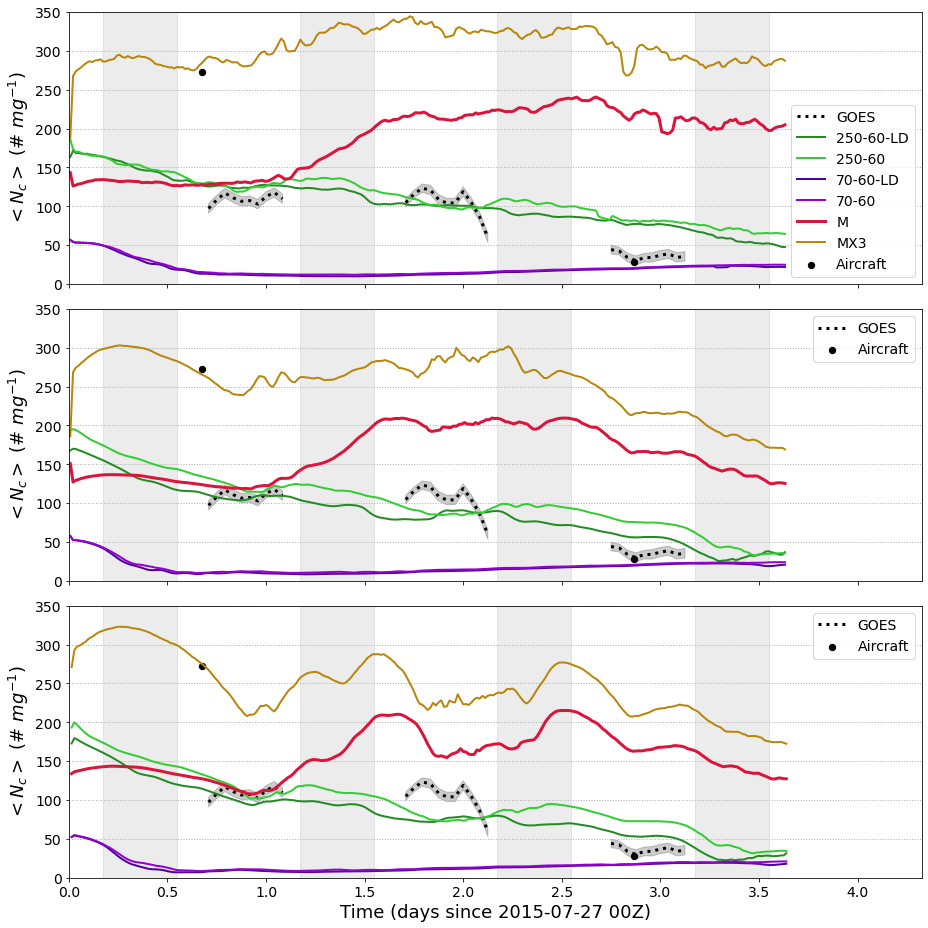

In [44]:
file2d  = Dataset('../../SAMUWgh-CSET-3D-ProgAer-RF10-Tr6p0/OUT_2D/CSET_RF10_Tr6p0_256sqx432_100m_RF10_M2005PA_RRTM4PBL_UM5_ProgAer_250_60_128.2Dbin_1.nc')
file2d0 = Dataset('../../SAMUWgh-CSET-3D-ProgAer-RF10-Tr6p0/OUT_2D/CSET_RF10_Tr6p0_96x96x432_100m_M2005_RRTM4PBL_UM5_RF10_Tr6p0_va_96.2Dbin_1.nc')
file2d1 = Dataset('../../SAMUWgh-CSET-3D-ProgAer-RF10-Tr6p0/OUT_2D/CSET_RF10_Tr6p0_256sqx432_100m_RF10_M2005PA_RRTM4PBL_UM5_ProgAer_70_60_128.2Dbin_1.nc')
file2d2 = Dataset('../../SAMUWgh-CSET-3D-ProgAer-RF10-Tr6p0/OUT_2D/CSET_RF10_Tr6p0_96sqx432_100m_RF10_M2005PA_RRTM4PBL_UM5_ProgAer_70_60_NEW_96.2Dbin_1.nc')
file2d3 = Dataset('../../SAMUWgh-CSET-3D-ProgAer-RF10-Tr6p0/OUT_2D/CSET_RF10_Tr6p0_96x96x432_100m_M2005_RRTM4PBL_UM5_RF10_Tr6p0_vc_BL_70_96.2Dbin_1.nc')
file2d4 = Dataset('../../SAMUWgh-CSET-3D-ProgAer-RF10-Tr6p0/OUT_2D/CSET_RF10_Tr6p0_96x96x432_100m_M2005_RRTM4PBL_UM5_RF10_Tr6p0_vb_FTNA_200_96.2Dbin_1.nc')
file2d5 = Dataset('../OUT_2D/CSET_RF10_Tr6p0_96sqx432_100m_RF10_Tr6p0_M2005PA_RRTM4PBL_UM5_ProgAer_MERRA2loglogMBL_96.2Dbin_1.nc')
file2d6 = Dataset('../OUT_2D/CSET_RF10_Tr6p0_96sqx432_100m_Tr6p0_M2005PA_RRTM4PBL_UM5_MERRAlogBL_3t_96.2Dbin_1.nc')

fn2d    = [file2d, file2d0, file2d1, file2d2, file2d3, file2d4, file2d5, file2d6]
cases2d = [0, 1, 2, 3, 6, 7]


time, z, dz, RHO, CWP, RWP, ISCCPTOT, ZINV, entr, LWNTOA, SWNS, P, TABS, inv_idx, W2_Zinv_200,\
            acc_prec, THETA, QT, integ_NA_BL, integ_NC_BL, COD, SAM_re, height_NARC, height_ENTRNMT, height_NASURF,\
            height_NPRA, height_NASED, height_NASCAV, sfc_wnd, albedo, NA, NC, PREC, RH, albd_clear, SOLIN2, SW_CRE, SWNTOAC, \
            LHF, SHF, CLD = read_model_vars(fn[0])

idx_end_MER = model_index(MERRA_time2, time[-1]) + 1
idx_end_GOS = model_index(GOES_time, time[-1]) + 1

if np.isnan(RFrt_N_mean) == 1:
    ii1 = model_index(GOES_time, RFrt_time2)
    RFrt_N_mean = GOES_Nd_med[ii1] + 5

idx_end_FOC = model_index(fday, time[-1])

lngh = 5.5
box = 5

goes_Nd_final_mean = np.nanmean(np.nanmean(goes_Nd_final,2),1)
goes_Nd_final_std  = np.nanstd(np.nanstd(goes_Nd_final,2),1)
goes_Nd_final_std[goes_Nd_final_std > 6.1] = 6.1

goes_re_all_mean = np.nanmean(np.nanmean(goes_re_all,2),1)
goes_re_all_std  = np.nanstd(np.nanstd(goes_re_all,2),1)

goes_cod_all_mean = np.nanmean(np.nanmean(goes_cod_all,2),1)
goes_cod_all_std  = np.nanstd(np.nanstd(goes_cod_all,2),1)
goes_cod_all_std[goes_cod_all_std > 3.3] = 3.3

#####
fig, axis = plt.subplots(3, 1,figsize=(13,13))

i = 0
axis[i].fill_between(time, -upbound, upbound, color='k', alpha=.075)
axis[i].fill_between(GOES_time[:idx_end_GOS], GOES_Nd[:idx_end_GOS] - goes_Nd_final_std[:idx_end_GOS]\
                     , GOES_Nd[:idx_end_GOS] + goes_Nd_final_std[:idx_end_GOS], color='k', alpha=0.2)
axis[i].scatter(RFin_time_mean, RFin_N_mean, marker='o', color='k', s=40, label='Aircraft')
axis[i].plot(GOES_time[:idx_end_GOS], GOES_Nd[:idx_end_GOS], ':',  color='k', linewidth= 3, label='GOES')
axis[i].scatter(RFrt_time_mean, RFrt_N_mean, marker='o', color='k', s=40)
axis[i].set_ylabel('$<N_c>$ ($mg^{-1}$)', fontsize = '18')
axis[i].set_ylim([0, 350])
axis[i].set_xlim([0, xlim + xlim/lngh])
axis[i].tick_params(axis='both', which='major', labelsize=14)
axis[i].grid(linestyle=':', axis='y', linewidth=1)
axis[i].axes.get_xaxis().set_ticklabels([])

####
i = 1
axis[i].fill_between(time, -upbound, upbound, color='k', alpha=.075)
axis[i].fill_between(GOES_time[:idx_end_GOS], GOES_Nd[:idx_end_GOS] - goes_Nd_final_std[:idx_end_GOS]\
                     , GOES_Nd[:idx_end_GOS] + goes_Nd_final_std[:idx_end_GOS], color='k', alpha=0.2)
axis[i].scatter(RFin_time_mean, RFin_N_mean, marker='o', color='k', s=40, label='Aircraft')
axis[i].plot(GOES_time[:idx_end_GOS], GOES_Nd[:idx_end_GOS], ':',  color='k', linewidth= 3, label='GOES')
axis[i].scatter(RFrt_time_mean, RFrt_N_mean, marker='o', color='k', s=40)
axis[i].set_ylabel('$<N_c>$ ($mg^{-1}$)', fontsize = '18')
axis[i].set_ylim([0, 350])
axis[i].set_xlim([0, xlim + xlim/lngh])
axis[i].tick_params(axis='both', which='major', labelsize=14)
axis[i].grid(linestyle=':', axis='y', linewidth=1)
axis[i].axes.get_xaxis().set_ticklabels([])
axis[i].legend(fontsize = '14')

####
i = 2
axis[i].fill_between(time, -upbound, upbound, color='k', alpha=.075)
axis[i].fill_between(GOES_time[:idx_end_GOS], GOES_Nd[:idx_end_GOS] - goes_Nd_final_std[:idx_end_GOS]\
                     , GOES_Nd[:idx_end_GOS] + goes_Nd_final_std[:idx_end_GOS], color='k', alpha=0.2)
axis[i].scatter(RFin_time_mean, RFin_N_mean, marker='o', color='k', s=40, label='Aircraft')
axis[i].plot(GOES_time[:idx_end_GOS], GOES_Nd[:idx_end_GOS], ':',  color='k', linewidth= 3, label='GOES')
axis[i].scatter(RFrt_time_mean, RFrt_N_mean, marker='o', color='k', s=40)
axis[i].set_ylabel('$<N_c>$ ($mg^{-1}$)', fontsize = '18')
axis[i].set_ylim([0, 350])
axis[i].set_xlim([0, xlim + xlim/lngh])
axis[i].tick_params(axis='both', which='major', labelsize=14)
axis[i].grid(linestyle=':', axis='y', linewidth=1)
axis[i].set_xlabel('Time (days since '+init_time+')', fontsize = '18')
axis[i].legend(fontsize = '14')


###########
for jj in cases:# range(NN):
    time, z, dz, RHO, CWP, RWP, ISCCPTOT, ZINV, entr, LWNTOA, SWNS, P, TABS, inv_idx, W2_Zinv_200,\
            acc_prec, THETA, QT, integ_NA_BL, integ_NC_BL, COD, SAM_re, height_NARC, height_ENTRNMT, height_NASURF,\
            height_NPRA, height_NASED, height_NASCAV, sfc_wnd, albedo, NA, NC, PREC, RH, albd_clear, SOLIN2, SW_CRE, SWNTOAC, \
            LHF, SHF, CLD = read_model_vars(fn[jj])
    
    
    integ_NC_BL_CLD = mbl_ave_N(NC, CLD, dz, inv_idx)


    i = 0
    axis[i].plot(time[:-2], np.concatenate( [integ_NC_BL[:3], smooth(integ_NC_BL, box)[3:]] )[:-2], ls[jj], linewidth= lw[jj], color=cc[jj], label=lb[jj])
    leg1 = axis[i].legend(fontsize = '14', loc='lower right')

    i = 1
    axis[i].plot(time[:-2], np.concatenate( [integ_NC_BL_CLD[:3], smooth(integ_NC_BL_CLD, box)[3:]] )[:-2], ls[jj], linewidth= lw[jj], color=cc[jj], label=lb[jj])

    
i = 2    
for jj in cases2d:

    T3D      = fn2d[jj].variables['time'][:]       # time: day
    QCPATH   = fn2d[jj].variables['QCPATH'][:] # * 1000    # Column cloud liquid mass (vertically integrated), before conversion to unit: g/m2
    NCQCPATH = fn2d[jj].variables['NCQCPATH'][:]  # Column integral of QC*NC (useful for computing mass-weighted NC): kg/kg/m2
    CDNC     = 1e-6 * NCQCPATH / QCPATH     # #/mg
    t3d   = T3D - int(T3D[0])
    
    CDNC_m = CDNC[:,0,0].copy()
    CDNC_m[:] = np.nan
    for ii in range(len(CDNC_m)):
        CDNC_m[ii] = np.nanmean(CDNC[ii,:,:])
    
    axis[i].plot(t3d[:-2], np.concatenate( [CDNC_m[:3], smooth(CDNC_m, box)[3:]] )[:-2], ls[jj], linewidth= lw[jj], color=cc[jj], label=lb[jj])


plt.tight_layout(w_pad=1)
plt.show()

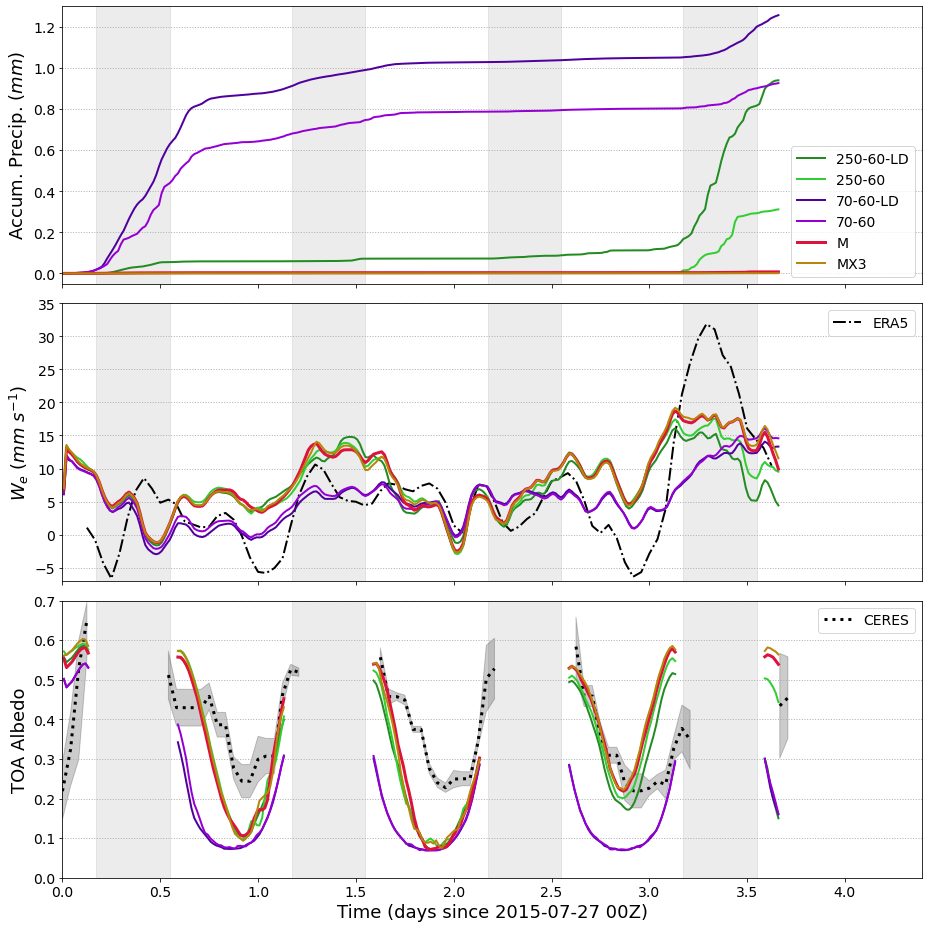

In [15]:
upbound = time.copy()
upbound[:] = ylim
upbound[SWNS > 0] = np.nan

lngh = 5
box = 10

CERES_toa_alb[CERES_toa_alb > 0.65] = 0.65
CERES_alb_up = CERES_toa_alb + CERES_toa_alb_std
CERES_alb_up[CERES_alb_up > 0.69] = 0.695
CERES_alb_up[2] = 0.6

fig, axis = plt.subplots(3, 1,figsize=(13,13))

i = 0
axis[i].fill_between(time, -upbound, upbound, color='k', alpha=.075)
#axis[i].errorbar(MERRA_time2[:idx_end_MER], AMSR_prec[:idx_end_MER], yerr=AMSR_prcp_std[:idx_end_MER], color='tab:blue', fmt='o', label='AMSR')
#axis[i].scatter(MERRA_time2[:idx_end_MER], AMSR_prec[:idx_end_MER], color='tab:blue', marker='o', label='AMSR')
axis[i].set_ylabel('Accum. Precip. ($mm$)', fontsize = '18')
axis[i].set_xlim([0, xlim + xlim / lngh])
axis[i].set_ylim([-0.05, 1.3])
axis[i].tick_params(axis='both', which='major', labelsize=14)
axis[i].grid(linestyle=':', axis='y', linewidth=1)
axis[i].axes.get_xaxis().set_ticklabels([])

i = 1
axis[i].fill_between(time, -upbound, upbound, color='k', alpha=.075)
axis[i].set_ylabel('$W_e$ ($mm$ $s^{-1}$)', fontsize = '18')
axis[i].set_xlim([0, xlim + xlim / lngh])
axis[i].set_ylim([-7, 35])
axis[i].axes.get_xaxis().set_ticklabels([])
axis[i].tick_params(axis='both', which='major', labelsize=14)
axis[i].grid(linestyle=':', axis='y', linewidth=1)
axis[i].plot(MERRA_time2[:idx_end_MER], ERA_entr[:idx_end_MER], '-.', linewidth= 2, color=ERA_c, label='ERA5')
axis[i].legend(fontsize = '14')

# i = 2
# axis[i].fill_between(time, -upbound, upbound, color='k', alpha=.075)
# axis[i].set_ylabel('$W^{{\prime}^2}(z=Z_{inv}-200m)$', fontsize = '18')
# axis[i].set_xlim([0, xlim + xlim / lngh])
# axis[i].set_ylim([0, .72])
# axis[i].axes.get_xaxis().set_ticklabels([])
# axis[i].tick_params(axis='both', which='major', labelsize=14)
# axis[i].grid(linestyle=':', axis='y', linewidth=1)

i = 2
axis[i].fill_between(time, -upbound, upbound, color='k', alpha=.075)
#axis[i].fill_between(GOES_time2[:idx_end_GOS], goes_albd_25[:idx_end_GOS], goes_albd_75[:idx_end_GOS], color='b', alpha=0.2)
#axis[i].plot(GOES_time2[:idx_end_GOS], np.nanmean(np.nanmean(goes_albd[:idx_end_GOS],2),1), ':', linewidth= 3, color='b', label='GOES')
axis[i].fill_between(MERRA_time2[:idx_end_MER+1], CERES_toa_alb[:idx_end_MER+1] - CERES_toa_alb_std[:idx_end_MER+1]\
                     , CERES_alb_up[:idx_end_MER+1], color='k', alpha=0.2)
axis[i].plot(MERRA_time2[:idx_end_MER+1], CERES_toa_alb[:idx_end_MER+1], ':', linewidth= 3, color='k', label='CERES')
#axis[i].plot(MERRA_time2[:idx_end_MER], CERES_albd2[:idx_end_MER], linewidth= 1, color='r', label='CERES calc')
axis[i].set_ylabel('TOA Albedo', fontsize = '18')
axis[i].set_xlabel('Time (days since '+init_time+')', fontsize = '18')
axis[i].set_xlim([0, xlim + xlim / lngh])
axis[i].set_ylim([0, .7])
axis[i].tick_params(axis='both', which='major', labelsize=14)
axis[i].grid(linestyle=':', axis='y', linewidth=1)
axis[i].legend(fontsize = '14')

###
for jj in cases:# range(NN):
    time, z, dz, RHO, CWP, RWP, ISCCPTOT, ZINV, entr, LWNTOA, SWNS, P, TABS, inv_idx, W2_Zinv_200,\
            acc_prec, THETA, QT, integ_NA_BL, integ_NC_BL, COD, SAM_re, height_NARC, height_ENTRNMT, height_NASURF,\
            height_NPRA, height_NASED, height_NASCAV, sfc_wnd, albedo, NA, NC, PREC, RH, albd_clear, SOLIN2, SW_CRE, SWNTOAC, \
            LHF, SHF, CLD = read_model_vars(fn[jj])
    i = 0
    axis[i].plot(time, acc_prec, ls[jj], linewidth= lw[jj], color=cc[jj], label=lb[jj])
    axis[i].legend(fontsize = '14', loc='lower right')
    i = 1
    axis[i].plot(time, entr, ls[jj], linewidth= lw[jj], color=cc[jj], label=lb[jj])
#     i = 2
#     if jj == 2:
#         for ii in range(len(W2_Zinv_200)):
#             if W2_Zinv_200[ii] > 0.69:
#                 W2_Zinv_200[ii] = W2_Zinv_200[ii-1]
# #    axis[i].plot(time, smooth(W2_Zinv_200, box), ls[jj], linewidth= 2, color=cc[jj], label=lb[jj]) # CLDLOW will not be used.
#     axis[i].plot(time, np.concatenate([smooth(W2_Zinv_200, 3)[:5], smooth(W2_Zinv_200, box)[5:-3], smooth(W2_Zinv_200, 2)[-3:]]), ls[jj], linewidth= lw[jj], color=cc[jj], label=lb[jj])
    i = 2
    axis[i].plot(time, albedo, ls[jj], linewidth= lw[jj], color=cc[jj], label=lb[jj]) # CLDLOW will not be used.


plt.tight_layout(w_pad=1)
plt.show()

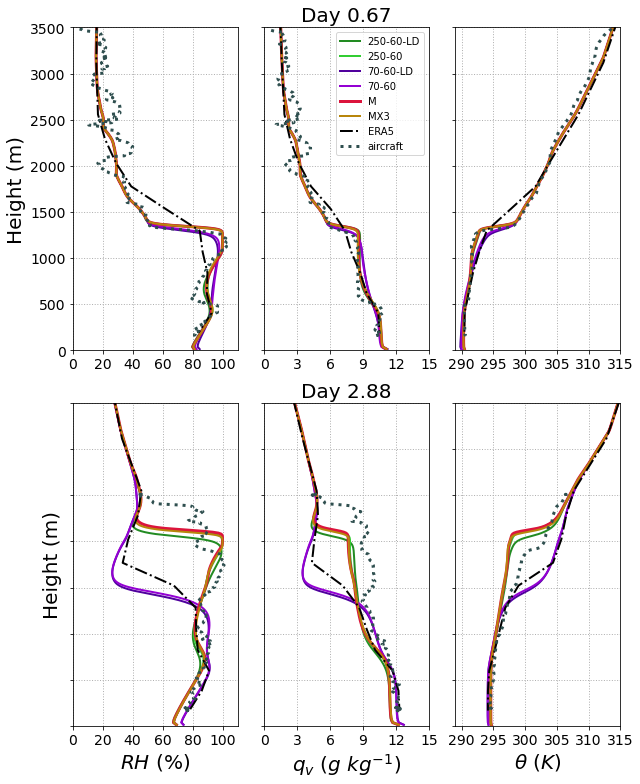

In [18]:
xx1 = 0
xx2 = 320
lngh = 6
lw2 = ['3', '3', '3', '4.5', '3']

upbound2D = [ylim] * 2
dnbound2D = [-ylim] * 2

tt = [model_index(time, RFin_time2), model_index(time, RFrt_time2)]

fig, axis = plt.subplots(2, 3,figsize=(9,11))

for i in range(2):
    for j in range(3):
        
        for jj in cases:# range(NN):
            time, z, dz, RHO, CWP, RWP, ISCCPTOT, ZINV, entr, LWNTOA, SWNS, P, TABS, inv_idx, W2_Zinv_200,\
            acc_prec, THETA, QT, integ_NA_BL, integ_NC_BL, COD, SAM_re, height_NARC, height_ENTRNMT, height_NASURF,\
            height_NPRA, height_NASED, height_NASCAV, sfc_wnd, albedo, NA, NC, PREC, RH, albd_clear, SOLIN2, SW_CRE, SWNTOAC, \
            LHF, SHF, CLD = read_model_vars(fn[jj])

            if j == 0:
                cc5 = axis[i,j].plot(RH[tt[i],:], z, ls[jj], c=cc[jj], label=lb[jj], linewidth= lw[jj])
            elif j == 1:
                cc6 = axis[i,j].plot(QT[tt[i],:], z, ls[jj], c=cc[jj], label=lb[jj], linewidth= lw[jj])         
            else:
                cc7 = axis[i,j].plot(THETA[tt[i],:], z, ls[jj], c=cc[jj], label=lb[jj], linewidth= lw[jj])

        #####
        i_ERA = np.where( abs(time[tt[i]] - MERRA_time2) == np.nanmin(abs(time[tt[i]] - MERRA_time2)) )[0][0]

        if (SWNS[tt[i]] < 20):
            cc000= axis[i,j].fill_between([xx1, xx2], dnbound2D, upbound2D, color='k', alpha=.075)
        else:
            cc000= axis[i,j].fill_between([xx1, xx2], dnbound2D, upbound2D, color='w', alpha=.075)
            
        if j == 0:
            if i == 1:            
                axis[i,j].set_xlabel('$RH$ (%)', fontsize = '20')
            axis[i,j].set_xlim([0, 110])
            axis[i,j].set_xticks(range(0,120,20)) 
            
            cc50 = axis[i,j].plot(ERA_r[i_ERA,:], ERA_z[i_ERA,:], '-.', c='k', label='ERA5', linewidth= 2)
            if i == 0:
                axis[i,j].plot(RFin_RH, RFin_alt, ':', c= 'darkslategray', label='aircraft', linewidth= 3)
            else:
                axis[i,j].plot(RFrt_RH, RFrt_alt, ':', c= 'darkslategray', label='aircraft', linewidth= 3)        
            
        elif j == 1:
            if i == 1:            
                axis[i,j].set_xlabel('$q_v$ ($g$ $kg^{-1}$)', fontsize = '20')#, horizontalalignment='right', x=.3)
            axis[i,j].set_xlim([0, 13])
            axis[i,j].set_xticks(range(0,18,3))
            
            cc60= axis[i,j].plot(ERA_qt[i_ERA,:], ERA_z[i_ERA,:], '-.', c='k', label='ERA5', linewidth= 2) 
            if i == 0:
                axis[i,j].plot(RFin_MR, RFin_alt, ':', c= 'darkslategray', label='aircraft', linewidth= 3)
            else:
                axis[i,j].plot(RFrt_MR, RFrt_alt, ':', c= 'darkslategray', label='aircraft', linewidth= 3)        
           
        else:
            if i == 1:                        
                axis[i,j].set_xlabel('$θ$ ($K$)', fontsize = '20')
            axis[i,j].set_xlim([289, 315])
            axis[i,j].set_xticks(range(290,320,5))
            
            cc70 = axis[i,j].plot(ERA_THETA[i_ERA,:], ERA_z[i_ERA,:], '-.', c='k', label='ERA5', linewidth= 2)
            if i == 0:
                axis[i,j].plot(RFin_TH, RFin_alt, ':', c= 'darkslategray', label='aircraft', linewidth= 3)
            else:
                axis[i,j].plot(RFrt_TH, RFrt_alt, ':', c= 'darkslategray', label='aircraft', linewidth= 3)        
            
        if i == 0 and j == 0:
            pass
        else:
            axis[i,j].axes.get_yaxis().set_ticklabels([])
        
        axis[i,j].set_ylim([0, 3500])
        axis[i,j].tick_params(axis='both', which='major', labelsize=14)
        axis[i,j].grid(linestyle=':', linewidth=1)                 
            

axis[0,1].set_title('Day {:.2f}'.format(time[tt[0]]), fontsize = 20)
axis[1,1].set_title('Day {:.2f}'.format(time[tt[1]]), fontsize = 20)
axis[0,0].set_ylabel('Height (m)', fontsize = '20')
axis[1,0].set_ylabel('Height (m)', fontsize = '20')
axis[0,1].legend(fontsize = '10', loc='upper right')
plt.tight_layout(w_pad=1)

plt.show()

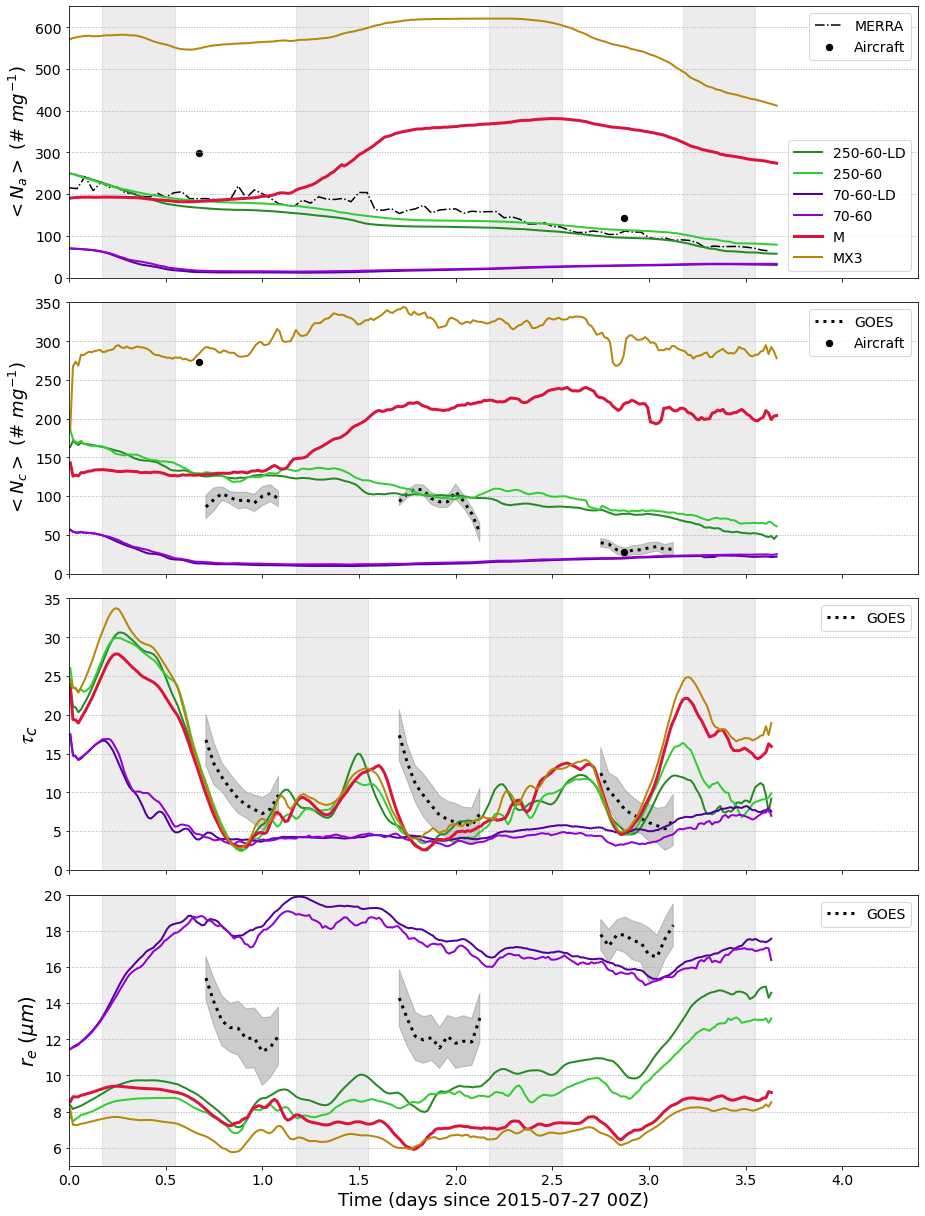

In [20]:
if np.isnan(RFrt_N_mean) == 1:
    ii1 = model_index(GOES_time, RFrt_time2)
    RFrt_N_mean = GOES_Nd_med[ii1] + 5

idx_end_FOC = model_index(fday, time[-1])

lngh = 5
box  = 5

goes_Nd_final_mean = np.nanmean(np.nanmean(goes_Nd_final,2),1)
goes_Nd_final_std  = np.nanstd(np.nanstd(goes_Nd_final,2),1)
goes_Nd_final_std[goes_Nd_final_std > 15] = 15

goes_re_all_mean = np.nanmean(np.nanmean(goes_re_all,2),1)
goes_re_all_std  = np.nanstd(np.nanstd(goes_re_all,2),1)

goes_cod_all_mean = np.nanmean(np.nanmean(goes_cod_all,2),1)
goes_cod_all_std  = np.nanstd(np.nanstd(goes_cod_all,2),1)
goes_cod_all_std[goes_cod_all_std > 3.3] = 3.3

#####
fig, axis = plt.subplots(4, 1,figsize=(13,17))

i = 0
axis[i].fill_between(time, -upbound, upbound, color='k', alpha=.075)
obs1, = axis[i].plot(fday[:idx_end_FOC], Na_accm_MERRA_mean[:idx_end_FOC] * 1e-6, '-.', color='k')#, label='MERRA')
obs2 = axis[i].scatter(RFin_time_mean, RFin_Np1_mean, marker='o',  color='k', s=40)#, label='Aircraft')
axis[i].scatter(RFrt_time_mean, RFrt_Np1_mean, marker='o', color='k', s=40)
#axis[i].plot(MERRA_time2, CERES_Nd * 1.5, '-.', color='r', label='CERES_Nd * 1.5')
axis[i].set_ylabel('$<N_a>$ (# $mg^{-1}$)', fontsize = '18')
axis[i].set_ylim([0, 650])
axis[i].set_xlim([0, xlim + xlim/lngh])
axis[i].tick_params(axis='both', which='major', labelsize=14)
axis[i].grid(linestyle=':', axis='y', linewidth=1)
axis[i].axes.get_xaxis().set_ticklabels([])

####
i = 1
axis[i].fill_between(time, -upbound, upbound, color='k', alpha=.075)
#axis[i].fill_between(GOES_time[:idx_end_GOS], goes_Nd_25[:idx_end_GOS], goes_Nd_75[:idx_end_GOS], color='k', alpha=0.2)
axis[i].fill_between(GOES_time[:idx_end_GOS], GOES_Nd[:idx_end_GOS] - goes_Nd_final_std[:idx_end_GOS]\
                     , GOES_Nd[:idx_end_GOS] + goes_Nd_final_std[:idx_end_GOS], color='k', alpha=0.2)
axis[i].scatter(RFin_time_mean, RFin_N_mean, marker='o', color='k', s=40, label='Aircraft')
axis[i].scatter(RFrt_time_mean, RFrt_N_mean, marker='o', color='k', s=40)
#axis[i].plot(GOES_time[:idx_end_GOS], goes_Nd_final_mean[:idx_end_GOS], ':',  color='k', linewidth= 3, label='GOES')
axis[i].plot(GOES_time[:idx_end_GOS], GOES_Nd[:idx_end_GOS], ':',  color='k', linewidth= 3, label='GOES')
#axis[i].plot(GOES_time[:idx_end_GOS], GOES_Nd_med[:idx_end_GOS],  color='r', linewidth= 0.5, label='GOES med')
axis[i].set_ylabel('$<N_c>$ (# $mg^{-1}$)', fontsize = '18')
#axis[i].set_title(' MBL Column-averaged Cloud Number Concentration', fontsize = '18')
axis[i].set_ylim([0, 350])
axis[i].set_xlim([0, xlim + xlim/lngh])
axis[i].tick_params(axis='both', which='major', labelsize=14)
axis[i].grid(linestyle=':', axis='y', linewidth=1)
axis[i].axes.get_xaxis().set_ticklabels([])
axis[i].legend(fontsize = '14')

####
i = 2
axis[i].fill_between(time, -upbound, upbound, color='k', alpha=.075)
#axis[i].fill_between(GOES_time[:idx_end_GOS], goes_cod_25[:idx_end_GOS], goes_cod_75[:idx_end_GOS], color='k', alpha=0.2)
axis[i].fill_between(GOES_time[:idx_end_GOS], goes_cod_mean[:idx_end_GOS] - goes_cod_all_std[:idx_end_GOS]\
                 , goes_cod_mean[:idx_end_GOS] + goes_cod_all_std[:idx_end_GOS], color='k', alpha=0.2)
axis[i].plot(GOES_time[:idx_end_GOS], goes_cod_mean[:idx_end_GOS], ':', c='k', linewidth= 3, label='GOES')
#axis[i].plot(GOES_time[:idx_end_GOS], goes_cod_all_mean[:idx_end_GOS], ':', c='r', linewidth= 1, label='GOES mean')
#axis[i].plot(GOES_time[:idx_end_GOS], goes_cod[:idx_end_GOS], ':', c='b', linewidth= 1, label='GOES med')
axis[i].set_ylabel('$𝜏_c$', fontsize = '22')
axis[i].set_ylim([0, 35])
axis[i].set_xlim([0, xlim + xlim/lngh])
axis[i].tick_params(axis='both', which='major', labelsize=14)
axis[i].grid(linestyle=':', axis='y', linewidth=1)
axis[i].axes.get_xaxis().set_ticklabels([])
axis[i].legend(fontsize = '14')

######
i = 3
axis[i].fill_between(time, -upbound, upbound, color='k', alpha=.075)
#axis[i].fill_between(GOES_time[:idx_end_GOS], goes_re_25[:idx_end_GOS], goes_re_75[:idx_end_GOS], color='k', alpha=0.2)
#axis[i].plot(GOES_time[:idx_end_GOS], goes_re_all[:idx_end_GOS], ':', c='k', linewidth= 3, label='GOES')
axis[i].fill_between(GOES_time[:idx_end_GOS], goes_re_mean[:idx_end_GOS] - goes_re_all_std[:idx_end_GOS]\
                     , goes_re_mean[:idx_end_GOS] + goes_re_all_std[:idx_end_GOS], color='k', alpha=0.2)
axis[i].plot(GOES_time[:idx_end_GOS], goes_re_mean[:idx_end_GOS], ':', c='k', linewidth= 3, label='GOES')
#axis[i].plot(GOES_time[:idx_end_GOS], goes_re_all_mean[:idx_end_GOS], c='r', linewidth= 1, label='GOES mean')
#axis[i].plot(GOES_time[:idx_end_GOS], goes_re[:idx_end_GOS], c='b', linewidth= 1, label='GOES med')
axis[i].set_ylabel('$r_e$ ($μm$)', fontsize = '20')
axis[i].set_xlabel('Time (days since '+init_time+')', fontsize = '18')
axis[i].set_ylim([5, 20])
axis[i].tick_params(axis='both', which='major', labelsize=14)
axis[i].tick_params(axis='both', which='major', labelsize=14)
axis[i].set_xlim([0, xlim + xlim/lngh])
axis[i].grid(linestyle=':', axis='y', linewidth=1)
axis[i].legend(fontsize = '14')

###########
for jj in cases:# range(NN):
    time, z, dz, RHO, CWP, RWP, ISCCPTOT, ZINV, entr, LWNTOA, SWNS, P, TABS, inv_idx, W2_Zinv_200,\
            acc_prec, THETA, QT, integ_NA_BL, integ_NC_BL, COD, SAM_re, height_NARC, height_ENTRNMT, height_NASURF,\
            height_NPRA, height_NASED, height_NASCAV, sfc_wnd, albedo, NA, NC, PREC, RH, albd_clear, SOLIN2, SW_CRE, SWNTOAC, \
            LHF, SHF, CLD = read_model_vars(fn[jj])

    #if jj == 0:
    #    NA[NA > 75] = 75
    #    NC[NC > 80] = 80
    #    integ_NA_BL  = mbl_ave_N(NA,  RHO, dz, inv_idx) 
    #    integ_NC_BL  = mbl_ave_N(NC,  RHO, dz, inv_idx) 
    i = 0
    axis[i].plot(time, integ_NA_BL, ls[jj], linewidth= lw[jj], color=cc[jj], label=lb[jj])
    leg1 = axis[i].legend(fontsize = '14', loc='lower right')

    i = 1
    #if jj == 2:
     #   for ii in range(50, len(integ_NC_BL)):
      #      if integ_NC_BL[ii] - integ_NC_BL[ii-1] > 10:
       #         integ_NC_BL[ii] = integ_NC_BL[ii-1]
        #    if integ_NC_BL[ii] - integ_NC_BL[ii-1] < -30:
         #       integ_NC_BL[ii] = integ_NC_BL[ii-1]

    axis[i].plot(time, np.concatenate( [integ_NC_BL[:box], smooth(integ_NC_BL, box)[box:-box], integ_NC_BL[-box:]] ), ls[jj], linewidth= lw[jj], color=cc[jj], label=lb[jj])

    i = 2
    COD_fin = COD / ISCCPTOT
    axis[i].plot(time[:-2], np.concatenate( [COD_fin[:box], smooth(COD_fin, box)[box:-box], COD_fin[-box:]] )[:-2], ls[jj], linewidth= lw[jj], color=cc[jj], label=lb[jj])

    i = 3
    axis[i].plot(time[:-2], np.concatenate( [SAM_re[:box], smooth(SAM_re, box)[box:-box], SAM_re[-box:]] )[:-2], ls[jj], linewidth= lw[jj], color=cc[jj], label=lb[jj])

leg2 = axis[0].legend([obs1, obs2],['MERRA', 'Aircraft'], fontsize = '14', loc='upper right')
axis[0].add_artist(leg1) # Manually add the first legend back
plt.tight_layout(w_pad=1)
plt.show()

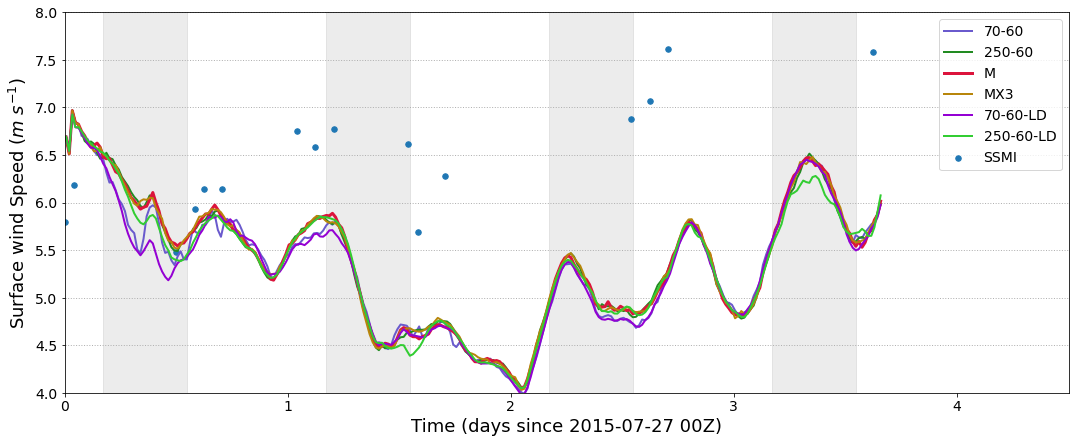

In [20]:
zero = time.copy()
zero[:] = 0
box = 1
#####
fig, axis = plt.subplots(1, 1, figsize=(18,7))
axis.fill_between(time, -upbound, upbound, color='k', alpha=.075)
axis.scatter(MERRA_time2, SSMI_WSPD, marker='o', s= 30, label='SSMI')
axis.set_xlabel('Time (days since '+init_time+')', fontsize = '18')
axis.set_ylabel('Surface wind Speed ($m$ $s^{-1}$)', fontsize = '18')
axis.set_ylim([4, 8])
axis.set_xlim([0, xlim + 3 * xlim / 13])
axis.legend(fontsize = '14')
axis.tick_params(axis='both', which='major', labelsize=14)
#axis.axes.get_xaxis().set_ticklabels([])
axis.grid(linestyle=':', axis='y', linewidth=1)

for jj in cases:# range(NN):
    time, z, dz, RHO, CWP, RWP, ISCCPTOT, ZINV, entr, LWNTOA, SWNS, P, TABS, inv_idx, W2_Zinv_200,\
            acc_prec, THETA, QT, integ_NA_BL, integ_NC_BL, COD, SAM_re, height_NARC, height_ENTRNMT, height_NASURF,\
            height_NPRA, height_NASED, height_NASCAV, sfc_wnd, albedo, NA, NC, PREC, RH, albd_clear, SOLIN2, SW_CRE, SWNTOAC, \
            LHF, SHF, CLD = read_model_vars(fn[jj])
    axis.plot(time, sfc_wnd, ls[jj], linewidth= lw[jj], color=cc[jj], label=lb[jj])
    axis.legend(fontsize = '14')

plt.show()

No handles with labels found to put in legend.


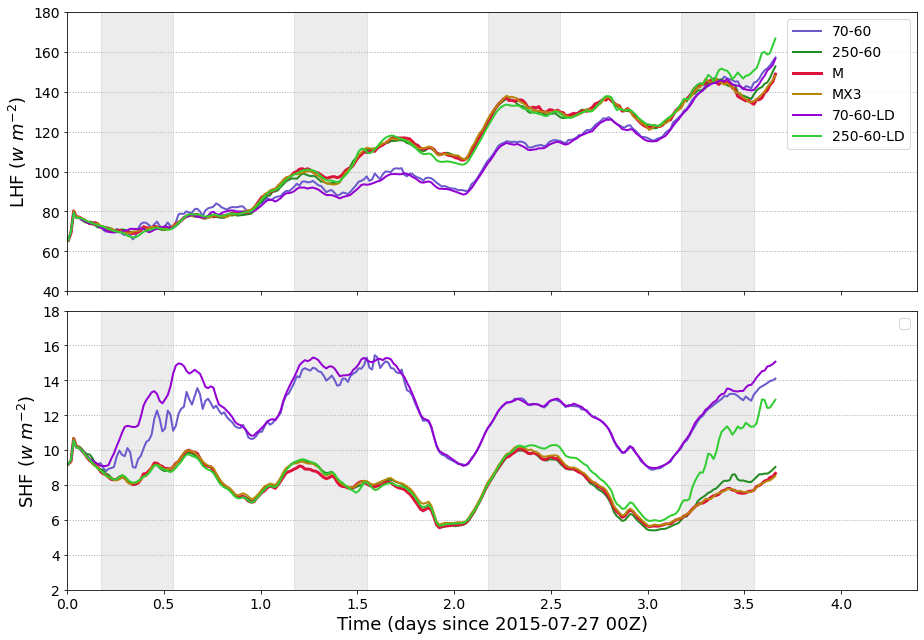

In [11]:
idx_end_MER = model_index(MERRA_time2, time[-1]) + 1
idx_end_GOS = model_index(GOES_time, time[-1]) + 1

lngh = 5
box = 10
ERA_c = 'orange'

####
fig, axis = plt.subplots(2, 1,figsize=(13,9))

i = 0
axis[i].fill_between(time, -upbound, upbound, color='k', alpha=.075)
#axis[i].errorbar(MERRA_time2[:idx_end_MER], AMSR_prec[:idx_end_MER], yerr=AMSR_prcp_std[:idx_end_MER], color='tab:blue', fmt='o', label='AMSR')
#axis[i].scatter(MERRA_time2[:idx_end_MER], AMSR_prec[:idx_end_MER], color='tab:blue', marker='o', label='AMSR')
axis[i].set_ylabel('LHF ($w$ $m^{-2}$)', fontsize = '18')
axis[i].set_xlim([0, xlim + xlim / lngh])
axis[i].set_ylim([40, 180])
axis[i].tick_params(axis='both', which='major', labelsize=14)
axis[i].grid(linestyle=':', axis='y', linewidth=1)
#axis[i].plot(MERRA_time2[1:], lhflx[:,0,0], '-.', linewidth= 2, color=ERA_c, label='ERA5')
axis[i].axes.get_xaxis().set_ticklabels([])

i = 1
axis[i].fill_between(time, -upbound, upbound, color='k', alpha=.075)
axis[i].set_ylabel('SHF ($w$ $m^{-2}$)', fontsize = '18')
axis[i].set_xlabel('Time (days since '+init_time+')', fontsize = '18')
axis[i].set_xlim([0, xlim + xlim / lngh])
axis[i].set_ylim([2, 18])
axis[i].tick_params(axis='both', which='major', labelsize=14)
axis[i].grid(linestyle=':', axis='y', linewidth=1)
#axis[i].plot(MERRA_time2[1:], shflx[:,0,0], '-.', linewidth= 2, color=ERA_c, label='ERA5')
axis[i].legend(fontsize = '14', loc='upper right')


###
for jj in cases:# range(NN):
    time, z, dz, RHO, CWP, RWP, ISCCPTOT, ZINV, entr, LWNTOA, SWNS, P, TABS, inv_idx, W2_Zinv_200,\
            acc_prec, THETA, QT, integ_NA_BL, integ_NC_BL, COD, SAM_re, height_NARC, height_ENTRNMT, height_NASURF,\
            height_NPRA, height_NASED, height_NASCAV, sfc_wnd, albedo, NA, NC, PREC, RH, albd_clear, SOLIN2, SW_CRE, SWNTOAC, \
            LHF, SHF, CLD = read_model_vars(fn[jj])
    
    i = 0
    axis[i].plot(time, LHF, ls[jj], linewidth= lw[jj], color=cc[jj], label=lb[jj])
    axis[i].legend(fontsize = '14', loc='upper right')
    i = 1
    axis[i].plot(time, SHF, ls[jj], linewidth= lw[jj], color=cc[jj], label=lb[jj])


plt.tight_layout(w_pad=1)
plt.show()



########
lngh = 5
box = 10

fig, axis = plt.subplots(1, 1,figsize=(15,5))

plt.fill_between(time, -upbound, upbound, color='k', alpha=.075)
plt.fill_between(MERRA_time2[:idx_end_MER], CERES_sw_cre[:idx_end_MER] - CERES_sw_cre_std[:idx_end_MER], CERES_sw_cre[:idx_end_MER] + CERES_sw_cre_std[:idx_end_MER], color='k', alpha=0.2)
plt.plot(MERRA_time2[:idx_end_MER], CERES_sw_cre[:idx_end_MER], ':', linewidth= 3, color='darkslategray', label='CERES')
plt.ylabel('SW CRE ($W m^{-2}$)', fontsize = '18')
plt.xlabel('Time (days since '+init_time+')', fontsize = '18')
plt.xlim([0, xlim + xlim / lngh])
plt.ylim([-420, 20])
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid(linestyle=':', axis='y', linewidth=1)


###
for jj in cases:# range(NN):
    time, z, dz, RHO, CWP, RWP, ISCCPTOT, ZINV, entr, LWNTOA, SWNS, P, TABS, inv_idx, W2_Zinv_200,\
            acc_prec, THETA, QT, integ_NA_BL, integ_NC_BL, COD, SAM_re, height_NARC, height_ENTRNMT, height_NASURF,\
            height_NPRA, height_NASED, height_NASCAV, sfc_wnd, albedo, NA, NC, PREC, RH, albd_clear, SOLIN2, SW_CRE, SWNTOAC, \
            LHF, SHF, CLD = read_model_vars(fn[jj])
    
    plt.plot(time, SW_CRE, ls[jj], linewidth= lw[jj], color=cc[jj], label=lb[jj])
    plt.legend(fontsize = '13', loc='upper right')

plt.show()